<a href="https://colab.research.google.com/github/alibekk93/soccer_players_clusters/blob/main/DataCollection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/alibekk93/soccer_players_clusters
!cd soccer_players_clusters

Cloning into 'soccer_players_clusters'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 19 (delta 3), reused 7 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (19/19), 104.20 KiB | 1.53 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [2]:
# install soccerdata
!pip install soccerdata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.3/486.3 kB 20.3 MB/s eta 0:00:00
  Created wheel for undetected-chromedriver: filename=undetected_chromedriver-3.5.5-py3-none-any.whl size=47048 sha256=4bdb3b2a04c2b7d39029f09c6c963176aa97757deda7833dbcade8cd10e81338
  Stored in directory: /root/.cache/pip/wheels/5c/b9/03/4b6e38f019d6170e8c25df2e1e362d7bdf9ff4012df2dc85c0
Successfully built undetected-chromedriver
  Attempting uninstall: lxml
    Found existing installation: lxml 5.3.0


In [ ]:
%cd /content/soccer_players_clusters

In [3]:
from soccerdata import FBref
fbref = FBref(leagues='ENG-Premier League',
              seasons=[23])

[01/30/25 21:43:40] INFO     No custom team name replacements found. You can configure these in       ]8;id=797230;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=62023;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py#91\91]8;;\
                             /root/soccerdata/config/teamname_replacements.json.                                   

                    INFO     No custom league dict found. You can configure additional leagues in    ]8;id=120183;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=431292;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py#197\197]8;;\
                             /root/soccerdata/config/league_dict.json.                                             

                    INFO     Saving cached data to /root/soccerdata/data/FBref                       ]8;id=789451;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=118354;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py#263\263]8;;\

In [4]:
# ManCity23 = fbref.read_team_match_stats(team='Manchester City')

[01/30/25 21:43:46] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=928976;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=806946;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

In [6]:
!mkdir ManCity23_players

In [5]:
stat_types = ["summary", "passing", "passing_types", "defense", "possession", "misc"]

In [8]:
from tqdm import tqdm

In [11]:
ManCity23_players_dfs = {}

for stat_type in tqdm(stat_types):
  df = fbref.read_player_match_stats(stat_type=stat_type)
  df_own = df.reset_index()[df.reset_index()['team']=='Manchester City']
  df_opp = df.reset_index()[df.reset_index()['team']!='Manchester City']
  df_own.to_csv(f'ManCity23_players/ManCity23_players_{stat_type}_own.csv')
  df_opp.to_csv(f'ManCity23_players/ManCity23_players_{stat_type}_opp.csv')
  ManCity23_players_dfs[stat_type] = (df_own, df_opp)

  0%|          | 0/6 [00:00<?, ?it/s]

[01/30/25 21:56:50] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=947695;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=399499;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

[01/30/25 21:56:51] INFO     [1/380] Retrieving game with id=3a6836b4                                  ]8;id=639631;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=171394;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [2/380] Retrieving game with id=26a7f90c                                  ]8;id=871973;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=561238;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [3/380] Retrieving game with id=d6bbf293                                  ]8;id=881243;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=429133;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [4/380] Retrieving game with id=56a137f7                                  ]8;id=511303;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=744539;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [5/380] Retrieving game with id=15addfc7                                  ]8;id=855425;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=635458;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [6/380] Retrieving game with id=8ff2f8fe                                  ]8;id=895289;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=260596;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [7/380] Retrieving game with id=55fd92c7                                  ]8;id=701225;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=222134;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:56:52] INFO     [8/380] Retrieving game with id=67ed3ba2                                  ]8;id=631909;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=494300;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [9/380] Retrieving game with id=c18d3207                                  ]8;id=451643;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=843787;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [10/380] Retrieving game with id=f1ecda2c                                 ]8;id=530888;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=603799;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [11/380] Retrieving game with id=a0a93f71                                 ]8;id=271821;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=948244;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [12/380] Retrieving game with id=46be83af                                 ]8;id=521966;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=108718;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [13/380] Retrieving game with id=80bebdbb                                 ]8;id=299832;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=288849;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:56:53] INFO     [14/380] Retrieving game with id=0b8f50a5                                 ]8;id=574461;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=886800;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [15/380] Retrieving game with id=4bb62251                                 ]8;id=10049;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=753777;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [16/380] Retrieving game with id=d7c606ec                                 ]8;id=579862;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=764129;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [17/380] Retrieving game with id=959b558d                                 ]8;id=112624;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=642409;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [18/380] Retrieving game with id=44b9a07c                                 ]8;id=771676;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=333544;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [19/380] Retrieving game with id=3b5ecd36                                 ]8;id=849246;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=70767;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:56:54] INFO     [20/380] Retrieving game with id=6bfb9dc0                                 ]8;id=712962;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=225473;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [21/380] Retrieving game with id=d8f8f8ad                                 ]8;id=899912;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=407859;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [22/380] Retrieving game with id=f49c4ad2                                 ]8;id=31382;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=675307;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [23/380] Retrieving game with id=537b2b0b                                 ]8;id=811920;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=898253;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [24/380] Retrieving game with id=ba68d60c                                 ]8;id=353416;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=912580;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [25/380] Retrieving game with id=18dfee28                                 ]8;id=305653;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=848213;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:56:55] INFO     [26/380] Retrieving game with id=70d9b1ab                                 ]8;id=134800;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=936794;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [27/380] Retrieving game with id=b66a7def                                 ]8;id=269208;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=38414;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [28/380] Retrieving game with id=b31156ab                                 ]8;id=876692;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=513127;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [29/380] Retrieving game with id=0844ff10                                 ]8;id=513449;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=51417;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [30/380] Retrieving game with id=e929e225                                 ]8;id=846416;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=85071;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [31/380] Retrieving game with id=e2946b10                                 ]8;id=435622;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=575098;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:56:56] INFO     [32/380] Retrieving game with id=4f754e0a                                 ]8;id=948080;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=357051;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [33/380] Retrieving game with id=f1786fb8                                 ]8;id=413284;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=130906;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [34/380] Retrieving game with id=44e89d37                                 ]8;id=121299;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=439754;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [35/380] Retrieving game with id=88066bdf                                 ]8;id=817623;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=348879;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [36/380] Retrieving game with id=87b46bb9                                 ]8;id=495891;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=223661;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:56:57] INFO     [37/380] Retrieving game with id=74125d47                                 ]8;id=816102;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=580086;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [38/380] Retrieving game with id=f9436d32                                 ]8;id=194609;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=866278;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [39/380] Retrieving game with id=bdbc722e                                 ]8;id=521970;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=411291;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [40/380] Retrieving game with id=bc77340e                                 ]8;id=207597;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=471291;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:56:58] INFO     [41/380] Retrieving game with id=48b1bdc7                                 ]8;id=403565;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=418614;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [42/380] Retrieving game with id=ddcf2857                                 ]8;id=14930;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=116555;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [43/380] Retrieving game with id=71b7e5e2                                 ]8;id=287403;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=969929;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [44/380] Retrieving game with id=e56e96e1                                 ]8;id=657868;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=577534;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:56:59] INFO     [45/380] Retrieving game with id=64c0a6e2                                 ]8;id=74321;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=459384;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [46/380] Retrieving game with id=38daebd2                                 ]8;id=463406;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=589482;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [47/380] Retrieving game with id=be0cbf88                                 ]8;id=496633;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=319367;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [48/380] Retrieving game with id=b1278924                                 ]8;id=627480;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=251787;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [49/380] Retrieving game with id=ad7ecfad                                 ]8;id=642186;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=944771;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [50/380] Retrieving game with id=96681b93                                 ]8;id=108508;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=123331;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:57:00] INFO     [51/380] Retrieving game with id=8e26793d                                 ]8;id=533865;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=225357;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [52/380] Retrieving game with id=cf0b2b19                                 ]8;id=876480;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=100926;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [53/380] Retrieving game with id=76a1421e                                 ]8;id=502227;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=357596;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [54/380] Retrieving game with id=5dc7e234                                 ]8;id=762467;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=497645;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [55/380] Retrieving game with id=08947a10                                 ]8;id=968899;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=48215;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [56/380] Retrieving game with id=5593f16c                                 ]8;id=57347;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=752589;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:57:01] INFO     [57/380] Retrieving game with id=7d2c5e05                                 ]8;id=461378;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=542035;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [58/380] Retrieving game with id=90adf8b3                                 ]8;id=162178;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=404354;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [59/380] Retrieving game with id=cf4fef85                                 ]8;id=698621;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=659572;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [60/380] Retrieving game with id=2df9a3a1                                 ]8;id=291820;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=944508;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [61/380] Retrieving game with id=8de4aca0                                 ]8;id=605546;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=592665;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [62/380] Retrieving game with id=921d5f17                                 ]8;id=232400;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=616313;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:57:08] INFO     [63/380] Retrieving game with id=ef2b7ab9                                 ]8;id=241883;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=811790;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:57:14] INFO     [64/380] Retrieving game with id=a79ff136                                 ]8;id=879484;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=628297;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:57:20] INFO     [65/380] Retrieving game with id=ec4145b4                                 ]8;id=782480;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=858354;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:57:27] INFO     [66/380] Retrieving game with id=b82be6d7                                 ]8;id=867331;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=322186;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:57:33] INFO     [67/380] Retrieving game with id=60ce29cd                                 ]8;id=541987;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=765584;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:57:39] INFO     [68/380] Retrieving game with id=923467c5                                 ]8;id=793201;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=929032;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:57:45] INFO     [69/380] Retrieving game with id=c9787e60                                 ]8;id=840093;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=371307;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:57:52] INFO     [70/380] Retrieving game with id=4f7b3f27                                 ]8;id=389512;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=273299;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:57:58] INFO     [71/380] Retrieving game with id=cfd83ca3                                 ]8;id=299890;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=745845;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:58:04] INFO     [72/380] Retrieving game with id=1828106c                                 ]8;id=4954;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=229055;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:58:11] INFO     [73/380] Retrieving game with id=497b9558                                 ]8;id=857423;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=446912;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:58:17] INFO     [74/380] Retrieving game with id=ffc59ea8                                 ]8;id=740067;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=432109;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:58:23] INFO     [75/380] Retrieving game with id=d021f28f                                 ]8;id=164208;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=404238;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:58:29] INFO     [76/380] Retrieving game with id=5006142a                                 ]8;id=527066;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=634737;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:58:36] INFO     [77/380] Retrieving game with id=59cd18ae                                 ]8;id=32157;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=41307;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:58:42] INFO     [78/380] Retrieving game with id=3b1ec657                                 ]8;id=16617;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=994903;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:58:48] INFO     [79/380] Retrieving game with id=017c9ca5                                 ]8;id=588510;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=292252;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:58:55] INFO     [80/380] Retrieving game with id=3292ed35                                 ]8;id=232568;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=411446;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:59:01] INFO     [81/380] Retrieving game with id=007b352e                                 ]8;id=568426;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=536980;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:59:07] INFO     [82/380] Retrieving game with id=52781f37                                 ]8;id=25038;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=356670;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:59:13] INFO     [83/380] Retrieving game with id=a1c336e2                                 ]8;id=231445;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=76716;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:59:20] INFO     [84/380] Retrieving game with id=e747ddb3                                 ]8;id=84614;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=408154;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:59:26] INFO     [85/380] Retrieving game with id=b782a834                                 ]8;id=812942;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=337692;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:59:32] INFO     [86/380] Retrieving game with id=21625dde                                 ]8;id=866435;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=546818;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:59:39] INFO     [87/380] Retrieving game with id=d1671efa                                 ]8;id=286638;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=738507;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:59:45] INFO     [88/380] Retrieving game with id=d95b42eb                                 ]8;id=892654;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=856632;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:59:51] INFO     [89/380] Retrieving game with id=7efcc598                                 ]8;id=547565;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=18166;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 21:59:58] INFO     [90/380] Retrieving game with id=8c6293a3                                 ]8;id=870028;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=76687;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:00:05] INFO     [91/380] Retrieving game with id=6b0aa474                                 ]8;id=535368;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=191966;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:00:11] INFO     [92/380] Retrieving game with id=d498f918                                 ]8;id=919;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=895140;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:00:17] INFO     [93/380] Retrieving game with id=c4c42d3e                                 ]8;id=438837;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=213472;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:00:24] INFO     [94/380] Retrieving game with id=91e3b922                                 ]8;id=141723;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=729807;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:00:30] INFO     [95/380] Retrieving game with id=b84d060a                                 ]8;id=572581;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=133791;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:00:36] INFO     [96/380] Retrieving game with id=ee677172                                 ]8;id=426008;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=439363;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:00:43] INFO     [97/380] Retrieving game with id=a0c422e9                                 ]8;id=102965;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=706479;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:00:49] INFO     [98/380] Retrieving game with id=79bf0c7f                                 ]8;id=457974;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=201232;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:00:55] INFO     [99/380] Retrieving game with id=f6bfec82                                 ]8;id=51841;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=623553;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:01:01] INFO     [100/380] Retrieving game with id=868a89be                                ]8;id=218767;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=127752;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:01:08] INFO     [101/380] Retrieving game with id=3235dd6e                                ]8;id=680952;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=738158;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:01:14] INFO     [102/380] Retrieving game with id=8797f9a9                                ]8;id=158442;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=198754;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:01:20] INFO     [103/380] Retrieving game with id=6ecb53ac                                ]8;id=852321;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=152433;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:01:28] INFO     [104/380] Retrieving game with id=31273be0                                ]8;id=595298;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=187128;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:01:34] INFO     [105/380] Retrieving game with id=e75a870b                                ]8;id=62438;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=144591;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:01:40] INFO     [106/380] Retrieving game with id=6096abaa                                ]8;id=530254;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=167002;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:01:46] INFO     [107/380] Retrieving game with id=e841bbac                                ]8;id=886042;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=515246;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:01:53] INFO     [108/380] Retrieving game with id=a62b97ba                                ]8;id=583088;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=652326;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:01:59] INFO     [109/380] Retrieving game with id=ac18f108                                ]8;id=70672;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=117541;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:02:05] INFO     [110/380] Retrieving game with id=478e4eb3                                ]8;id=293203;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=510323;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:02:12] INFO     [111/380] Retrieving game with id=2cb4e4dc                                ]8;id=289112;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=882963;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:02:18] INFO     [112/380] Retrieving game with id=641024cf                                ]8;id=245240;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=339819;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:02:24] INFO     [113/380] Retrieving game with id=a4795b68                                ]8;id=170597;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=544135;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:02:31] INFO     [114/380] Retrieving game with id=4b9f3f25                                ]8;id=99204;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=906520;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:02:37] INFO     [115/380] Retrieving game with id=1634f066                                ]8;id=664884;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=923932;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:02:43] INFO     [116/380] Retrieving game with id=d6a70a44                                ]8;id=601043;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=103881;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:02:49] INFO     [117/380] Retrieving game with id=ebf41e41                                ]8;id=877029;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=367145;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:02:56] INFO     [118/380] Retrieving game with id=53bb8f30                                ]8;id=771485;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=293409;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:03:02] INFO     [119/380] Retrieving game with id=996ee990                                ]8;id=501229;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=19035;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:03:08] INFO     [120/380] Retrieving game with id=76b8e568                                ]8;id=571841;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=649776;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:03:15] INFO     [121/380] Retrieving game with id=626c6561                                ]8;id=93216;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=266156;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:03:21] INFO     [122/380] Retrieving game with id=36a64522                                ]8;id=627804;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=934068;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:03:27] INFO     [123/380] Retrieving game with id=f4805536                                ]8;id=38210;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=571293;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:03:34] INFO     [124/380] Retrieving game with id=5d4a5006                                ]8;id=914457;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=930825;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:03:40] INFO     [125/380] Retrieving game with id=8c8f48f4                                ]8;id=690043;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=137052;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:03:46] INFO     [126/380] Retrieving game with id=36be5cee                                ]8;id=832839;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=919921;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:03:52] INFO     [127/380] Retrieving game with id=799a2c04                                ]8;id=267554;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=516154;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:03:59] INFO     [128/380] Retrieving game with id=f82a83dd                                ]8;id=778431;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=439993;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:04:05] INFO     [129/380] Retrieving game with id=83db7754                                ]8;id=346934;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=751952;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:04:11] INFO     [130/380] Retrieving game with id=b19cc422                                ]8;id=218998;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=250640;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:04:17] INFO     [131/380] Retrieving game with id=6e65df8e                                ]8;id=739074;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=662945;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:04:24] INFO     [132/380] Retrieving game with id=0f71f535                                ]8;id=937260;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=161400;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:04:30] INFO     [133/380] Retrieving game with id=e2c53b0a                                ]8;id=601926;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=352110;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:04:36] INFO     [134/380] Retrieving game with id=66a1f3ac                                ]8;id=541980;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=155198;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:04:43] INFO     [135/380] Retrieving game with id=0486198b                                ]8;id=173769;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=392828;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:04:49] INFO     [136/380] Retrieving game with id=19533403                                ]8;id=886087;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=256429;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:04:55] INFO     [137/380] Retrieving game with id=86b7d24f                                ]8;id=294119;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=870482;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:05:02] INFO     [138/380] Retrieving game with id=4b7e6f44                                ]8;id=882105;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=353790;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:05:08] INFO     [139/380] Retrieving game with id=0e39f016                                ]8;id=134958;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=724195;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:05:14] INFO     [140/380] Retrieving game with id=f7fb8049                                ]8;id=720513;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=336406;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:05:20] INFO     [141/380] Retrieving game with id=dd3a5afc                                ]8;id=583291;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=297366;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:05:27] INFO     [142/380] Retrieving game with id=a52ffb27                                ]8;id=885803;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=576348;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:05:33] INFO     [143/380] Retrieving game with id=0ad90506                                ]8;id=436458;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=239708;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:05:39] INFO     [144/380] Retrieving game with id=75d21da8                                ]8;id=177165;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=633038;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:05:46] INFO     [145/380] Retrieving game with id=09909bf8                                ]8;id=943461;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=146073;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:05:52] INFO     [146/380] Retrieving game with id=fd5606da                                ]8;id=132638;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=472471;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:05:58] INFO     [147/380] Retrieving game with id=49f486f6                                ]8;id=322933;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=480142;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:06:04] INFO     [148/380] Retrieving game with id=01aca132                                ]8;id=460540;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=965399;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:06:11] INFO     [149/380] Retrieving game with id=2fe9d766                                ]8;id=702326;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=601054;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:06:17] INFO     [150/380] Retrieving game with id=200af033                                ]8;id=926541;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=747544;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:06:24] INFO     [151/380] Retrieving game with id=8cf29e50                                ]8;id=860675;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=505340;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:06:30] INFO     [152/380] Retrieving game with id=ab18fa97                                ]8;id=427205;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=470953;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:06:37] INFO     [153/380] Retrieving game with id=a1b18af3                                ]8;id=159357;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=305393;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:06:43] INFO     [154/380] Retrieving game with id=0760a568                                ]8;id=357116;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=983807;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:06:50] INFO     [155/380] Retrieving game with id=e268f518                                ]8;id=40491;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=593650;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:06:56] INFO     [156/380] Retrieving game with id=8c8fdba5                                ]8;id=877242;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=920367;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:07:02] INFO     [157/380] Retrieving game with id=953b5f9b                                ]8;id=397750;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=238338;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:07:08] INFO     [158/380] Retrieving game with id=d3dd23fb                                ]8;id=260709;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=615721;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:07:15] INFO     [159/380] Retrieving game with id=f6155857                                ]8;id=899962;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=71218;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:07:21] INFO     [160/380] Retrieving game with id=be6d1aac                                ]8;id=539714;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=158517;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:07:27] INFO     [161/380] Retrieving game with id=4d9f1a71                                ]8;id=879601;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=88629;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:07:34] INFO     [162/380] Retrieving game with id=01904d1d                                ]8;id=858519;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=536394;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:07:40] INFO     [163/380] Retrieving game with id=3bbbaf15                                ]8;id=374271;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=807793;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:07:46] INFO     [164/380] Retrieving game with id=30f3e1ee                                ]8;id=989602;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=990097;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:07:52] INFO     [165/380] Retrieving game with id=5db0f25b                                ]8;id=928243;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=690726;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:07:59] INFO     [166/380] Retrieving game with id=e3a46a4e                                ]8;id=607739;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=117781;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:08:05] INFO     [167/380] Retrieving game with id=4a3af0ab                                ]8;id=451995;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=51174;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:08:11] INFO     [168/380] Retrieving game with id=18e98d77                                ]8;id=608148;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=775355;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:08:18] INFO     [169/380] Retrieving game with id=5f5bc7b3                                ]8;id=492964;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=809105;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:08:24] INFO     [170/380] Retrieving game with id=7340be7a                                ]8;id=776460;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=563806;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:08:31] INFO     [171/380] Retrieving game with id=37916998                                ]8;id=742134;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=598626;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:08:37] INFO     [172/380] Retrieving game with id=7dd3c51a                                ]8;id=404375;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=382112;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:08:43] INFO     [173/380] Retrieving game with id=bfbfbbe8                                ]8;id=724918;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=946743;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:08:50] INFO     [174/380] Retrieving game with id=46bfb645                                ]8;id=19669;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=189376;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:08:56] INFO     [175/380] Retrieving game with id=c5548935                                ]8;id=483544;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=462625;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:09:02] INFO     [176/380] Retrieving game with id=849071fe                                ]8;id=295120;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=252773;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:09:09] INFO     [177/380] Retrieving game with id=328777ed                                ]8;id=395876;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=794863;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:09:15] INFO     [178/380] Retrieving game with id=8c0b314c                                ]8;id=488500;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=643559;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:09:21] INFO     [179/380] Retrieving game with id=331c942d                                ]8;id=3631;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=421298;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:09:27] INFO     [180/380] Retrieving game with id=c0904954                                ]8;id=340227;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=929238;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:09:34] INFO     [181/380] Retrieving game with id=83709fdf                                ]8;id=15351;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=41288;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:09:40] INFO     [182/380] Retrieving game with id=f22a20f0                                ]8;id=665920;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=467479;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:09:46] INFO     [183/380] Retrieving game with id=6269b2e3                                ]8;id=124186;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=256011;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:09:53] INFO     [184/380] Retrieving game with id=ea28d527                                ]8;id=372695;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=435576;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:09:59] INFO     [185/380] Retrieving game with id=2bfb6552                                ]8;id=79878;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=960085;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:10:05] INFO     [186/380] Retrieving game with id=b9f69f01                                ]8;id=20876;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=586615;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:10:11] INFO     [187/380] Retrieving game with id=ba570015                                ]8;id=429661;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=693695;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:10:18] INFO     [188/380] Retrieving game with id=3e2e9248                                ]8;id=631277;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=485291;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:10:24] INFO     [189/380] Retrieving game with id=2828c5bc                                ]8;id=845366;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=829179;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:10:30] INFO     [190/380] Retrieving game with id=e9d5dd9b                                ]8;id=285647;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=544031;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:10:37] INFO     [191/380] Retrieving game with id=8e04572c                                ]8;id=777102;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=966963;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:10:43] INFO     [192/380] Retrieving game with id=aefd7405                                ]8;id=454378;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=215770;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:10:49] INFO     [193/380] Retrieving game with id=1aa68cba                                ]8;id=312580;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=85191;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:10:55] INFO     [194/380] Retrieving game with id=7dfc59ca                                ]8;id=807994;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=118618;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:11:02] INFO     [195/380] Retrieving game with id=6c1b6ffc                                ]8;id=653905;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=964832;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:11:08] INFO     [196/380] Retrieving game with id=3ab71352                                ]8;id=208183;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=693826;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:11:14] INFO     [197/380] Retrieving game with id=107b2d79                                ]8;id=72050;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=345185;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:11:21] INFO     [198/380] Retrieving game with id=d557afd0                                ]8;id=276502;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=357067;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:11:27] INFO     [199/380] Retrieving game with id=d62dd931                                ]8;id=552557;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=301014;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:11:33] INFO     [200/380] Retrieving game with id=dd052c34                                ]8;id=435372;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=7456;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:11:39] INFO     [201/380] Retrieving game with id=738f8c3e                                ]8;id=112938;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=99902;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:11:46] INFO     [202/380] Retrieving game with id=1628c63e                                ]8;id=369353;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=340996;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:11:52] INFO     [203/380] Retrieving game with id=904ed2f9                                ]8;id=65575;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=582120;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:11:58] INFO     [204/380] Retrieving game with id=006fb5b5                                ]8;id=223872;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=473768;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:12:05] INFO     [205/380] Retrieving game with id=e0a9c631                                ]8;id=50077;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=187276;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:12:11] INFO     [206/380] Retrieving game with id=9a03e25c                                ]8;id=313098;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=246594;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:12:17] INFO     [207/380] Retrieving game with id=abd525b4                                ]8;id=289793;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=152405;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:12:24] INFO     [208/380] Retrieving game with id=35fb5bc2                                ]8;id=424079;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=669689;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:12:30] INFO     [209/380] Retrieving game with id=d8679e54                                ]8;id=333765;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=375555;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:12:36] INFO     [210/380] Retrieving game with id=9f51ce03                                ]8;id=636219;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=771484;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:12:42] INFO     [211/380] Retrieving game with id=17d24e01                                ]8;id=307430;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=223310;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:12:49] INFO     [212/380] Retrieving game with id=381f12be                                ]8;id=97064;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=322363;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:12:55] INFO     [213/380] Retrieving game with id=20a16b44                                ]8;id=497004;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=775252;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:13:01] INFO     [214/380] Retrieving game with id=1836d9bd                                ]8;id=95061;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=995688;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:13:07] INFO     [215/380] Retrieving game with id=d10aaae8                                ]8;id=289508;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=660785;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:13:14] INFO     [216/380] Retrieving game with id=79ffec97                                ]8;id=131231;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=656908;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:13:20] INFO     [217/380] Retrieving game with id=16dc9951                                ]8;id=753669;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=799827;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:13:26] INFO     [218/380] Retrieving game with id=457203bc                                ]8;id=231366;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=453260;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:13:33] INFO     [219/380] Retrieving game with id=689d15cf                                ]8;id=401433;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=96458;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:13:39] INFO     [220/380] Retrieving game with id=a2436e30                                ]8;id=687224;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=482547;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:13:45] INFO     [221/380] Retrieving game with id=fd68d50e                                ]8;id=713180;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=937393;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:13:51] INFO     [222/380] Retrieving game with id=67cb7a4e                                ]8;id=501342;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=579220;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:13:58] INFO     [223/380] Retrieving game with id=b3e195c5                                ]8;id=150995;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=759057;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:14:04] INFO     [224/380] Retrieving game with id=99020abf                                ]8;id=336724;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=371601;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:14:10] INFO     [225/380] Retrieving game with id=29948898                                ]8;id=763297;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=3704;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:14:16] INFO     [226/380] Retrieving game with id=dfde4bd7                                ]8;id=213727;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=956205;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:14:23] INFO     [227/380] Retrieving game with id=dc1428be                                ]8;id=627040;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=148098;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:14:29] INFO     [228/380] Retrieving game with id=2b3630b6                                ]8;id=647231;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=493134;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:14:35] INFO     [229/380] Retrieving game with id=bf9e0d20                                ]8;id=309889;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=883845;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:14:42] INFO     [230/380] Retrieving game with id=29e4d6ac                                ]8;id=805422;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=605600;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:14:48] INFO     [231/380] Retrieving game with id=1a4e7d02                                ]8;id=462922;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=713635;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:14:54] INFO     [232/380] Retrieving game with id=00ea7906                                ]8;id=908561;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=773249;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:15:00] INFO     [233/380] Retrieving game with id=1c53666a                                ]8;id=105779;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=907092;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:15:07] INFO     [234/380] Retrieving game with id=c0dfccdf                                ]8;id=31257;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=574909;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:15:13] INFO     [235/380] Retrieving game with id=922cd256                                ]8;id=784478;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=211979;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:15:19] INFO     [236/380] Retrieving game with id=fd36479b                                ]8;id=364839;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=57382;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:15:26] INFO     [237/380] Retrieving game with id=a1da23dc                                ]8;id=951123;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=431614;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:15:32] INFO     [238/380] Retrieving game with id=1206b952                                ]8;id=332960;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=377841;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:15:38] INFO     [239/380] Retrieving game with id=ca1e26a0                                ]8;id=338006;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=164655;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:15:44] INFO     [240/380] Retrieving game with id=59631171                                ]8;id=989277;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=633067;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:15:51] INFO     [241/380] Retrieving game with id=796ff9f0                                ]8;id=544214;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=342751;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:15:57] INFO     [242/380] Retrieving game with id=78fb7fc2                                ]8;id=611751;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=476228;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:16:03] INFO     [243/380] Retrieving game with id=083c4444                                ]8;id=906880;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=582755;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:16:10] INFO     [244/380] Retrieving game with id=d657db47                                ]8;id=795424;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=712847;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:16:16] INFO     [245/380] Retrieving game with id=30193251                                ]8;id=592547;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=649569;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:16:22] INFO     [246/380] Retrieving game with id=49523b04                                ]8;id=47625;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=856311;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:16:28] INFO     [247/380] Retrieving game with id=811fa03f                                ]8;id=350478;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=699220;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:16:35] INFO     [248/380] Retrieving game with id=573f2f77                                ]8;id=183811;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=945265;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:16:41] INFO     [249/380] Retrieving game with id=af88a1aa                                ]8;id=93791;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=78808;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:16:47] INFO     [250/380] Retrieving game with id=58636a1e                                ]8;id=228753;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=369064;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:16:54] INFO     [251/380] Retrieving game with id=8f922133                                ]8;id=705704;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=802602;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:17:00] INFO     [252/380] Retrieving game with id=f61fbe36                                ]8;id=451896;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=709322;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:17:06] INFO     [253/380] Retrieving game with id=f6d6a212                                ]8;id=454107;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=639258;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:17:13] INFO     [254/380] Retrieving game with id=eb7c6993                                ]8;id=184113;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=501470;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:17:19] INFO     [255/380] Retrieving game with id=89cd2d5e                                ]8;id=582083;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=856118;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:17:25] INFO     [256/380] Retrieving game with id=45f67948                                ]8;id=799624;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=877653;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:17:31] INFO     [257/380] Retrieving game with id=ada09dda                                ]8;id=781555;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=775794;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:17:38] INFO     [258/380] Retrieving game with id=15a04102                                ]8;id=794601;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=875734;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:17:44] INFO     [259/380] Retrieving game with id=ba1992b0                                ]8;id=249646;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=765787;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:17:50] INFO     [260/380] Retrieving game with id=e9183936                                ]8;id=645579;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=147922;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:17:57] INFO     [261/380] Retrieving game with id=20278247                                ]8;id=338850;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=967485;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:18:03] INFO     [262/380] Retrieving game with id=59f4adc0                                ]8;id=391319;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=111068;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:18:09] INFO     [263/380] Retrieving game with id=bbae8356                                ]8;id=268267;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=346467;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:18:15] INFO     [264/380] Retrieving game with id=d1a00cf0                                ]8;id=892959;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=377907;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:18:22] INFO     [265/380] Retrieving game with id=8812bfd9                                ]8;id=26312;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=82425;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:18:28] INFO     [266/380] Retrieving game with id=f7674d8b                                ]8;id=988759;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=326510;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:18:34] INFO     [267/380] Retrieving game with id=615eff06                                ]8;id=885071;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=83015;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:18:41] INFO     [268/380] Retrieving game with id=2eca8900                                ]8;id=634456;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=884847;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:18:47] INFO     [269/380] Retrieving game with id=0e9002ec                                ]8;id=357584;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=350512;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:18:53] INFO     [270/380] Retrieving game with id=81b6715a                                ]8;id=51463;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=867048;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:18:59] INFO     [271/380] Retrieving game with id=fd693c8e                                ]8;id=853933;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=914518;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:19:06] INFO     [272/380] Retrieving game with id=fede7f6e                                ]8;id=727683;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=597550;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:19:12] INFO     [273/380] Retrieving game with id=b606cbde                                ]8;id=350005;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=834959;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:19:18] INFO     [274/380] Retrieving game with id=a32a7069                                ]8;id=742989;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=678488;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:19:25] INFO     [275/380] Retrieving game with id=f17d9ccd                                ]8;id=226202;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=15147;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:19:31] INFO     [276/380] Retrieving game with id=96da3e29                                ]8;id=816679;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=836303;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:19:37] INFO     [277/380] Retrieving game with id=9ef133d6                                ]8;id=888273;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=712092;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:19:44] INFO     [278/380] Retrieving game with id=d4b4c06f                                ]8;id=907225;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=611400;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:19:50] INFO     [279/380] Retrieving game with id=a32a8157                                ]8;id=875453;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=996776;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:19:56] INFO     [280/380] Retrieving game with id=b280b66a                                ]8;id=585577;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=894100;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:20:03] INFO     [281/380] Retrieving game with id=8a009cc4                                ]8;id=396035;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=844873;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:20:09] INFO     [282/380] Retrieving game with id=76d09384                                ]8;id=79973;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=931541;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:20:15] INFO     [283/380] Retrieving game with id=fc356c59                                ]8;id=716084;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=391631;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:20:21] INFO     [284/380] Retrieving game with id=5f218b76                                ]8;id=171361;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=662770;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:20:28] INFO     [285/380] Retrieving game with id=0eaaf0ab                                ]8;id=521165;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=589379;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:20:34] INFO     [286/380] Retrieving game with id=43a07892                                ]8;id=475177;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=726159;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:20:40] INFO     [287/380] Retrieving game with id=e68ec2a9                                ]8;id=159615;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=191972;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:20:47] INFO     [288/380] Retrieving game with id=10600f89                                ]8;id=381921;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=228105;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:20:53] INFO     [289/380] Retrieving game with id=791fc95a                                ]8;id=180851;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=633660;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:20:59] INFO     [290/380] Retrieving game with id=ad4a1302                                ]8;id=344421;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=51941;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:21:05] INFO     [291/380] Retrieving game with id=6397e2af                                ]8;id=923358;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=271003;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:21:12] INFO     [292/380] Retrieving game with id=b763b73e                                ]8;id=640599;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=153021;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:21:18] INFO     [293/380] Retrieving game with id=76b4b194                                ]8;id=786990;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=121465;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:21:24] INFO     [294/380] Retrieving game with id=1ef36f8d                                ]8;id=559411;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=450827;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:21:31] INFO     [295/380] Retrieving game with id=feadec6f                                ]8;id=164264;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=280772;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:21:37] INFO     [296/380] Retrieving game with id=52846bc3                                ]8;id=613499;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=11013;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:21:43] INFO     [297/380] Retrieving game with id=55996670                                ]8;id=396388;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=825072;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:21:49] INFO     [298/380] Retrieving game with id=2600ff86                                ]8;id=350450;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=294594;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:21:56] INFO     [299/380] Retrieving game with id=77d7e2d6                                ]8;id=230598;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=524153;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:22:02] INFO     [300/380] Retrieving game with id=8ec55f05                                ]8;id=814509;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=848243;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:22:09] INFO     [301/380] Retrieving game with id=ae3ba8e8                                ]8;id=30187;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=13241;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:22:15] INFO     [302/380] Retrieving game with id=c6079c2f                                ]8;id=499105;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=68508;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:22:21] INFO     [303/380] Retrieving game with id=1f5973e2                                ]8;id=189695;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=402294;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:22:28] INFO     [304/380] Retrieving game with id=e8f307a3                                ]8;id=755270;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=434518;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:22:34] INFO     [305/380] Retrieving game with id=2047cc32                                ]8;id=137650;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=170628;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:22:40] INFO     [306/380] Retrieving game with id=fca82852                                ]8;id=269652;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=945502;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:22:48] INFO     [307/380] Retrieving game with id=cc7efb48                                ]8;id=210809;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=142252;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:22:54] INFO     [308/380] Retrieving game with id=a9d2819f                                ]8;id=157024;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=179242;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:23:01] INFO     [309/380] Retrieving game with id=08114c35                                ]8;id=42208;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=555213;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:23:07] INFO     [310/380] Retrieving game with id=4f0b227b                                ]8;id=707969;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=934739;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:23:13] INFO     [311/380] Retrieving game with id=d57ffe1a                                ]8;id=100679;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=619924;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:23:19] INFO     [312/380] Retrieving game with id=d3850c26                                ]8;id=88889;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=817783;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:23:26] INFO     [313/380] Retrieving game with id=7598049f                                ]8;id=976041;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=17182;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:23:32] INFO     [314/380] Retrieving game with id=32a8be36                                ]8;id=194847;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=3218;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:23:38] INFO     [315/380] Retrieving game with id=4a4d2976                                ]8;id=940817;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=422770;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:23:45] INFO     [316/380] Retrieving game with id=c9ab1f95                                ]8;id=863187;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=191607;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:23:51] INFO     [317/380] Retrieving game with id=40128bc4                                ]8;id=705014;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=176602;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:23:57] INFO     [318/380] Retrieving game with id=50db3243                                ]8;id=990940;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=103730;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:24:03] INFO     [319/380] Retrieving game with id=4460b6c5                                ]8;id=471715;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=504611;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:24:10] INFO     [320/380] Retrieving game with id=c1739ced                                ]8;id=833351;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=229081;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:24:16] INFO     [321/380] Retrieving game with id=99113ef3                                ]8;id=957319;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=462421;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:24:22] INFO     [322/380] Retrieving game with id=bd62891f                                ]8;id=589425;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=925003;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:24:29] INFO     [323/380] Retrieving game with id=1a41ac25                                ]8;id=481600;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=201443;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:24:35] INFO     [324/380] Retrieving game with id=c98abeb4                                ]8;id=99279;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=192765;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:24:41] INFO     [325/380] Retrieving game with id=ee8223ec                                ]8;id=268199;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=588509;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:24:47] INFO     [326/380] Retrieving game with id=22881ea2                                ]8;id=996834;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=294347;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:24:54] INFO     [327/380] Retrieving game with id=6236de96                                ]8;id=885019;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=904975;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:25:00] INFO     [328/380] Retrieving game with id=6ef6966a                                ]8;id=142087;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=781564;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:25:06] INFO     [329/380] Retrieving game with id=3025d010                                ]8;id=317304;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=896763;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:25:13] INFO     [330/380] Retrieving game with id=9dcb5084                                ]8;id=408997;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=971650;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:25:19] INFO     [331/380] Retrieving game with id=3435dfcc                                ]8;id=901199;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=486529;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:25:25] INFO     [332/380] Retrieving game with id=ee21eba2                                ]8;id=596929;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=661179;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:25:32] INFO     [333/380] Retrieving game with id=971e0a29                                ]8;id=727348;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=940537;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:25:38] INFO     [334/380] Retrieving game with id=70770e72                                ]8;id=60462;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=456694;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:25:44] INFO     [335/380] Retrieving game with id=2e209def                                ]8;id=202371;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=394586;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:25:50] INFO     [336/380] Retrieving game with id=45bb8cac                                ]8;id=983050;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=572272;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:25:57] INFO     [337/380] Retrieving game with id=a88dc35f                                ]8;id=59551;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=800950;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:26:03] INFO     [338/380] Retrieving game with id=c813a2ae                                ]8;id=147324;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=686769;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:26:09] INFO     [339/380] Retrieving game with id=9fe4ec6e                                ]8;id=486915;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=681625;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:26:15] INFO     [340/380] Retrieving game with id=e8eb637d                                ]8;id=55226;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=677265;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:26:22] INFO     [341/380] Retrieving game with id=e92d40be                                ]8;id=123717;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=685519;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:26:28] INFO     [342/380] Retrieving game with id=ba04d7d8                                ]8;id=173100;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=313465;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:26:34] INFO     [343/380] Retrieving game with id=55d68500                                ]8;id=316813;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=109114;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:26:41] INFO     [344/380] Retrieving game with id=fa3c7491                                ]8;id=885167;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=589448;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:26:47] INFO     [345/380] Retrieving game with id=80bbb25e                                ]8;id=620295;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=126014;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:26:53] INFO     [346/380] Retrieving game with id=d98c9a99                                ]8;id=850641;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=765235;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:26:59] INFO     [347/380] Retrieving game with id=6b489131                                ]8;id=598133;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=512809;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:27:08] INFO     [348/380] Retrieving game with id=76d10c7d                                ]8;id=590071;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=965971;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:27:14] INFO     [349/380] Retrieving game with id=00bcfc31                                ]8;id=541687;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=534082;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:27:20] INFO     [350/380] Retrieving game with id=a388fc69                                ]8;id=308208;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=754132;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:27:27] INFO     [351/380] Retrieving game with id=070bf86d                                ]8;id=49340;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=601823;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:27:33] INFO     [352/380] Retrieving game with id=5a9032bf                                ]8;id=56714;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=214203;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:27:39] INFO     [353/380] Retrieving game with id=91a2da3b                                ]8;id=486755;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=584736;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:27:46] INFO     [354/380] Retrieving game with id=5d5f6155                                ]8;id=75625;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=219475;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:27:52] INFO     [355/380] Retrieving game with id=f8a0189a                                ]8;id=846221;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=70701;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:27:58] INFO     [356/380] Retrieving game with id=08341569                                ]8;id=442497;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=160709;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:28:04] INFO     [357/380] Retrieving game with id=8c4bf9e7                                ]8;id=399065;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=510388;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:28:11] INFO     [358/380] Retrieving game with id=e7b6ebb6                                ]8;id=931956;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=234951;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:28:17] INFO     [359/380] Retrieving game with id=482e6ce4                                ]8;id=717057;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=711910;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:28:24] INFO     [360/380] Retrieving game with id=4e211d29                                ]8;id=976960;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=586729;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:28:31] INFO     [361/380] Retrieving game with id=6dbd7d72                                ]8;id=51896;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=243316;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:28:37] INFO     [362/380] Retrieving game with id=384547b8                                ]8;id=639137;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=832161;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:28:43] INFO     [363/380] Retrieving game with id=45c36efd                                ]8;id=784158;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=603544;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:28:49] INFO     [364/380] Retrieving game with id=17e9dbbf                                ]8;id=296212;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=615684;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:28:56] INFO     [365/380] Retrieving game with id=16d5b6aa                                ]8;id=507232;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=489959;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:29:02] INFO     [366/380] Retrieving game with id=ab9827f2                                ]8;id=276492;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=996561;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:29:08] INFO     [367/380] Retrieving game with id=72c0709d                                ]8;id=90200;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=774484;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:29:15] INFO     [368/380] Retrieving game with id=2ba17e6d                                ]8;id=463559;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=187930;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:29:21] INFO     [369/380] Retrieving game with id=b42b7907                                ]8;id=874563;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=845522;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:29:27] INFO     [370/380] Retrieving game with id=e43e8597                                ]8;id=949313;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=414897;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:29:34] INFO     [371/380] Retrieving game with id=3e33bd98                                ]8;id=419617;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=683748;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:29:40] INFO     [372/380] Retrieving game with id=546e1a3d                                ]8;id=109106;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=233209;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:29:46] INFO     [373/380] Retrieving game with id=47ecdc19                                ]8;id=934169;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=655781;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:29:52] INFO     [374/380] Retrieving game with id=dafb05fe                                ]8;id=479466;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=943222;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:29:59] INFO     [375/380] Retrieving game with id=7c034003                                ]8;id=581211;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=354747;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:30:05] INFO     [376/380] Retrieving game with id=c975c7a6                                ]8;id=265299;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=836928;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:30:11] INFO     [377/380] Retrieving game with id=d4823ed5                                ]8;id=913923;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=421746;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:30:18] INFO     [378/380] Retrieving game with id=0fde9d70                                ]8;id=207494;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=283497;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:30:24] INFO     [379/380] Retrieving game with id=29335211                                ]8;id=397613;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=911976;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:30:30] INFO     [380/380] Retrieving game with id=273a89b4                                ]8;id=24531;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=435027;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

 17%|█▋        | 1/6 [33:53<2:49:26, 2033.33s/it]

[01/30/25 22:30:43] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=623627;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=61708;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

[01/30/25 22:30:44] INFO     [1/380] Retrieving game with id=3a6836b4                                  ]8;id=704175;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=64886;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [2/380] Retrieving game with id=26a7f90c                                  ]8;id=146275;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=825701;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [3/380] Retrieving game with id=d6bbf293                                  ]8;id=808336;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=537885;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:30:45] INFO     [4/380] Retrieving game with id=56a137f7                                  ]8;id=440198;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=86696;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [5/380] Retrieving game with id=15addfc7                                  ]8;id=792860;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=804655;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [6/380] Retrieving game with id=8ff2f8fe                                  ]8;id=711234;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=715660;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [7/380] Retrieving game with id=55fd92c7                                  ]8;id=594966;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=726708;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [8/380] Retrieving game with id=67ed3ba2                                  ]8;id=577827;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=165494;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [9/380] Retrieving game with id=c18d3207                                  ]8;id=840921;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=996221;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:30:46] INFO     [10/380] Retrieving game with id=f1ecda2c                                 ]8;id=776607;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=36993;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [11/380] Retrieving game with id=a0a93f71                                 ]8;id=582242;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=711927;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [12/380] Retrieving game with id=46be83af                                 ]8;id=750093;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=898941;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [13/380] Retrieving game with id=80bebdbb                                 ]8;id=976901;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=308053;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [14/380] Retrieving game with id=0b8f50a5                                 ]8;id=708588;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=441022;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [15/380] Retrieving game with id=4bb62251                                 ]8;id=821369;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=780302;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:30:47] INFO     [16/380] Retrieving game with id=d7c606ec                                 ]8;id=72534;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=15794;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [17/380] Retrieving game with id=959b558d                                 ]8;id=936909;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=323191;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [18/380] Retrieving game with id=44b9a07c                                 ]8;id=690228;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=252829;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [19/380] Retrieving game with id=3b5ecd36                                 ]8;id=313975;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=10312;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [20/380] Retrieving game with id=6bfb9dc0                                 ]8;id=963619;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=813489;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:30:48] INFO     [21/380] Retrieving game with id=d8f8f8ad                                 ]8;id=592389;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=414613;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [22/380] Retrieving game with id=f49c4ad2                                 ]8;id=995683;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=495571;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [23/380] Retrieving game with id=537b2b0b                                 ]8;id=698230;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=29735;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [24/380] Retrieving game with id=ba68d60c                                 ]8;id=105209;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=307414;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [25/380] Retrieving game with id=18dfee28                                 ]8;id=446725;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=208847;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [26/380] Retrieving game with id=70d9b1ab                                 ]8;id=266513;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=282217;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:30:49] INFO     [27/380] Retrieving game with id=b66a7def                                 ]8;id=200880;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=427156;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [28/380] Retrieving game with id=b31156ab                                 ]8;id=161176;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=98945;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [29/380] Retrieving game with id=0844ff10                                 ]8;id=344152;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=41846;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [30/380] Retrieving game with id=e929e225                                 ]8;id=415105;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=540787;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [31/380] Retrieving game with id=e2946b10                                 ]8;id=695536;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=661832;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:30:50] INFO     [32/380] Retrieving game with id=4f754e0a                                 ]8;id=133084;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=136606;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [33/380] Retrieving game with id=f1786fb8                                 ]8;id=435456;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=580465;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [34/380] Retrieving game with id=44e89d37                                 ]8;id=582898;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=228361;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [35/380] Retrieving game with id=88066bdf                                 ]8;id=889777;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=137161;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [36/380] Retrieving game with id=87b46bb9                                 ]8;id=469384;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=890780;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [37/380] Retrieving game with id=74125d47                                 ]8;id=2246;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=297163;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:30:51] INFO     [38/380] Retrieving game with id=f9436d32                                 ]8;id=943919;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=606008;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [39/380] Retrieving game with id=bdbc722e                                 ]8;id=494144;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=908201;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [40/380] Retrieving game with id=bc77340e                                 ]8;id=956565;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=206710;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [41/380] Retrieving game with id=48b1bdc7                                 ]8;id=273784;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=955181;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [42/380] Retrieving game with id=ddcf2857                                 ]8;id=538413;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=275074;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [43/380] Retrieving game with id=71b7e5e2                                 ]8;id=960821;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=748751;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:30:52] INFO     [44/380] Retrieving game with id=e56e96e1                                 ]8;id=101979;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=134125;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [45/380] Retrieving game with id=64c0a6e2                                 ]8;id=879697;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=903334;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [46/380] Retrieving game with id=38daebd2                                 ]8;id=674164;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=631276;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [47/380] Retrieving game with id=be0cbf88                                 ]8;id=729382;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=614468;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [48/380] Retrieving game with id=b1278924                                 ]8;id=188775;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=354247;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:30:53] INFO     [49/380] Retrieving game with id=ad7ecfad                                 ]8;id=478341;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=60987;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [50/380] Retrieving game with id=96681b93                                 ]8;id=410347;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=806438;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [51/380] Retrieving game with id=8e26793d                                 ]8;id=716989;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=31948;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [52/380] Retrieving game with id=cf0b2b19                                 ]8;id=294460;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=970496;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [53/380] Retrieving game with id=76a1421e                                 ]8;id=689089;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=74972;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [54/380] Retrieving game with id=5dc7e234                                 ]8;id=733064;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=753424;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:30:54] INFO     [55/380] Retrieving game with id=08947a10                                 ]8;id=49749;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=943437;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [56/380] Retrieving game with id=5593f16c                                 ]8;id=17445;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=662215;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [57/380] Retrieving game with id=7d2c5e05                                 ]8;id=130852;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=871963;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [58/380] Retrieving game with id=90adf8b3                                 ]8;id=824386;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=32340;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:30:55] INFO     [59/380] Retrieving game with id=cf4fef85                                 ]8;id=243216;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=203974;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [60/380] Retrieving game with id=2df9a3a1                                 ]8;id=64478;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=791858;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [61/380] Retrieving game with id=8de4aca0                                 ]8;id=289112;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=889112;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [62/380] Retrieving game with id=921d5f17                                 ]8;id=937271;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=473621;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:30:56] INFO     [63/380] Retrieving game with id=ef2b7ab9                                 ]8;id=242826;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=854196;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [64/380] Retrieving game with id=a79ff136                                 ]8;id=690204;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=63921;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [65/380] Retrieving game with id=ec4145b4                                 ]8;id=425420;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=32388;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [66/380] Retrieving game with id=b82be6d7                                 ]8;id=765719;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=263402;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:30:57] INFO     [67/380] Retrieving game with id=60ce29cd                                 ]8;id=142683;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=15996;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [68/380] Retrieving game with id=923467c5                                 ]8;id=936301;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=502750;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [69/380] Retrieving game with id=c9787e60                                 ]8;id=52418;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=993199;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [70/380] Retrieving game with id=4f7b3f27                                 ]8;id=165010;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=169392;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [71/380] Retrieving game with id=cfd83ca3                                 ]8;id=382873;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=751423;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:30:58] INFO     [72/380] Retrieving game with id=1828106c                                 ]8;id=807731;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=128540;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [73/380] Retrieving game with id=497b9558                                 ]8;id=555240;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=834121;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [74/380] Retrieving game with id=ffc59ea8                                 ]8;id=179518;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=240165;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [75/380] Retrieving game with id=d021f28f                                 ]8;id=318189;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=890571;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [76/380] Retrieving game with id=5006142a                                 ]8;id=511688;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=543487;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [77/380] Retrieving game with id=59cd18ae                                 ]8;id=361181;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=60663;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:30:59] INFO     [78/380] Retrieving game with id=3b1ec657                                 ]8;id=22708;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=174129;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [79/380] Retrieving game with id=017c9ca5                                 ]8;id=299393;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=758122;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [80/380] Retrieving game with id=3292ed35                                 ]8;id=372138;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=507673;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [81/380] Retrieving game with id=007b352e                                 ]8;id=89692;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=742451;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [82/380] Retrieving game with id=52781f37                                 ]8;id=223105;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=389140;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [83/380] Retrieving game with id=a1c336e2                                 ]8;id=368575;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=726838;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:00] INFO     [84/380] Retrieving game with id=e747ddb3                                 ]8;id=132375;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=833028;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [85/380] Retrieving game with id=b782a834                                 ]8;id=508206;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=6652;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [86/380] Retrieving game with id=21625dde                                 ]8;id=270401;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=428652;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [87/380] Retrieving game with id=d1671efa                                 ]8;id=65174;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=555651;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [88/380] Retrieving game with id=d95b42eb                                 ]8;id=936327;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=253861;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:01] INFO     [89/380] Retrieving game with id=7efcc598                                 ]8;id=639138;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=146386;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [90/380] Retrieving game with id=8c6293a3                                 ]8;id=52622;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=266482;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [91/380] Retrieving game with id=6b0aa474                                 ]8;id=815085;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=321280;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [92/380] Retrieving game with id=d498f918                                 ]8;id=768189;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=400874;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [93/380] Retrieving game with id=c4c42d3e                                 ]8;id=261294;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=151121;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [94/380] Retrieving game with id=91e3b922                                 ]8;id=332280;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=845436;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:02] INFO     [95/380] Retrieving game with id=b84d060a                                 ]8;id=237971;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=991988;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [96/380] Retrieving game with id=ee677172                                 ]8;id=962123;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=752360;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [97/380] Retrieving game with id=a0c422e9                                 ]8;id=869128;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=37193;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [98/380] Retrieving game with id=79bf0c7f                                 ]8;id=120264;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=546358;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [99/380] Retrieving game with id=f6bfec82                                 ]8;id=914842;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=657289;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:03] INFO     [100/380] Retrieving game with id=868a89be                                ]8;id=595284;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=935503;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [101/380] Retrieving game with id=3235dd6e                                ]8;id=618857;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=213457;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [102/380] Retrieving game with id=8797f9a9                                ]8;id=649095;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=436487;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [103/380] Retrieving game with id=6ecb53ac                                ]8;id=886833;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=641844;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [104/380] Retrieving game with id=31273be0                                ]8;id=459092;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=24505;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [105/380] Retrieving game with id=e75a870b                                ]8;id=334973;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=887411;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:04] INFO     [106/380] Retrieving game with id=6096abaa                                ]8;id=503949;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=145093;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [107/380] Retrieving game with id=e841bbac                                ]8;id=763995;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=893273;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [108/380] Retrieving game with id=a62b97ba                                ]8;id=713127;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=918046;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [109/380] Retrieving game with id=ac18f108                                ]8;id=948657;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=516262;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [110/380] Retrieving game with id=478e4eb3                                ]8;id=847284;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=982954;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [111/380] Retrieving game with id=2cb4e4dc                                ]8;id=227428;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=224751;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:05] INFO     [112/380] Retrieving game with id=641024cf                                ]8;id=815721;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=13587;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [113/380] Retrieving game with id=a4795b68                                ]8;id=172639;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=70796;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [114/380] Retrieving game with id=4b9f3f25                                ]8;id=158160;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=70972;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [115/380] Retrieving game with id=1634f066                                ]8;id=936055;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=53700;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [116/380] Retrieving game with id=d6a70a44                                ]8;id=410343;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=780242;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:06] INFO     [117/380] Retrieving game with id=ebf41e41                                ]8;id=273439;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=887003;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [118/380] Retrieving game with id=53bb8f30                                ]8;id=646234;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=870307;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [119/380] Retrieving game with id=996ee990                                ]8;id=252014;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=317206;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [120/380] Retrieving game with id=76b8e568                                ]8;id=726524;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=375228;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [121/380] Retrieving game with id=626c6561                                ]8;id=619531;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=810601;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [122/380] Retrieving game with id=36a64522                                ]8;id=271480;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=768661;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:07] INFO     [123/380] Retrieving game with id=f4805536                                ]8;id=123295;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=715636;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [124/380] Retrieving game with id=5d4a5006                                ]8;id=939770;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=648112;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [125/380] Retrieving game with id=8c8f48f4                                ]8;id=491314;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=444360;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [126/380] Retrieving game with id=36be5cee                                ]8;id=990799;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=156604;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:08] INFO     [127/380] Retrieving game with id=799a2c04                                ]8;id=76861;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=476103;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [128/380] Retrieving game with id=f82a83dd                                ]8;id=658534;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=602456;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [129/380] Retrieving game with id=83db7754                                ]8;id=385850;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=631731;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [130/380] Retrieving game with id=b19cc422                                ]8;id=674246;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=230456;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:09] INFO     [131/380] Retrieving game with id=6e65df8e                                ]8;id=26075;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=11100;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [132/380] Retrieving game with id=0f71f535                                ]8;id=703206;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=629425;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [133/380] Retrieving game with id=e2c53b0a                                ]8;id=955395;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=860208;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [134/380] Retrieving game with id=66a1f3ac                                ]8;id=680712;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=456369;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:10] INFO     [135/380] Retrieving game with id=0486198b                                ]8;id=286842;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=116178;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [136/380] Retrieving game with id=19533403                                ]8;id=757346;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=379557;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [137/380] Retrieving game with id=86b7d24f                                ]8;id=707246;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=726154;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [138/380] Retrieving game with id=4b7e6f44                                ]8;id=566699;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=727268;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [139/380] Retrieving game with id=0e39f016                                ]8;id=344262;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=758456;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:11] INFO     [140/380] Retrieving game with id=f7fb8049                                ]8;id=110443;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=95611;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [141/380] Retrieving game with id=dd3a5afc                                ]8;id=61328;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=281481;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [142/380] Retrieving game with id=a52ffb27                                ]8;id=245;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=726217;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [143/380] Retrieving game with id=0ad90506                                ]8;id=222676;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=186932;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [144/380] Retrieving game with id=75d21da8                                ]8;id=591522;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=622950;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [145/380] Retrieving game with id=09909bf8                                ]8;id=554975;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=786770;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:12] INFO     [146/380] Retrieving game with id=fd5606da                                ]8;id=21779;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=689946;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [147/380] Retrieving game with id=49f486f6                                ]8;id=579490;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=481754;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [148/380] Retrieving game with id=01aca132                                ]8;id=234503;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=918471;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [149/380] Retrieving game with id=2fe9d766                                ]8;id=851572;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=420359;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [150/380] Retrieving game with id=200af033                                ]8;id=553106;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=530169;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [151/380] Retrieving game with id=8cf29e50                                ]8;id=586725;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=559408;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:13] INFO     [152/380] Retrieving game with id=ab18fa97                                ]8;id=89259;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=835955;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [153/380] Retrieving game with id=a1b18af3                                ]8;id=502533;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=558784;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [154/380] Retrieving game with id=0760a568                                ]8;id=372658;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=531093;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [155/380] Retrieving game with id=e268f518                                ]8;id=681647;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=239571;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [156/380] Retrieving game with id=8c8fdba5                                ]8;id=213794;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=988205;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [157/380] Retrieving game with id=953b5f9b                                ]8;id=140722;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=381776;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:14] INFO     [158/380] Retrieving game with id=d3dd23fb                                ]8;id=165296;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=405878;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [159/380] Retrieving game with id=f6155857                                ]8;id=341807;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=823940;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [160/380] Retrieving game with id=be6d1aac                                ]8;id=740010;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=715196;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [161/380] Retrieving game with id=4d9f1a71                                ]8;id=870622;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=569146;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [162/380] Retrieving game with id=01904d1d                                ]8;id=290505;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=838113;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:15] INFO     [163/380] Retrieving game with id=3bbbaf15                                ]8;id=980157;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=703147;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [164/380] Retrieving game with id=30f3e1ee                                ]8;id=954613;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=365729;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [165/380] Retrieving game with id=5db0f25b                                ]8;id=418726;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=893462;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [166/380] Retrieving game with id=e3a46a4e                                ]8;id=238997;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=423123;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [167/380] Retrieving game with id=4a3af0ab                                ]8;id=254600;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=991602;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [168/380] Retrieving game with id=18e98d77                                ]8;id=478525;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=946883;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:16] INFO     [169/380] Retrieving game with id=5f5bc7b3                                ]8;id=64103;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=344530;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [170/380] Retrieving game with id=7340be7a                                ]8;id=578538;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=245026;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [171/380] Retrieving game with id=37916998                                ]8;id=991157;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=376577;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [172/380] Retrieving game with id=7dd3c51a                                ]8;id=60742;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=620651;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [173/380] Retrieving game with id=bfbfbbe8                                ]8;id=239464;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=777859;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [174/380] Retrieving game with id=46bfb645                                ]8;id=696718;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=91030;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:17] INFO     [175/380] Retrieving game with id=c5548935                                ]8;id=586705;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=454847;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [176/380] Retrieving game with id=849071fe                                ]8;id=64376;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=715481;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [177/380] Retrieving game with id=328777ed                                ]8;id=885861;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=36366;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [178/380] Retrieving game with id=8c0b314c                                ]8;id=924355;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=797008;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [179/380] Retrieving game with id=331c942d                                ]8;id=204444;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=22864;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:18] INFO     [180/380] Retrieving game with id=c0904954                                ]8;id=70438;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=110591;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [181/380] Retrieving game with id=83709fdf                                ]8;id=203750;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=95551;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [182/380] Retrieving game with id=f22a20f0                                ]8;id=664305;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=856731;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [183/380] Retrieving game with id=6269b2e3                                ]8;id=667586;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=207780;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [184/380] Retrieving game with id=ea28d527                                ]8;id=931392;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=908017;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [185/380] Retrieving game with id=2bfb6552                                ]8;id=663803;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=35482;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:19] INFO     [186/380] Retrieving game with id=b9f69f01                                ]8;id=973837;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=668038;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [187/380] Retrieving game with id=ba570015                                ]8;id=894840;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=447229;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [188/380] Retrieving game with id=3e2e9248                                ]8;id=325801;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=579957;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [189/380] Retrieving game with id=2828c5bc                                ]8;id=796613;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=532316;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [190/380] Retrieving game with id=e9d5dd9b                                ]8;id=233827;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=467118;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [191/380] Retrieving game with id=8e04572c                                ]8;id=20914;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=494917;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:20] INFO     [192/380] Retrieving game with id=aefd7405                                ]8;id=344550;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=375451;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [193/380] Retrieving game with id=1aa68cba                                ]8;id=801794;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=268258;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [194/380] Retrieving game with id=7dfc59ca                                ]8;id=595222;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=17052;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [195/380] Retrieving game with id=6c1b6ffc                                ]8;id=918573;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=989955;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [196/380] Retrieving game with id=3ab71352                                ]8;id=715235;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=6879;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:21] INFO     [197/380] Retrieving game with id=107b2d79                                ]8;id=861654;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=300289;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [198/380] Retrieving game with id=d557afd0                                ]8;id=10958;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=118017;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [199/380] Retrieving game with id=d62dd931                                ]8;id=651544;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=286763;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [200/380] Retrieving game with id=dd052c34                                ]8;id=849429;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=636646;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:22] INFO     [201/380] Retrieving game with id=738f8c3e                                ]8;id=897048;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=655919;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [202/380] Retrieving game with id=1628c63e                                ]8;id=378168;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=621365;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [203/380] Retrieving game with id=904ed2f9                                ]8;id=893732;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=909084;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [204/380] Retrieving game with id=006fb5b5                                ]8;id=141613;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=67155;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [205/380] Retrieving game with id=e0a9c631                                ]8;id=345245;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=625141;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:23] INFO     [206/380] Retrieving game with id=9a03e25c                                ]8;id=439636;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=760312;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [207/380] Retrieving game with id=abd525b4                                ]8;id=380608;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=290297;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [208/380] Retrieving game with id=35fb5bc2                                ]8;id=868826;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=832771;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [209/380] Retrieving game with id=d8679e54                                ]8;id=711238;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=451225;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [210/380] Retrieving game with id=9f51ce03                                ]8;id=261125;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=151351;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [211/380] Retrieving game with id=17d24e01                                ]8;id=729942;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=527569;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:24] INFO     [212/380] Retrieving game with id=381f12be                                ]8;id=782660;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=281047;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [213/380] Retrieving game with id=20a16b44                                ]8;id=328648;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=850693;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [214/380] Retrieving game with id=1836d9bd                                ]8;id=279393;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=967676;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [215/380] Retrieving game with id=d10aaae8                                ]8;id=174932;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=456930;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [216/380] Retrieving game with id=79ffec97                                ]8;id=74797;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=474507;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [217/380] Retrieving game with id=16dc9951                                ]8;id=775734;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=814260;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:25] INFO     [218/380] Retrieving game with id=457203bc                                ]8;id=225086;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=289626;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [219/380] Retrieving game with id=689d15cf                                ]8;id=730183;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=58835;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [220/380] Retrieving game with id=a2436e30                                ]8;id=597132;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=584662;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [221/380] Retrieving game with id=fd68d50e                                ]8;id=426972;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=88775;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [222/380] Retrieving game with id=67cb7a4e                                ]8;id=243513;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=576898;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [223/380] Retrieving game with id=b3e195c5                                ]8;id=806611;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=15171;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:26] INFO     [224/380] Retrieving game with id=99020abf                                ]8;id=151194;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=38399;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [225/380] Retrieving game with id=29948898                                ]8;id=29457;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=281666;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [226/380] Retrieving game with id=dfde4bd7                                ]8;id=95355;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=774934;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [227/380] Retrieving game with id=dc1428be                                ]8;id=631454;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=761463;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [228/380] Retrieving game with id=2b3630b6                                ]8;id=393511;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=64398;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:27] INFO     [229/380] Retrieving game with id=bf9e0d20                                ]8;id=553244;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=706414;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [230/380] Retrieving game with id=29e4d6ac                                ]8;id=122002;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=392648;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [231/380] Retrieving game with id=1a4e7d02                                ]8;id=193190;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=234994;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [232/380] Retrieving game with id=00ea7906                                ]8;id=693654;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=98473;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [233/380] Retrieving game with id=1c53666a                                ]8;id=933589;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=331816;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [234/380] Retrieving game with id=c0dfccdf                                ]8;id=726051;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=642027;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:28] INFO     [235/380] Retrieving game with id=922cd256                                ]8;id=322423;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=281259;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [236/380] Retrieving game with id=fd36479b                                ]8;id=499241;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=785246;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [237/380] Retrieving game with id=a1da23dc                                ]8;id=315759;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=997414;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [238/380] Retrieving game with id=1206b952                                ]8;id=440965;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=921928;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [239/380] Retrieving game with id=ca1e26a0                                ]8;id=869349;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=760485;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [240/380] Retrieving game with id=59631171                                ]8;id=154583;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=830233;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:29] INFO     [241/380] Retrieving game with id=796ff9f0                                ]8;id=8072;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=842665;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [242/380] Retrieving game with id=78fb7fc2                                ]8;id=165686;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=839544;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [243/380] Retrieving game with id=083c4444                                ]8;id=931975;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=833970;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [244/380] Retrieving game with id=d657db47                                ]8;id=468242;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=279524;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [245/380] Retrieving game with id=30193251                                ]8;id=610036;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=997386;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [246/380] Retrieving game with id=49523b04                                ]8;id=398023;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=706470;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:30] INFO     [247/380] Retrieving game with id=811fa03f                                ]8;id=80465;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=657706;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [248/380] Retrieving game with id=573f2f77                                ]8;id=662215;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=786903;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [249/380] Retrieving game with id=af88a1aa                                ]8;id=968644;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=59709;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [250/380] Retrieving game with id=58636a1e                                ]8;id=592013;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=111674;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [251/380] Retrieving game with id=8f922133                                ]8;id=526243;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=581122;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:31] INFO     [252/380] Retrieving game with id=f61fbe36                                ]8;id=153704;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=147072;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [253/380] Retrieving game with id=f6d6a212                                ]8;id=465132;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=483791;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [254/380] Retrieving game with id=eb7c6993                                ]8;id=897448;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=427696;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [255/380] Retrieving game with id=89cd2d5e                                ]8;id=432883;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=761127;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [256/380] Retrieving game with id=45f67948                                ]8;id=318569;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=59012;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:32] INFO     [257/380] Retrieving game with id=ada09dda                                ]8;id=325916;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=439953;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [258/380] Retrieving game with id=15a04102                                ]8;id=100122;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=659668;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [259/380] Retrieving game with id=ba1992b0                                ]8;id=24603;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=708373;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [260/380] Retrieving game with id=e9183936                                ]8;id=713356;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=495027;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [261/380] Retrieving game with id=20278247                                ]8;id=447826;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=314738;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [262/380] Retrieving game with id=59f4adc0                                ]8;id=466722;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=971704;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:33] INFO     [263/380] Retrieving game with id=bbae8356                                ]8;id=281737;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=347401;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [264/380] Retrieving game with id=d1a00cf0                                ]8;id=330987;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=824413;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [265/380] Retrieving game with id=8812bfd9                                ]8;id=657628;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=831147;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [266/380] Retrieving game with id=f7674d8b                                ]8;id=644825;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=548255;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:34] INFO     [267/380] Retrieving game with id=615eff06                                ]8;id=694768;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=350421;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [268/380] Retrieving game with id=2eca8900                                ]8;id=743932;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=388853;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [269/380] Retrieving game with id=0e9002ec                                ]8;id=148383;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=504538;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [270/380] Retrieving game with id=81b6715a                                ]8;id=526111;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=773070;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [271/380] Retrieving game with id=fd693c8e                                ]8;id=853222;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=374667;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:35] INFO     [272/380] Retrieving game with id=fede7f6e                                ]8;id=101101;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=368369;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [273/380] Retrieving game with id=b606cbde                                ]8;id=908890;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=534681;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [274/380] Retrieving game with id=a32a7069                                ]8;id=983395;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=459338;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [275/380] Retrieving game with id=f17d9ccd                                ]8;id=716124;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=104466;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:36] INFO     [276/380] Retrieving game with id=96da3e29                                ]8;id=877051;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=107671;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [277/380] Retrieving game with id=9ef133d6                                ]8;id=870815;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=427283;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [278/380] Retrieving game with id=d4b4c06f                                ]8;id=318707;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=639628;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [279/380] Retrieving game with id=a32a8157                                ]8;id=677103;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=497737;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [280/380] Retrieving game with id=b280b66a                                ]8;id=70425;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=294896;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [281/380] Retrieving game with id=8a009cc4                                ]8;id=93263;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=219722;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:37] INFO     [282/380] Retrieving game with id=76d09384                                ]8;id=143332;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=544958;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [283/380] Retrieving game with id=fc356c59                                ]8;id=27562;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=596664;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [284/380] Retrieving game with id=5f218b76                                ]8;id=746394;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=652187;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [285/380] Retrieving game with id=0eaaf0ab                                ]8;id=238715;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=940431;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [286/380] Retrieving game with id=43a07892                                ]8;id=304643;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=965562;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:38] INFO     [287/380] Retrieving game with id=e68ec2a9                                ]8;id=660584;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=934209;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [288/380] Retrieving game with id=10600f89                                ]8;id=600799;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=324366;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [289/380] Retrieving game with id=791fc95a                                ]8;id=801968;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=992520;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [290/380] Retrieving game with id=ad4a1302                                ]8;id=331867;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=330145;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [291/380] Retrieving game with id=6397e2af                                ]8;id=328380;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=872577;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [292/380] Retrieving game with id=b763b73e                                ]8;id=251280;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=829080;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:39] INFO     [293/380] Retrieving game with id=76b4b194                                ]8;id=552269;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=774597;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [294/380] Retrieving game with id=1ef36f8d                                ]8;id=558035;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=14942;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [295/380] Retrieving game with id=feadec6f                                ]8;id=656748;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=333468;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [296/380] Retrieving game with id=52846bc3                                ]8;id=97569;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=624038;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [297/380] Retrieving game with id=55996670                                ]8;id=192025;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=100162;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [298/380] Retrieving game with id=2600ff86                                ]8;id=13170;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=41352;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:40] INFO     [299/380] Retrieving game with id=77d7e2d6                                ]8;id=971996;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=640450;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [300/380] Retrieving game with id=8ec55f05                                ]8;id=488663;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=128902;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [301/380] Retrieving game with id=ae3ba8e8                                ]8;id=972964;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=66585;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [302/380] Retrieving game with id=c6079c2f                                ]8;id=619243;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=507148;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [303/380] Retrieving game with id=1f5973e2                                ]8;id=591214;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=743194;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:41] INFO     [304/380] Retrieving game with id=e8f307a3                                ]8;id=616716;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=620235;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [305/380] Retrieving game with id=2047cc32                                ]8;id=11376;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=611143;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [306/380] Retrieving game with id=fca82852                                ]8;id=519882;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=133383;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [307/380] Retrieving game with id=cc7efb48                                ]8;id=499486;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=735335;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [308/380] Retrieving game with id=a9d2819f                                ]8;id=782231;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=910858;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [309/380] Retrieving game with id=08114c35                                ]8;id=272311;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=993893;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:42] INFO     [310/380] Retrieving game with id=4f0b227b                                ]8;id=187400;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=637183;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [311/380] Retrieving game with id=d57ffe1a                                ]8;id=710686;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=904931;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [312/380] Retrieving game with id=d3850c26                                ]8;id=298044;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=297758;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [313/380] Retrieving game with id=7598049f                                ]8;id=675519;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=551552;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [314/380] Retrieving game with id=32a8be36                                ]8;id=458539;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=51456;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [315/380] Retrieving game with id=4a4d2976                                ]8;id=23018;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=783929;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:43] INFO     [316/380] Retrieving game with id=c9ab1f95                                ]8;id=81647;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=574736;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [317/380] Retrieving game with id=40128bc4                                ]8;id=698671;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=518211;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [318/380] Retrieving game with id=50db3243                                ]8;id=709336;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=574387;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [319/380] Retrieving game with id=4460b6c5                                ]8;id=706266;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=660444;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [320/380] Retrieving game with id=c1739ced                                ]8;id=88835;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=388042;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [321/380] Retrieving game with id=99113ef3                                ]8;id=680779;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=486816;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:44] INFO     [322/380] Retrieving game with id=bd62891f                                ]8;id=449427;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=701073;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [323/380] Retrieving game with id=1a41ac25                                ]8;id=475534;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=655948;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [324/380] Retrieving game with id=c98abeb4                                ]8;id=153258;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=112496;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [325/380] Retrieving game with id=ee8223ec                                ]8;id=20911;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=68254;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [326/380] Retrieving game with id=22881ea2                                ]8;id=807673;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=313282;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [327/380] Retrieving game with id=6236de96                                ]8;id=40046;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=829093;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:45] INFO     [328/380] Retrieving game with id=6ef6966a                                ]8;id=421088;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=255308;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [329/380] Retrieving game with id=3025d010                                ]8;id=258613;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=754660;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [330/380] Retrieving game with id=9dcb5084                                ]8;id=384140;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=158665;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [331/380] Retrieving game with id=3435dfcc                                ]8;id=135344;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=614477;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [332/380] Retrieving game with id=ee21eba2                                ]8;id=461824;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=625951;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:46] INFO     [333/380] Retrieving game with id=971e0a29                                ]8;id=422928;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=478553;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [334/380] Retrieving game with id=70770e72                                ]8;id=748398;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=43915;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [335/380] Retrieving game with id=2e209def                                ]8;id=24662;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=965120;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [336/380] Retrieving game with id=45bb8cac                                ]8;id=764488;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=54656;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:47] INFO     [337/380] Retrieving game with id=a88dc35f                                ]8;id=859769;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=380413;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [338/380] Retrieving game with id=c813a2ae                                ]8;id=446758;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=396769;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [339/380] Retrieving game with id=9fe4ec6e                                ]8;id=343956;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=253906;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [340/380] Retrieving game with id=e8eb637d                                ]8;id=701291;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=330516;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:48] INFO     [341/380] Retrieving game with id=e92d40be                                ]8;id=522518;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=207142;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [342/380] Retrieving game with id=ba04d7d8                                ]8;id=716051;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=141234;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [343/380] Retrieving game with id=55d68500                                ]8;id=52535;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=29686;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [344/380] Retrieving game with id=fa3c7491                                ]8;id=26884;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=947776;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [345/380] Retrieving game with id=80bbb25e                                ]8;id=774624;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=119932;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:49] INFO     [346/380] Retrieving game with id=d98c9a99                                ]8;id=306127;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=469514;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [347/380] Retrieving game with id=6b489131                                ]8;id=381538;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=249877;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [348/380] Retrieving game with id=76d10c7d                                ]8;id=141031;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=525177;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [349/380] Retrieving game with id=00bcfc31                                ]8;id=14803;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=567137;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [350/380] Retrieving game with id=a388fc69                                ]8;id=932159;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=92958;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [351/380] Retrieving game with id=070bf86d                                ]8;id=684177;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=397343;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:50] INFO     [352/380] Retrieving game with id=5a9032bf                                ]8;id=697905;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=612623;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [353/380] Retrieving game with id=91a2da3b                                ]8;id=185679;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=390803;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [354/380] Retrieving game with id=5d5f6155                                ]8;id=105575;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=759950;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [355/380] Retrieving game with id=f8a0189a                                ]8;id=112007;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=582653;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [356/380] Retrieving game with id=08341569                                ]8;id=534638;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=264906;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [357/380] Retrieving game with id=8c4bf9e7                                ]8;id=654350;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=765787;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:51] INFO     [358/380] Retrieving game with id=e7b6ebb6                                ]8;id=2108;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=599915;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [359/380] Retrieving game with id=482e6ce4                                ]8;id=285162;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=946099;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [360/380] Retrieving game with id=4e211d29                                ]8;id=509991;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=4000;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [361/380] Retrieving game with id=6dbd7d72                                ]8;id=477620;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=218295;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [362/380] Retrieving game with id=384547b8                                ]8;id=428176;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=210898;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:52] INFO     [363/380] Retrieving game with id=45c36efd                                ]8;id=370720;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=267993;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [364/380] Retrieving game with id=17e9dbbf                                ]8;id=996373;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=788693;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [365/380] Retrieving game with id=16d5b6aa                                ]8;id=416479;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=839988;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [366/380] Retrieving game with id=ab9827f2                                ]8;id=934995;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=854904;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [367/380] Retrieving game with id=72c0709d                                ]8;id=265571;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=510857;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [368/380] Retrieving game with id=2ba17e6d                                ]8;id=544088;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=951896;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:53] INFO     [369/380] Retrieving game with id=b42b7907                                ]8;id=874490;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=274052;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [370/380] Retrieving game with id=e43e8597                                ]8;id=614835;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=45309;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [371/380] Retrieving game with id=3e33bd98                                ]8;id=437183;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=903473;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [372/380] Retrieving game with id=546e1a3d                                ]8;id=387961;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=820591;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [373/380] Retrieving game with id=47ecdc19                                ]8;id=877237;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=550519;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [374/380] Retrieving game with id=dafb05fe                                ]8;id=714397;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=998873;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:31:54] INFO     [375/380] Retrieving game with id=7c034003                                ]8;id=255987;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=433594;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [376/380] Retrieving game with id=c975c7a6                                ]8;id=877190;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=253587;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [377/380] Retrieving game with id=d4823ed5                                ]8;id=704371;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=435639;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [378/380] Retrieving game with id=0fde9d70                                ]8;id=319961;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=296895;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [379/380] Retrieving game with id=29335211                                ]8;id=847756;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=79897;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [380/380] Retrieving game with id=273a89b4                                ]8;id=875958;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=629227;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

 33%|███▎      | 2/6 [35:11<58:51, 882.96s/it]   

[01/30/25 22:32:01] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=548139;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=185121;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

[01/30/25 22:32:02] INFO     [1/380] Retrieving game with id=3a6836b4                                  ]8;id=779253;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=151307;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [2/380] Retrieving game with id=26a7f90c                                  ]8;id=835686;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=188205;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [3/380] Retrieving game with id=d6bbf293                                  ]8;id=458425;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=652087;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [4/380] Retrieving game with id=56a137f7                                  ]8;id=649985;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=380484;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [5/380] Retrieving game with id=15addfc7                                  ]8;id=990997;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=347893;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [6/380] Retrieving game with id=8ff2f8fe                                  ]8;id=939391;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=527721;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:03] INFO     [7/380] Retrieving game with id=55fd92c7                                  ]8;id=992587;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=195121;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [8/380] Retrieving game with id=67ed3ba2                                  ]8;id=700771;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=205043;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [9/380] Retrieving game with id=c18d3207                                  ]8;id=797613;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=974585;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [10/380] Retrieving game with id=f1ecda2c                                 ]8;id=895302;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=29895;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [11/380] Retrieving game with id=a0a93f71                                 ]8;id=729427;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=921895;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [12/380] Retrieving game with id=46be83af                                 ]8;id=998338;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=292350;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:04] INFO     [13/380] Retrieving game with id=80bebdbb                                 ]8;id=584233;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=861722;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [14/380] Retrieving game with id=0b8f50a5                                 ]8;id=131881;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=153862;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [15/380] Retrieving game with id=4bb62251                                 ]8;id=447439;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=381911;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [16/380] Retrieving game with id=d7c606ec                                 ]8;id=20507;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=724133;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [17/380] Retrieving game with id=959b558d                                 ]8;id=555029;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=214366;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [18/380] Retrieving game with id=44b9a07c                                 ]8;id=732001;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=162430;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:05] INFO     [19/380] Retrieving game with id=3b5ecd36                                 ]8;id=621414;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=835808;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [20/380] Retrieving game with id=6bfb9dc0                                 ]8;id=914671;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=53628;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [21/380] Retrieving game with id=d8f8f8ad                                 ]8;id=346737;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=603052;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [22/380] Retrieving game with id=f49c4ad2                                 ]8;id=289551;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=797429;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [23/380] Retrieving game with id=537b2b0b                                 ]8;id=514598;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=670007;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [24/380] Retrieving game with id=ba68d60c                                 ]8;id=812080;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=594882;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:06] INFO     [25/380] Retrieving game with id=18dfee28                                 ]8;id=690010;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=405384;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [26/380] Retrieving game with id=70d9b1ab                                 ]8;id=108329;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=100154;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [27/380] Retrieving game with id=b66a7def                                 ]8;id=475697;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=619367;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [28/380] Retrieving game with id=b31156ab                                 ]8;id=852860;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=198874;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [29/380] Retrieving game with id=0844ff10                                 ]8;id=233013;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=501756;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [30/380] Retrieving game with id=e929e225                                 ]8;id=952810;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=624346;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [31/380] Retrieving game with id=e2946b10                                 ]8;id=785717;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=26737;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:07] INFO     [32/380] Retrieving game with id=4f754e0a                                 ]8;id=888796;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=638404;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [33/380] Retrieving game with id=f1786fb8                                 ]8;id=992533;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=673023;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [34/380] Retrieving game with id=44e89d37                                 ]8;id=136561;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=408739;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [35/380] Retrieving game with id=88066bdf                                 ]8;id=787295;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=326886;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [36/380] Retrieving game with id=87b46bb9                                 ]8;id=362284;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=528643;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [37/380] Retrieving game with id=74125d47                                 ]8;id=422140;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=55134;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:08] INFO     [38/380] Retrieving game with id=f9436d32                                 ]8;id=105641;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=72447;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [39/380] Retrieving game with id=bdbc722e                                 ]8;id=732175;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=615344;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [40/380] Retrieving game with id=bc77340e                                 ]8;id=203686;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=445924;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [41/380] Retrieving game with id=48b1bdc7                                 ]8;id=436945;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=543512;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [42/380] Retrieving game with id=ddcf2857                                 ]8;id=592815;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=220597;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [43/380] Retrieving game with id=71b7e5e2                                 ]8;id=361306;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=752981;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:09] INFO     [44/380] Retrieving game with id=e56e96e1                                 ]8;id=440899;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=373609;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [45/380] Retrieving game with id=64c0a6e2                                 ]8;id=556556;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=907412;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [46/380] Retrieving game with id=38daebd2                                 ]8;id=461291;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=402944;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [47/380] Retrieving game with id=be0cbf88                                 ]8;id=701269;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=548819;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [48/380] Retrieving game with id=b1278924                                 ]8;id=538751;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=843114;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [49/380] Retrieving game with id=ad7ecfad                                 ]8;id=826510;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=185219;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:10] INFO     [50/380] Retrieving game with id=96681b93                                 ]8;id=340545;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=767731;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [51/380] Retrieving game with id=8e26793d                                 ]8;id=357997;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=452136;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [52/380] Retrieving game with id=cf0b2b19                                 ]8;id=822693;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=863260;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [53/380] Retrieving game with id=76a1421e                                 ]8;id=118495;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=302849;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [54/380] Retrieving game with id=5dc7e234                                 ]8;id=48085;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=467023;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [55/380] Retrieving game with id=08947a10                                 ]8;id=230994;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=917291;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:11] INFO     [56/380] Retrieving game with id=5593f16c                                 ]8;id=187558;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=975125;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [57/380] Retrieving game with id=7d2c5e05                                 ]8;id=226331;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=777538;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [58/380] Retrieving game with id=90adf8b3                                 ]8;id=311663;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=509993;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [59/380] Retrieving game with id=cf4fef85                                 ]8;id=873870;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=870582;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:12] INFO     [60/380] Retrieving game with id=2df9a3a1                                 ]8;id=133884;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=436122;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [61/380] Retrieving game with id=8de4aca0                                 ]8;id=609269;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=611392;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [62/380] Retrieving game with id=921d5f17                                 ]8;id=737939;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=369732;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [63/380] Retrieving game with id=ef2b7ab9                                 ]8;id=231856;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=779156;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [64/380] Retrieving game with id=a79ff136                                 ]8;id=628575;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=266197;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:13] INFO     [65/380] Retrieving game with id=ec4145b4                                 ]8;id=449413;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=243940;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [66/380] Retrieving game with id=b82be6d7                                 ]8;id=890765;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=489279;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [67/380] Retrieving game with id=60ce29cd                                 ]8;id=263052;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=549874;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [68/380] Retrieving game with id=923467c5                                 ]8;id=495910;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=770816;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:14] INFO     [69/380] Retrieving game with id=c9787e60                                 ]8;id=273481;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=553145;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [70/380] Retrieving game with id=4f7b3f27                                 ]8;id=53525;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=462263;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [71/380] Retrieving game with id=cfd83ca3                                 ]8;id=529280;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=23457;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [72/380] Retrieving game with id=1828106c                                 ]8;id=490274;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=455912;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [73/380] Retrieving game with id=497b9558                                 ]8;id=472885;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=31786;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [74/380] Retrieving game with id=ffc59ea8                                 ]8;id=447538;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=401360;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:15] INFO     [75/380] Retrieving game with id=d021f28f                                 ]8;id=832708;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=775490;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [76/380] Retrieving game with id=5006142a                                 ]8;id=268714;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=676161;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [77/380] Retrieving game with id=59cd18ae                                 ]8;id=364727;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=375254;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [78/380] Retrieving game with id=3b1ec657                                 ]8;id=924123;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=610359;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [79/380] Retrieving game with id=017c9ca5                                 ]8;id=100330;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=343700;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [80/380] Retrieving game with id=3292ed35                                 ]8;id=851551;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=769662;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:16] INFO     [81/380] Retrieving game with id=007b352e                                 ]8;id=214963;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=980002;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [82/380] Retrieving game with id=52781f37                                 ]8;id=765538;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=741449;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [83/380] Retrieving game with id=a1c336e2                                 ]8;id=304083;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=795125;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [84/380] Retrieving game with id=e747ddb3                                 ]8;id=420081;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=488435;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [85/380] Retrieving game with id=b782a834                                 ]8;id=814989;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=919493;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [86/380] Retrieving game with id=21625dde                                 ]8;id=142666;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=452422;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:17] INFO     [87/380] Retrieving game with id=d1671efa                                 ]8;id=160696;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=564073;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [88/380] Retrieving game with id=d95b42eb                                 ]8;id=279649;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=47417;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [89/380] Retrieving game with id=7efcc598                                 ]8;id=753529;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=191628;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [90/380] Retrieving game with id=8c6293a3                                 ]8;id=235530;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=280408;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [91/380] Retrieving game with id=6b0aa474                                 ]8;id=978402;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=440226;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [92/380] Retrieving game with id=d498f918                                 ]8;id=531428;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=588918;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:18] INFO     [93/380] Retrieving game with id=c4c42d3e                                 ]8;id=631848;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=951736;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [94/380] Retrieving game with id=91e3b922                                 ]8;id=464113;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=374063;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [95/380] Retrieving game with id=b84d060a                                 ]8;id=515111;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=388886;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [96/380] Retrieving game with id=ee677172                                 ]8;id=217572;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=59289;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [97/380] Retrieving game with id=a0c422e9                                 ]8;id=875334;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=538501;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [98/380] Retrieving game with id=79bf0c7f                                 ]8;id=347489;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=60368;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:19] INFO     [99/380] Retrieving game with id=f6bfec82                                 ]8;id=609646;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=327990;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [100/380] Retrieving game with id=868a89be                                ]8;id=344528;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=894445;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [101/380] Retrieving game with id=3235dd6e                                ]8;id=203731;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=272427;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [102/380] Retrieving game with id=8797f9a9                                ]8;id=146398;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=101539;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [103/380] Retrieving game with id=6ecb53ac                                ]8;id=259293;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=923093;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [104/380] Retrieving game with id=31273be0                                ]8;id=467619;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=166541;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [105/380] Retrieving game with id=e75a870b                                ]8;id=333393;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=648999;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:20] INFO     [106/380] Retrieving game with id=6096abaa                                ]8;id=253403;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=734176;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [107/380] Retrieving game with id=e841bbac                                ]8;id=132066;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=254091;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [108/380] Retrieving game with id=a62b97ba                                ]8;id=398494;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=255529;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [109/380] Retrieving game with id=ac18f108                                ]8;id=796983;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=668634;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [110/380] Retrieving game with id=478e4eb3                                ]8;id=392452;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=269550;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [111/380] Retrieving game with id=2cb4e4dc                                ]8;id=298754;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=557197;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:21] INFO     [112/380] Retrieving game with id=641024cf                                ]8;id=751445;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=854925;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [113/380] Retrieving game with id=a4795b68                                ]8;id=545245;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=323847;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [114/380] Retrieving game with id=4b9f3f25                                ]8;id=542728;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=917040;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [115/380] Retrieving game with id=1634f066                                ]8;id=63672;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=656577;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [116/380] Retrieving game with id=d6a70a44                                ]8;id=325972;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=676144;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [117/380] Retrieving game with id=ebf41e41                                ]8;id=369563;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=727247;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:22] INFO     [118/380] Retrieving game with id=53bb8f30                                ]8;id=492620;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=14185;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [119/380] Retrieving game with id=996ee990                                ]8;id=89866;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=863681;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [120/380] Retrieving game with id=76b8e568                                ]8;id=162414;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=590891;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [121/380] Retrieving game with id=626c6561                                ]8;id=28195;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=436394;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [122/380] Retrieving game with id=36a64522                                ]8;id=49789;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=338421;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [123/380] Retrieving game with id=f4805536                                ]8;id=917716;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=981342;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:23] INFO     [124/380] Retrieving game with id=5d4a5006                                ]8;id=970639;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=956463;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [125/380] Retrieving game with id=8c8f48f4                                ]8;id=657972;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=964519;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [126/380] Retrieving game with id=36be5cee                                ]8;id=597383;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=695876;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [127/380] Retrieving game with id=799a2c04                                ]8;id=426294;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=102657;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [128/380] Retrieving game with id=f82a83dd                                ]8;id=168447;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=584088;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:24] INFO     [129/380] Retrieving game with id=83db7754                                ]8;id=440445;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=111894;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [130/380] Retrieving game with id=b19cc422                                ]8;id=454931;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=641;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [131/380] Retrieving game with id=6e65df8e                                ]8;id=918409;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=474692;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [132/380] Retrieving game with id=0f71f535                                ]8;id=68256;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=494952;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [133/380] Retrieving game with id=e2c53b0a                                ]8;id=67907;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=756303;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:25] INFO     [134/380] Retrieving game with id=66a1f3ac                                ]8;id=460472;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=799636;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [135/380] Retrieving game with id=0486198b                                ]8;id=409134;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=104176;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [136/380] Retrieving game with id=19533403                                ]8;id=262405;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=911984;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [137/380] Retrieving game with id=86b7d24f                                ]8;id=798343;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=685731;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:26] INFO     [138/380] Retrieving game with id=4b7e6f44                                ]8;id=153556;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=685792;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [139/380] Retrieving game with id=0e39f016                                ]8;id=871403;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=234630;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [140/380] Retrieving game with id=f7fb8049                                ]8;id=676580;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=576566;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [141/380] Retrieving game with id=dd3a5afc                                ]8;id=337831;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=816874;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [142/380] Retrieving game with id=a52ffb27                                ]8;id=56133;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=873262;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:27] INFO     [143/380] Retrieving game with id=0ad90506                                ]8;id=825570;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=832583;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [144/380] Retrieving game with id=75d21da8                                ]8;id=250821;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=415730;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [145/380] Retrieving game with id=09909bf8                                ]8;id=956346;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=144711;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [146/380] Retrieving game with id=fd5606da                                ]8;id=87749;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=864991;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [147/380] Retrieving game with id=49f486f6                                ]8;id=820892;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=780839;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:28] INFO     [148/380] Retrieving game with id=01aca132                                ]8;id=500280;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=758924;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [149/380] Retrieving game with id=2fe9d766                                ]8;id=495556;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=118661;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [150/380] Retrieving game with id=200af033                                ]8;id=339834;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=301659;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [151/380] Retrieving game with id=8cf29e50                                ]8;id=168957;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=89129;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [152/380] Retrieving game with id=ab18fa97                                ]8;id=925002;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=98502;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [153/380] Retrieving game with id=a1b18af3                                ]8;id=68235;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=999925;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:29] INFO     [154/380] Retrieving game with id=0760a568                                ]8;id=960374;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=332487;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [155/380] Retrieving game with id=e268f518                                ]8;id=79981;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=984243;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [156/380] Retrieving game with id=8c8fdba5                                ]8;id=514455;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=870337;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [157/380] Retrieving game with id=953b5f9b                                ]8;id=952313;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=33561;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [158/380] Retrieving game with id=d3dd23fb                                ]8;id=19101;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=721912;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [159/380] Retrieving game with id=f6155857                                ]8;id=894041;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=500463;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:30] INFO     [160/380] Retrieving game with id=be6d1aac                                ]8;id=754460;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=239390;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [161/380] Retrieving game with id=4d9f1a71                                ]8;id=276785;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=925322;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [162/380] Retrieving game with id=01904d1d                                ]8;id=473896;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=920628;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [163/380] Retrieving game with id=3bbbaf15                                ]8;id=344083;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=440728;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [164/380] Retrieving game with id=30f3e1ee                                ]8;id=2416;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=508172;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [165/380] Retrieving game with id=5db0f25b                                ]8;id=836095;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=19296;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:31] INFO     [166/380] Retrieving game with id=e3a46a4e                                ]8;id=682788;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=705277;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [167/380] Retrieving game with id=4a3af0ab                                ]8;id=344209;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=52418;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [168/380] Retrieving game with id=18e98d77                                ]8;id=530686;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=713865;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [169/380] Retrieving game with id=5f5bc7b3                                ]8;id=553786;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=289736;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [170/380] Retrieving game with id=7340be7a                                ]8;id=336482;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=409395;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [171/380] Retrieving game with id=37916998                                ]8;id=836620;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=622866;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:32] INFO     [172/380] Retrieving game with id=7dd3c51a                                ]8;id=812608;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=28748;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [173/380] Retrieving game with id=bfbfbbe8                                ]8;id=796390;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=727562;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [174/380] Retrieving game with id=46bfb645                                ]8;id=82692;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=726314;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [175/380] Retrieving game with id=c5548935                                ]8;id=725624;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=644482;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [176/380] Retrieving game with id=849071fe                                ]8;id=198977;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=432846;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [177/380] Retrieving game with id=328777ed                                ]8;id=55175;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=997319;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:33] INFO     [178/380] Retrieving game with id=8c0b314c                                ]8;id=375591;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=828255;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [179/380] Retrieving game with id=331c942d                                ]8;id=902100;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=715194;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [180/380] Retrieving game with id=c0904954                                ]8;id=92918;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=337997;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [181/380] Retrieving game with id=83709fdf                                ]8;id=258261;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=703630;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [182/380] Retrieving game with id=f22a20f0                                ]8;id=672988;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=61202;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [183/380] Retrieving game with id=6269b2e3                                ]8;id=527006;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=396639;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:34] INFO     [184/380] Retrieving game with id=ea28d527                                ]8;id=924215;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=313361;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [185/380] Retrieving game with id=2bfb6552                                ]8;id=711493;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=508241;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [186/380] Retrieving game with id=b9f69f01                                ]8;id=19234;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=841285;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [187/380] Retrieving game with id=ba570015                                ]8;id=344284;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=369994;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [188/380] Retrieving game with id=3e2e9248                                ]8;id=203373;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=46121;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [189/380] Retrieving game with id=2828c5bc                                ]8;id=325091;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=392058;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:35] INFO     [190/380] Retrieving game with id=e9d5dd9b                                ]8;id=603447;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=339657;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [191/380] Retrieving game with id=8e04572c                                ]8;id=563564;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=937797;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [192/380] Retrieving game with id=aefd7405                                ]8;id=38514;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=239365;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [193/380] Retrieving game with id=1aa68cba                                ]8;id=470446;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=492325;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [194/380] Retrieving game with id=7dfc59ca                                ]8;id=550257;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=674920;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [195/380] Retrieving game with id=6c1b6ffc                                ]8;id=723594;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=486574;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:36] INFO     [196/380] Retrieving game with id=3ab71352                                ]8;id=59950;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=290531;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [197/380] Retrieving game with id=107b2d79                                ]8;id=215925;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=664884;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [198/380] Retrieving game with id=d557afd0                                ]8;id=792968;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=518358;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [199/380] Retrieving game with id=d62dd931                                ]8;id=118363;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=132552;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [200/380] Retrieving game with id=dd052c34                                ]8;id=568040;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=70863;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:37] INFO     [201/380] Retrieving game with id=738f8c3e                                ]8;id=989616;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=929720;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [202/380] Retrieving game with id=1628c63e                                ]8;id=355688;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=725458;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [203/380] Retrieving game with id=904ed2f9                                ]8;id=511468;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=951218;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [204/380] Retrieving game with id=006fb5b5                                ]8;id=729025;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=801363;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [205/380] Retrieving game with id=e0a9c631                                ]8;id=939618;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=116628;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:38] INFO     [206/380] Retrieving game with id=9a03e25c                                ]8;id=750067;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=732493;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [207/380] Retrieving game with id=abd525b4                                ]8;id=167188;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=368410;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [208/380] Retrieving game with id=35fb5bc2                                ]8;id=43124;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=837939;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [209/380] Retrieving game with id=d8679e54                                ]8;id=403108;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=339729;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:39] INFO     [210/380] Retrieving game with id=9f51ce03                                ]8;id=83613;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=428155;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [211/380] Retrieving game with id=17d24e01                                ]8;id=790154;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=255847;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [212/380] Retrieving game with id=381f12be                                ]8;id=240501;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=644738;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [213/380] Retrieving game with id=20a16b44                                ]8;id=303340;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=391748;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [214/380] Retrieving game with id=1836d9bd                                ]8;id=748049;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=553226;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:40] INFO     [215/380] Retrieving game with id=d10aaae8                                ]8;id=150394;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=596734;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [216/380] Retrieving game with id=79ffec97                                ]8;id=261670;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=458068;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [217/380] Retrieving game with id=16dc9951                                ]8;id=236095;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=824190;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [218/380] Retrieving game with id=457203bc                                ]8;id=48862;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=126040;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [219/380] Retrieving game with id=689d15cf                                ]8;id=781511;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=81986;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [220/380] Retrieving game with id=a2436e30                                ]8;id=371989;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=184529;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:41] INFO     [221/380] Retrieving game with id=fd68d50e                                ]8;id=799323;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=549568;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [222/380] Retrieving game with id=67cb7a4e                                ]8;id=496268;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=944323;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [223/380] Retrieving game with id=b3e195c5                                ]8;id=264958;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=289186;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [224/380] Retrieving game with id=99020abf                                ]8;id=45762;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=691537;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [225/380] Retrieving game with id=29948898                                ]8;id=425995;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=855355;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [226/380] Retrieving game with id=dfde4bd7                                ]8;id=643254;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=922256;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:42] INFO     [227/380] Retrieving game with id=dc1428be                                ]8;id=82319;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=335010;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [228/380] Retrieving game with id=2b3630b6                                ]8;id=109079;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=334276;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [229/380] Retrieving game with id=bf9e0d20                                ]8;id=860319;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=738496;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [230/380] Retrieving game with id=29e4d6ac                                ]8;id=579606;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=771012;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [231/380] Retrieving game with id=1a4e7d02                                ]8;id=954798;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=731636;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [232/380] Retrieving game with id=00ea7906                                ]8;id=348206;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=289475;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:43] INFO     [233/380] Retrieving game with id=1c53666a                                ]8;id=143618;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=808190;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [234/380] Retrieving game with id=c0dfccdf                                ]8;id=204582;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=943398;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [235/380] Retrieving game with id=922cd256                                ]8;id=578711;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=638864;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [236/380] Retrieving game with id=fd36479b                                ]8;id=120196;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=357182;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [237/380] Retrieving game with id=a1da23dc                                ]8;id=841365;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=363063;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [238/380] Retrieving game with id=1206b952                                ]8;id=96374;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=343341;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:44] INFO     [239/380] Retrieving game with id=ca1e26a0                                ]8;id=696209;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=911651;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [240/380] Retrieving game with id=59631171                                ]8;id=392130;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=354226;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [241/380] Retrieving game with id=796ff9f0                                ]8;id=406787;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=310513;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [242/380] Retrieving game with id=78fb7fc2                                ]8;id=204477;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=718952;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [243/380] Retrieving game with id=083c4444                                ]8;id=78271;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=359478;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [244/380] Retrieving game with id=d657db47                                ]8;id=418355;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=280384;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:45] INFO     [245/380] Retrieving game with id=30193251                                ]8;id=142511;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=828376;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [246/380] Retrieving game with id=49523b04                                ]8;id=78006;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=739128;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [247/380] Retrieving game with id=811fa03f                                ]8;id=795540;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=878406;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [248/380] Retrieving game with id=573f2f77                                ]8;id=31213;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=183635;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [249/380] Retrieving game with id=af88a1aa                                ]8;id=971819;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=426542;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [250/380] Retrieving game with id=58636a1e                                ]8;id=939600;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=387238;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:46] INFO     [251/380] Retrieving game with id=8f922133                                ]8;id=353044;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=273267;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [252/380] Retrieving game with id=f61fbe36                                ]8;id=940887;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=176006;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [253/380] Retrieving game with id=f6d6a212                                ]8;id=965556;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=19195;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [254/380] Retrieving game with id=eb7c6993                                ]8;id=953588;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=867765;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [255/380] Retrieving game with id=89cd2d5e                                ]8;id=79489;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=383737;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [256/380] Retrieving game with id=45f67948                                ]8;id=446626;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=482806;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:47] INFO     [257/380] Retrieving game with id=ada09dda                                ]8;id=923425;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=613463;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [258/380] Retrieving game with id=15a04102                                ]8;id=371936;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=12112;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [259/380] Retrieving game with id=ba1992b0                                ]8;id=520316;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=629107;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [260/380] Retrieving game with id=e9183936                                ]8;id=828709;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=316028;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [261/380] Retrieving game with id=20278247                                ]8;id=689896;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=201166;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [262/380] Retrieving game with id=59f4adc0                                ]8;id=996998;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=847682;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:48] INFO     [263/380] Retrieving game with id=bbae8356                                ]8;id=176656;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=160563;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [264/380] Retrieving game with id=d1a00cf0                                ]8;id=920157;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=63381;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [265/380] Retrieving game with id=8812bfd9                                ]8;id=221887;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=671070;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [266/380] Retrieving game with id=f7674d8b                                ]8;id=264802;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=167773;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [267/380] Retrieving game with id=615eff06                                ]8;id=589115;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=702038;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [268/380] Retrieving game with id=2eca8900                                ]8;id=94604;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=736965;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:49] INFO     [269/380] Retrieving game with id=0e9002ec                                ]8;id=75787;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=691779;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [270/380] Retrieving game with id=81b6715a                                ]8;id=85526;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=282409;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [271/380] Retrieving game with id=fd693c8e                                ]8;id=219687;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=979745;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [272/380] Retrieving game with id=fede7f6e                                ]8;id=572231;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=645834;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [273/380] Retrieving game with id=b606cbde                                ]8;id=397939;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=283267;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:50] INFO     [274/380] Retrieving game with id=a32a7069                                ]8;id=273412;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=20772;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [275/380] Retrieving game with id=f17d9ccd                                ]8;id=364014;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=760878;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [276/380] Retrieving game with id=96da3e29                                ]8;id=218314;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=527874;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [277/380] Retrieving game with id=9ef133d6                                ]8;id=622152;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=238766;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [278/380] Retrieving game with id=d4b4c06f                                ]8;id=524918;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=178243;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:51] INFO     [279/380] Retrieving game with id=a32a8157                                ]8;id=892028;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=752546;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [280/380] Retrieving game with id=b280b66a                                ]8;id=355606;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=153716;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [281/380] Retrieving game with id=8a009cc4                                ]8;id=34005;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=917689;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [282/380] Retrieving game with id=76d09384                                ]8;id=842935;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=572665;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:52] INFO     [283/380] Retrieving game with id=fc356c59                                ]8;id=810022;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=494630;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [284/380] Retrieving game with id=5f218b76                                ]8;id=680396;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=989379;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [285/380] Retrieving game with id=0eaaf0ab                                ]8;id=493155;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=68608;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [286/380] Retrieving game with id=43a07892                                ]8;id=436843;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=770966;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [287/380] Retrieving game with id=e68ec2a9                                ]8;id=53487;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=719174;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [288/380] Retrieving game with id=10600f89                                ]8;id=536102;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=458914;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:53] INFO     [289/380] Retrieving game with id=791fc95a                                ]8;id=449541;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=702781;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [290/380] Retrieving game with id=ad4a1302                                ]8;id=595688;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=998064;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [291/380] Retrieving game with id=6397e2af                                ]8;id=756463;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=279185;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [292/380] Retrieving game with id=b763b73e                                ]8;id=730600;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=585775;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [293/380] Retrieving game with id=76b4b194                                ]8;id=672229;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=801536;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [294/380] Retrieving game with id=1ef36f8d                                ]8;id=244117;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=362964;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:54] INFO     [295/380] Retrieving game with id=feadec6f                                ]8;id=182007;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=802954;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [296/380] Retrieving game with id=52846bc3                                ]8;id=302625;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=961742;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [297/380] Retrieving game with id=55996670                                ]8;id=181499;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=956222;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [298/380] Retrieving game with id=2600ff86                                ]8;id=250258;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=616007;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [299/380] Retrieving game with id=77d7e2d6                                ]8;id=918973;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=496981;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [300/380] Retrieving game with id=8ec55f05                                ]8;id=857532;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=889664;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:55] INFO     [301/380] Retrieving game with id=ae3ba8e8                                ]8;id=448445;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=19188;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [302/380] Retrieving game with id=c6079c2f                                ]8;id=938142;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=634172;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [303/380] Retrieving game with id=1f5973e2                                ]8;id=243123;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=105838;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [304/380] Retrieving game with id=e8f307a3                                ]8;id=296522;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=708917;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [305/380] Retrieving game with id=2047cc32                                ]8;id=776504;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=988844;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [306/380] Retrieving game with id=fca82852                                ]8;id=510928;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=212900;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:56] INFO     [307/380] Retrieving game with id=cc7efb48                                ]8;id=976838;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=548267;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [308/380] Retrieving game with id=a9d2819f                                ]8;id=871808;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=351832;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [309/380] Retrieving game with id=08114c35                                ]8;id=21726;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=791326;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [310/380] Retrieving game with id=4f0b227b                                ]8;id=101749;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=748882;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [311/380] Retrieving game with id=d57ffe1a                                ]8;id=619172;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=554957;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [312/380] Retrieving game with id=d3850c26                                ]8;id=571123;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=759369;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:57] INFO     [313/380] Retrieving game with id=7598049f                                ]8;id=553042;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=347419;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [314/380] Retrieving game with id=32a8be36                                ]8;id=670976;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=79373;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [315/380] Retrieving game with id=4a4d2976                                ]8;id=183976;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=711684;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [316/380] Retrieving game with id=c9ab1f95                                ]8;id=934597;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=983031;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [317/380] Retrieving game with id=40128bc4                                ]8;id=319443;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=102446;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:58] INFO     [318/380] Retrieving game with id=50db3243                                ]8;id=980464;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=195591;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [319/380] Retrieving game with id=4460b6c5                                ]8;id=395663;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=508228;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [320/380] Retrieving game with id=c1739ced                                ]8;id=708813;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=732385;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [321/380] Retrieving game with id=99113ef3                                ]8;id=56117;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=430790;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [322/380] Retrieving game with id=bd62891f                                ]8;id=233158;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=582671;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [323/380] Retrieving game with id=1a41ac25                                ]8;id=98121;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=850865;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:32:59] INFO     [324/380] Retrieving game with id=c98abeb4                                ]8;id=678959;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=45925;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [325/380] Retrieving game with id=ee8223ec                                ]8;id=280876;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=87508;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [326/380] Retrieving game with id=22881ea2                                ]8;id=843831;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=381161;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [327/380] Retrieving game with id=6236de96                                ]8;id=461072;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=67471;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [328/380] Retrieving game with id=6ef6966a                                ]8;id=91075;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=102711;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:00] INFO     [329/380] Retrieving game with id=3025d010                                ]8;id=973047;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=261971;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [330/380] Retrieving game with id=9dcb5084                                ]8;id=633055;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=56786;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [331/380] Retrieving game with id=3435dfcc                                ]8;id=109530;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=383996;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [332/380] Retrieving game with id=ee21eba2                                ]8;id=29550;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=930386;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [333/380] Retrieving game with id=971e0a29                                ]8;id=571531;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=173432;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [334/380] Retrieving game with id=70770e72                                ]8;id=184102;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=607020;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:01] INFO     [335/380] Retrieving game with id=2e209def                                ]8;id=854071;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=591177;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [336/380] Retrieving game with id=45bb8cac                                ]8;id=222371;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=668604;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [337/380] Retrieving game with id=a88dc35f                                ]8;id=6772;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=257347;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [338/380] Retrieving game with id=c813a2ae                                ]8;id=952953;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=760224;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [339/380] Retrieving game with id=9fe4ec6e                                ]8;id=242834;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=394511;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [340/380] Retrieving game with id=e8eb637d                                ]8;id=995311;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=955219;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:02] INFO     [341/380] Retrieving game with id=e92d40be                                ]8;id=97523;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=826057;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [342/380] Retrieving game with id=ba04d7d8                                ]8;id=939707;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=55197;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [343/380] Retrieving game with id=55d68500                                ]8;id=896504;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=452727;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [344/380] Retrieving game with id=fa3c7491                                ]8;id=42967;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=328840;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [345/380] Retrieving game with id=80bbb25e                                ]8;id=807963;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=142991;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:03] INFO     [346/380] Retrieving game with id=d98c9a99                                ]8;id=74078;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=165188;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [347/380] Retrieving game with id=6b489131                                ]8;id=845146;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=89185;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [348/380] Retrieving game with id=76d10c7d                                ]8;id=846249;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=383017;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [349/380] Retrieving game with id=00bcfc31                                ]8;id=259322;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=479402;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [350/380] Retrieving game with id=a388fc69                                ]8;id=73323;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=52603;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:04] INFO     [351/380] Retrieving game with id=070bf86d                                ]8;id=116288;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=693826;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [352/380] Retrieving game with id=5a9032bf                                ]8;id=38530;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=731129;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [353/380] Retrieving game with id=91a2da3b                                ]8;id=149722;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=404630;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [354/380] Retrieving game with id=5d5f6155                                ]8;id=496924;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=192429;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:05] INFO     [355/380] Retrieving game with id=f8a0189a                                ]8;id=616347;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=893806;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [356/380] Retrieving game with id=08341569                                ]8;id=661113;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=230473;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [357/380] Retrieving game with id=8c4bf9e7                                ]8;id=331341;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=990754;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [358/380] Retrieving game with id=e7b6ebb6                                ]8;id=648947;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=59934;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [359/380] Retrieving game with id=482e6ce4                                ]8;id=60220;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=357158;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [360/380] Retrieving game with id=4e211d29                                ]8;id=438679;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=613712;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:06] INFO     [361/380] Retrieving game with id=6dbd7d72                                ]8;id=838218;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=101605;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [362/380] Retrieving game with id=384547b8                                ]8;id=590440;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=133890;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [363/380] Retrieving game with id=45c36efd                                ]8;id=872907;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=698104;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [364/380] Retrieving game with id=17e9dbbf                                ]8;id=626907;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=444911;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [365/380] Retrieving game with id=16d5b6aa                                ]8;id=968596;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=89608;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [366/380] Retrieving game with id=ab9827f2                                ]8;id=686321;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=842297;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:07] INFO     [367/380] Retrieving game with id=72c0709d                                ]8;id=282282;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=211621;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [368/380] Retrieving game with id=2ba17e6d                                ]8;id=405865;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=462585;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [369/380] Retrieving game with id=b42b7907                                ]8;id=524985;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=71274;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [370/380] Retrieving game with id=e43e8597                                ]8;id=346225;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=226875;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [371/380] Retrieving game with id=3e33bd98                                ]8;id=309644;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=918715;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [372/380] Retrieving game with id=546e1a3d                                ]8;id=975501;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=691410;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:08] INFO     [373/380] Retrieving game with id=47ecdc19                                ]8;id=214161;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=816716;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [374/380] Retrieving game with id=dafb05fe                                ]8;id=42894;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=432125;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [375/380] Retrieving game with id=7c034003                                ]8;id=730304;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=520980;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [376/380] Retrieving game with id=c975c7a6                                ]8;id=330743;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=193348;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [377/380] Retrieving game with id=d4823ed5                                ]8;id=34160;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=610228;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:09] INFO     [378/380] Retrieving game with id=0fde9d70                                ]8;id=973621;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=786529;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [379/380] Retrieving game with id=29335211                                ]8;id=292048;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=771145;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [380/380] Retrieving game with id=273a89b4                                ]8;id=793139;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=733330;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

 50%|█████     | 3/6 [36:23<25:39, 513.08s/it]

[01/30/25 22:33:14] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=735155;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=268422;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

[01/30/25 22:33:15] INFO     [1/380] Retrieving game with id=3a6836b4                                  ]8;id=690931;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=284077;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [2/380] Retrieving game with id=26a7f90c                                  ]8;id=442281;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=337447;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [3/380] Retrieving game with id=d6bbf293                                  ]8;id=158340;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=474151;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [4/380] Retrieving game with id=56a137f7                                  ]8;id=957647;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=405743;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [5/380] Retrieving game with id=15addfc7                                  ]8;id=595460;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=945031;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:16] INFO     [6/380] Retrieving game with id=8ff2f8fe                                  ]8;id=393884;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=867894;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [7/380] Retrieving game with id=55fd92c7                                  ]8;id=596780;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=845304;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [8/380] Retrieving game with id=67ed3ba2                                  ]8;id=234991;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=713282;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [9/380] Retrieving game with id=c18d3207                                  ]8;id=905513;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=576501;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [10/380] Retrieving game with id=f1ecda2c                                 ]8;id=287897;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=23302;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:17] INFO     [11/380] Retrieving game with id=a0a93f71                                 ]8;id=913326;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=474166;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [12/380] Retrieving game with id=46be83af                                 ]8;id=953385;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=279683;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [13/380] Retrieving game with id=80bebdbb                                 ]8;id=993501;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=496641;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [14/380] Retrieving game with id=0b8f50a5                                 ]8;id=758252;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=564329;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:18] INFO     [15/380] Retrieving game with id=4bb62251                                 ]8;id=316758;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=593279;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [16/380] Retrieving game with id=d7c606ec                                 ]8;id=446062;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=249010;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [17/380] Retrieving game with id=959b558d                                 ]8;id=240980;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=248426;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [18/380] Retrieving game with id=44b9a07c                                 ]8;id=133268;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=679032;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [19/380] Retrieving game with id=3b5ecd36                                 ]8;id=869456;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=483105;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [20/380] Retrieving game with id=6bfb9dc0                                 ]8;id=840341;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=835602;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:19] INFO     [21/380] Retrieving game with id=d8f8f8ad                                 ]8;id=97774;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=786081;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [22/380] Retrieving game with id=f49c4ad2                                 ]8;id=149645;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=724366;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [23/380] Retrieving game with id=537b2b0b                                 ]8;id=455203;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=777154;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [24/380] Retrieving game with id=ba68d60c                                 ]8;id=71232;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=236805;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [25/380] Retrieving game with id=18dfee28                                 ]8;id=583568;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=801952;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:20] INFO     [26/380] Retrieving game with id=70d9b1ab                                 ]8;id=950866;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=379354;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [27/380] Retrieving game with id=b66a7def                                 ]8;id=114716;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=12065;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [28/380] Retrieving game with id=b31156ab                                 ]8;id=80141;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=567101;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [29/380] Retrieving game with id=0844ff10                                 ]8;id=547640;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=636603;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [30/380] Retrieving game with id=e929e225                                 ]8;id=452264;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=561916;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [31/380] Retrieving game with id=e2946b10                                 ]8;id=83543;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=753157;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:21] INFO     [32/380] Retrieving game with id=4f754e0a                                 ]8;id=393867;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=931460;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [33/380] Retrieving game with id=f1786fb8                                 ]8;id=917387;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=801439;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [34/380] Retrieving game with id=44e89d37                                 ]8;id=330145;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=906969;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [35/380] Retrieving game with id=88066bdf                                 ]8;id=475443;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=106898;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [36/380] Retrieving game with id=87b46bb9                                 ]8;id=443025;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=303633;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [37/380] Retrieving game with id=74125d47                                 ]8;id=838167;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=367424;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:22] INFO     [38/380] Retrieving game with id=f9436d32                                 ]8;id=969966;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=343177;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [39/380] Retrieving game with id=bdbc722e                                 ]8;id=129693;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=580427;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [40/380] Retrieving game with id=bc77340e                                 ]8;id=499827;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=981962;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [41/380] Retrieving game with id=48b1bdc7                                 ]8;id=346307;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=416005;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [42/380] Retrieving game with id=ddcf2857                                 ]8;id=47793;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=370724;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [43/380] Retrieving game with id=71b7e5e2                                 ]8;id=731903;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=990137;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:23] INFO     [44/380] Retrieving game with id=e56e96e1                                 ]8;id=991309;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=993052;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [45/380] Retrieving game with id=64c0a6e2                                 ]8;id=66292;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=94167;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [46/380] Retrieving game with id=38daebd2                                 ]8;id=794159;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=442495;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [47/380] Retrieving game with id=be0cbf88                                 ]8;id=239668;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=793345;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [48/380] Retrieving game with id=b1278924                                 ]8;id=810453;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=625568;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [49/380] Retrieving game with id=ad7ecfad                                 ]8;id=327131;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=719935;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:24] INFO     [50/380] Retrieving game with id=96681b93                                 ]8;id=924475;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=512605;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [51/380] Retrieving game with id=8e26793d                                 ]8;id=837291;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=14473;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [52/380] Retrieving game with id=cf0b2b19                                 ]8;id=59340;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=676170;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [53/380] Retrieving game with id=76a1421e                                 ]8;id=243180;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=478737;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [54/380] Retrieving game with id=5dc7e234                                 ]8;id=931653;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=546417;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [55/380] Retrieving game with id=08947a10                                 ]8;id=470919;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=462399;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:25] INFO     [56/380] Retrieving game with id=5593f16c                                 ]8;id=228145;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=688258;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [57/380] Retrieving game with id=7d2c5e05                                 ]8;id=478820;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=208620;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [58/380] Retrieving game with id=90adf8b3                                 ]8;id=602583;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=66294;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [59/380] Retrieving game with id=cf4fef85                                 ]8;id=717447;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=740952;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [60/380] Retrieving game with id=2df9a3a1                                 ]8;id=879342;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=971433;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:26] INFO     [61/380] Retrieving game with id=8de4aca0                                 ]8;id=568773;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=555898;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [62/380] Retrieving game with id=921d5f17                                 ]8;id=574109;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=874584;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [63/380] Retrieving game with id=ef2b7ab9                                 ]8;id=901635;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=809509;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [64/380] Retrieving game with id=a79ff136                                 ]8;id=563601;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=78028;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [65/380] Retrieving game with id=ec4145b4                                 ]8;id=625990;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=859616;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [66/380] Retrieving game with id=b82be6d7                                 ]8;id=276535;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=117768;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:27] INFO     [67/380] Retrieving game with id=60ce29cd                                 ]8;id=345411;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=872923;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [68/380] Retrieving game with id=923467c5                                 ]8;id=113485;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=843127;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [69/380] Retrieving game with id=c9787e60                                 ]8;id=165601;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=424139;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [70/380] Retrieving game with id=4f7b3f27                                 ]8;id=630832;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=863119;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [71/380] Retrieving game with id=cfd83ca3                                 ]8;id=970977;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=862974;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [72/380] Retrieving game with id=1828106c                                 ]8;id=103421;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=10457;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:28] INFO     [73/380] Retrieving game with id=497b9558                                 ]8;id=587997;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=605268;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [74/380] Retrieving game with id=ffc59ea8                                 ]8;id=64887;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=876943;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [75/380] Retrieving game with id=d021f28f                                 ]8;id=767681;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=164020;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [76/380] Retrieving game with id=5006142a                                 ]8;id=519021;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=652394;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:29] INFO     [77/380] Retrieving game with id=59cd18ae                                 ]8;id=169124;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=850341;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [78/380] Retrieving game with id=3b1ec657                                 ]8;id=211713;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=68099;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [79/380] Retrieving game with id=017c9ca5                                 ]8;id=676398;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=543106;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [80/380] Retrieving game with id=3292ed35                                 ]8;id=357972;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=1482;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [81/380] Retrieving game with id=007b352e                                 ]8;id=679548;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=287571;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:30] INFO     [82/380] Retrieving game with id=52781f37                                 ]8;id=911249;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=920409;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [83/380] Retrieving game with id=a1c336e2                                 ]8;id=939617;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=824326;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [84/380] Retrieving game with id=e747ddb3                                 ]8;id=410026;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=519709;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [85/380] Retrieving game with id=b782a834                                 ]8;id=621617;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=264385;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [86/380] Retrieving game with id=21625dde                                 ]8;id=244017;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=274578;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:31] INFO     [87/380] Retrieving game with id=d1671efa                                 ]8;id=324996;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=791107;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [88/380] Retrieving game with id=d95b42eb                                 ]8;id=785740;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=479895;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [89/380] Retrieving game with id=7efcc598                                 ]8;id=815159;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=825390;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [90/380] Retrieving game with id=8c6293a3                                 ]8;id=164573;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=106037;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [91/380] Retrieving game with id=6b0aa474                                 ]8;id=400158;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=584847;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:32] INFO     [92/380] Retrieving game with id=d498f918                                 ]8;id=693684;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=165801;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [93/380] Retrieving game with id=c4c42d3e                                 ]8;id=852359;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=709684;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [94/380] Retrieving game with id=91e3b922                                 ]8;id=339520;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=124942;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [95/380] Retrieving game with id=b84d060a                                 ]8;id=204344;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=925688;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [96/380] Retrieving game with id=ee677172                                 ]8;id=259027;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=603061;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [97/380] Retrieving game with id=a0c422e9                                 ]8;id=644489;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=996338;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:33] INFO     [98/380] Retrieving game with id=79bf0c7f                                 ]8;id=143522;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=546905;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [99/380] Retrieving game with id=f6bfec82                                 ]8;id=27460;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=756725;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [100/380] Retrieving game with id=868a89be                                ]8;id=787867;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=206881;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [101/380] Retrieving game with id=3235dd6e                                ]8;id=959380;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=863911;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [102/380] Retrieving game with id=8797f9a9                                ]8;id=364879;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=549642;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [103/380] Retrieving game with id=6ecb53ac                                ]8;id=519923;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=613450;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:34] INFO     [104/380] Retrieving game with id=31273be0                                ]8;id=697603;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=409089;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [105/380] Retrieving game with id=e75a870b                                ]8;id=408910;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=230894;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [106/380] Retrieving game with id=6096abaa                                ]8;id=583228;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=280021;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [107/380] Retrieving game with id=e841bbac                                ]8;id=831467;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=536104;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [108/380] Retrieving game with id=a62b97ba                                ]8;id=694603;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=290915;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [109/380] Retrieving game with id=ac18f108                                ]8;id=107062;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=585764;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:35] INFO     [110/380] Retrieving game with id=478e4eb3                                ]8;id=265415;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=455192;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [111/380] Retrieving game with id=2cb4e4dc                                ]8;id=314561;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=16224;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [112/380] Retrieving game with id=641024cf                                ]8;id=665559;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=919489;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [113/380] Retrieving game with id=a4795b68                                ]8;id=328094;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=54537;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [114/380] Retrieving game with id=4b9f3f25                                ]8;id=949403;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=208514;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [115/380] Retrieving game with id=1634f066                                ]8;id=336796;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=654101;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:36] INFO     [116/380] Retrieving game with id=d6a70a44                                ]8;id=573571;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=601452;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [117/380] Retrieving game with id=ebf41e41                                ]8;id=57216;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=714195;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [118/380] Retrieving game with id=53bb8f30                                ]8;id=76231;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=137106;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [119/380] Retrieving game with id=996ee990                                ]8;id=912117;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=236274;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [120/380] Retrieving game with id=76b8e568                                ]8;id=299856;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=150175;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [121/380] Retrieving game with id=626c6561                                ]8;id=869796;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=922864;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:37] INFO     [122/380] Retrieving game with id=36a64522                                ]8;id=934427;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=775657;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [123/380] Retrieving game with id=f4805536                                ]8;id=331206;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=640296;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [124/380] Retrieving game with id=5d4a5006                                ]8;id=583727;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=282124;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [125/380] Retrieving game with id=8c8f48f4                                ]8;id=288398;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=979789;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [126/380] Retrieving game with id=36be5cee                                ]8;id=740715;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=781412;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [127/380] Retrieving game with id=799a2c04                                ]8;id=261286;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=623128;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:38] INFO     [128/380] Retrieving game with id=f82a83dd                                ]8;id=800320;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=423320;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [129/380] Retrieving game with id=83db7754                                ]8;id=122404;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=330708;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [130/380] Retrieving game with id=b19cc422                                ]8;id=813093;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=949680;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [131/380] Retrieving game with id=6e65df8e                                ]8;id=340769;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=859529;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [132/380] Retrieving game with id=0f71f535                                ]8;id=116122;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=410877;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [133/380] Retrieving game with id=e2c53b0a                                ]8;id=989204;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=345999;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:39] INFO     [134/380] Retrieving game with id=66a1f3ac                                ]8;id=844697;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=864934;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [135/380] Retrieving game with id=0486198b                                ]8;id=267031;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=848446;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [136/380] Retrieving game with id=19533403                                ]8;id=165720;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=614636;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [137/380] Retrieving game with id=86b7d24f                                ]8;id=692130;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=81526;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:40] INFO     [138/380] Retrieving game with id=4b7e6f44                                ]8;id=983871;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=599248;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [139/380] Retrieving game with id=0e39f016                                ]8;id=443098;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=26944;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [140/380] Retrieving game with id=f7fb8049                                ]8;id=420371;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=210177;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [141/380] Retrieving game with id=dd3a5afc                                ]8;id=80511;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=201290;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [142/380] Retrieving game with id=a52ffb27                                ]8;id=504231;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=700338;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [143/380] Retrieving game with id=0ad90506                                ]8;id=659112;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=261770;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [144/380] Retrieving game with id=75d21da8                                ]8;id=862254;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=108231;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:41] INFO     [145/380] Retrieving game with id=09909bf8                                ]8;id=20254;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=407705;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [146/380] Retrieving game with id=fd5606da                                ]8;id=795209;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=983218;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [147/380] Retrieving game with id=49f486f6                                ]8;id=49148;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=956683;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [148/380] Retrieving game with id=01aca132                                ]8;id=996331;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=335369;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [149/380] Retrieving game with id=2fe9d766                                ]8;id=168052;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=470946;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:42] INFO     [150/380] Retrieving game with id=200af033                                ]8;id=130823;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=154037;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [151/380] Retrieving game with id=8cf29e50                                ]8;id=448595;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=952425;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [152/380] Retrieving game with id=ab18fa97                                ]8;id=4066;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=131457;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [153/380] Retrieving game with id=a1b18af3                                ]8;id=551140;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=754173;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [154/380] Retrieving game with id=0760a568                                ]8;id=68299;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=967163;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:43] INFO     [155/380] Retrieving game with id=e268f518                                ]8;id=875690;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=435668;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [156/380] Retrieving game with id=8c8fdba5                                ]8;id=993952;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=140584;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [157/380] Retrieving game with id=953b5f9b                                ]8;id=835109;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=778338;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [158/380] Retrieving game with id=d3dd23fb                                ]8;id=29467;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=812934;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:44] INFO     [159/380] Retrieving game with id=f6155857                                ]8;id=55254;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=718302;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [160/380] Retrieving game with id=be6d1aac                                ]8;id=591422;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=384199;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [161/380] Retrieving game with id=4d9f1a71                                ]8;id=57868;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=172533;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [162/380] Retrieving game with id=01904d1d                                ]8;id=360352;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=106307;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [163/380] Retrieving game with id=3bbbaf15                                ]8;id=709584;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=361853;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [164/380] Retrieving game with id=30f3e1ee                                ]8;id=152061;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=276417;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:45] INFO     [165/380] Retrieving game with id=5db0f25b                                ]8;id=553478;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=292045;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [166/380] Retrieving game with id=e3a46a4e                                ]8;id=889572;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=715359;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [167/380] Retrieving game with id=4a3af0ab                                ]8;id=260392;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=474633;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [168/380] Retrieving game with id=18e98d77                                ]8;id=966717;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=235932;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [169/380] Retrieving game with id=5f5bc7b3                                ]8;id=889057;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=59814;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [170/380] Retrieving game with id=7340be7a                                ]8;id=509200;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=967010;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:46] INFO     [171/380] Retrieving game with id=37916998                                ]8;id=708749;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=601883;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [172/380] Retrieving game with id=7dd3c51a                                ]8;id=604419;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=180539;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [173/380] Retrieving game with id=bfbfbbe8                                ]8;id=535149;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=845203;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [174/380] Retrieving game with id=46bfb645                                ]8;id=325304;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=728569;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [175/380] Retrieving game with id=c5548935                                ]8;id=535573;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=617755;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [176/380] Retrieving game with id=849071fe                                ]8;id=367069;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=2535;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:47] INFO     [177/380] Retrieving game with id=328777ed                                ]8;id=218742;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=591951;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [178/380] Retrieving game with id=8c0b314c                                ]8;id=476628;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=563892;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [179/380] Retrieving game with id=331c942d                                ]8;id=865517;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=592599;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [180/380] Retrieving game with id=c0904954                                ]8;id=422774;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=712579;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [181/380] Retrieving game with id=83709fdf                                ]8;id=763626;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=626023;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [182/380] Retrieving game with id=f22a20f0                                ]8;id=11541;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=650613;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:48] INFO     [183/380] Retrieving game with id=6269b2e3                                ]8;id=713154;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=577665;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [184/380] Retrieving game with id=ea28d527                                ]8;id=875055;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=968632;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [185/380] Retrieving game with id=2bfb6552                                ]8;id=244379;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=408;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [186/380] Retrieving game with id=b9f69f01                                ]8;id=324337;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=599479;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [187/380] Retrieving game with id=ba570015                                ]8;id=788569;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=839751;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [188/380] Retrieving game with id=3e2e9248                                ]8;id=612488;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=964276;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:49] INFO     [189/380] Retrieving game with id=2828c5bc                                ]8;id=157288;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=834824;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [190/380] Retrieving game with id=e9d5dd9b                                ]8;id=625849;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=841630;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [191/380] Retrieving game with id=8e04572c                                ]8;id=135041;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=201421;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [192/380] Retrieving game with id=aefd7405                                ]8;id=254240;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=180218;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [193/380] Retrieving game with id=1aa68cba                                ]8;id=868090;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=752569;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [194/380] Retrieving game with id=7dfc59ca                                ]8;id=142527;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=21194;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:50] INFO     [195/380] Retrieving game with id=6c1b6ffc                                ]8;id=340746;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=300094;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [196/380] Retrieving game with id=3ab71352                                ]8;id=469248;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=336951;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [197/380] Retrieving game with id=107b2d79                                ]8;id=846232;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=568420;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [198/380] Retrieving game with id=d557afd0                                ]8;id=624520;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=957778;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [199/380] Retrieving game with id=d62dd931                                ]8;id=369631;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=709836;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [200/380] Retrieving game with id=dd052c34                                ]8;id=517854;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=911761;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:51] INFO     [201/380] Retrieving game with id=738f8c3e                                ]8;id=449726;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=40679;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [202/380] Retrieving game with id=1628c63e                                ]8;id=924043;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=212417;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [203/380] Retrieving game with id=904ed2f9                                ]8;id=706190;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=296933;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [204/380] Retrieving game with id=006fb5b5                                ]8;id=11173;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=977641;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [205/380] Retrieving game with id=e0a9c631                                ]8;id=573722;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=540290;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [206/380] Retrieving game with id=9a03e25c                                ]8;id=10430;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=549792;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:52] INFO     [207/380] Retrieving game with id=abd525b4                                ]8;id=161357;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=438291;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [208/380] Retrieving game with id=35fb5bc2                                ]8;id=434996;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=878397;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [209/380] Retrieving game with id=d8679e54                                ]8;id=588681;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=35676;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [210/380] Retrieving game with id=9f51ce03                                ]8;id=786030;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=749793;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [211/380] Retrieving game with id=17d24e01                                ]8;id=402678;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=386320;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [212/380] Retrieving game with id=381f12be                                ]8;id=125251;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=284751;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:53] INFO     [213/380] Retrieving game with id=20a16b44                                ]8;id=455917;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=624799;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [214/380] Retrieving game with id=1836d9bd                                ]8;id=375090;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=325476;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [215/380] Retrieving game with id=d10aaae8                                ]8;id=18965;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=736776;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [216/380] Retrieving game with id=79ffec97                                ]8;id=839796;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=732275;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [217/380] Retrieving game with id=16dc9951                                ]8;id=618052;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=705027;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:54] INFO     [218/380] Retrieving game with id=457203bc                                ]8;id=788991;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=831543;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [219/380] Retrieving game with id=689d15cf                                ]8;id=790168;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=869927;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [220/380] Retrieving game with id=a2436e30                                ]8;id=451766;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=288827;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [221/380] Retrieving game with id=fd68d50e                                ]8;id=237732;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=522040;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [222/380] Retrieving game with id=67cb7a4e                                ]8;id=43241;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=568065;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:55] INFO     [223/380] Retrieving game with id=b3e195c5                                ]8;id=651605;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=129381;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [224/380] Retrieving game with id=99020abf                                ]8;id=732747;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=689171;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [225/380] Retrieving game with id=29948898                                ]8;id=991015;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=160695;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [226/380] Retrieving game with id=dfde4bd7                                ]8;id=292250;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=138606;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [227/380] Retrieving game with id=dc1428be                                ]8;id=458475;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=997432;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:56] INFO     [228/380] Retrieving game with id=2b3630b6                                ]8;id=147468;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=405427;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [229/380] Retrieving game with id=bf9e0d20                                ]8;id=535480;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=835410;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [230/380] Retrieving game with id=29e4d6ac                                ]8;id=2160;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=739886;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [231/380] Retrieving game with id=1a4e7d02                                ]8;id=872877;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=992324;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [232/380] Retrieving game with id=00ea7906                                ]8;id=646872;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=839738;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:57] INFO     [233/380] Retrieving game with id=1c53666a                                ]8;id=337684;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=568635;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [234/380] Retrieving game with id=c0dfccdf                                ]8;id=146823;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=580702;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [235/380] Retrieving game with id=922cd256                                ]8;id=953603;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=13132;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [236/380] Retrieving game with id=fd36479b                                ]8;id=32119;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=435093;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [237/380] Retrieving game with id=a1da23dc                                ]8;id=8834;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=335156;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:58] INFO     [238/380] Retrieving game with id=1206b952                                ]8;id=549058;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=102571;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [239/380] Retrieving game with id=ca1e26a0                                ]8;id=403497;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=319104;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [240/380] Retrieving game with id=59631171                                ]8;id=63655;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=572755;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [241/380] Retrieving game with id=796ff9f0                                ]8;id=984719;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=66521;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [242/380] Retrieving game with id=78fb7fc2                                ]8;id=100051;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=613680;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [243/380] Retrieving game with id=083c4444                                ]8;id=448390;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=171646;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:33:59] INFO     [244/380] Retrieving game with id=d657db47                                ]8;id=572817;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=353093;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [245/380] Retrieving game with id=30193251                                ]8;id=354354;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=731790;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [246/380] Retrieving game with id=49523b04                                ]8;id=60165;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=157829;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [247/380] Retrieving game with id=811fa03f                                ]8;id=374070;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=366315;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [248/380] Retrieving game with id=573f2f77                                ]8;id=81477;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=177966;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [249/380] Retrieving game with id=af88a1aa                                ]8;id=459272;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=406869;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:00] INFO     [250/380] Retrieving game with id=58636a1e                                ]8;id=872057;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=773589;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [251/380] Retrieving game with id=8f922133                                ]8;id=529860;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=320085;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [252/380] Retrieving game with id=f61fbe36                                ]8;id=442782;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=400700;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [253/380] Retrieving game with id=f6d6a212                                ]8;id=834158;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=74168;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [254/380] Retrieving game with id=eb7c6993                                ]8;id=6306;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=726371;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:01] INFO     [255/380] Retrieving game with id=89cd2d5e                                ]8;id=384070;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=194871;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [256/380] Retrieving game with id=45f67948                                ]8;id=963360;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=191878;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [257/380] Retrieving game with id=ada09dda                                ]8;id=496979;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=987469;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [258/380] Retrieving game with id=15a04102                                ]8;id=375364;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=754691;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [259/380] Retrieving game with id=ba1992b0                                ]8;id=280759;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=75426;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [260/380] Retrieving game with id=e9183936                                ]8;id=410012;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=327356;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:02] INFO     [261/380] Retrieving game with id=20278247                                ]8;id=368006;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=558540;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [262/380] Retrieving game with id=59f4adc0                                ]8;id=968796;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=181995;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [263/380] Retrieving game with id=bbae8356                                ]8;id=375262;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=337300;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [264/380] Retrieving game with id=d1a00cf0                                ]8;id=102230;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=366079;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [265/380] Retrieving game with id=8812bfd9                                ]8;id=599702;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=688794;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [266/380] Retrieving game with id=f7674d8b                                ]8;id=56790;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=38517;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:03] INFO     [267/380] Retrieving game with id=615eff06                                ]8;id=27350;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=223598;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [268/380] Retrieving game with id=2eca8900                                ]8;id=14495;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=91777;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [269/380] Retrieving game with id=0e9002ec                                ]8;id=834022;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=310349;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [270/380] Retrieving game with id=81b6715a                                ]8;id=838627;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=932319;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [271/380] Retrieving game with id=fd693c8e                                ]8;id=601708;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=753202;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [272/380] Retrieving game with id=fede7f6e                                ]8;id=177926;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=448583;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:04] INFO     [273/380] Retrieving game with id=b606cbde                                ]8;id=166275;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=395165;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [274/380] Retrieving game with id=a32a7069                                ]8;id=377643;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=588589;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [275/380] Retrieving game with id=f17d9ccd                                ]8;id=746883;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=84648;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [276/380] Retrieving game with id=96da3e29                                ]8;id=780859;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=16826;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [277/380] Retrieving game with id=9ef133d6                                ]8;id=643680;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=119454;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [278/380] Retrieving game with id=d4b4c06f                                ]8;id=56210;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=346375;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:05] INFO     [279/380] Retrieving game with id=a32a8157                                ]8;id=237122;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=754100;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [280/380] Retrieving game with id=b280b66a                                ]8;id=879027;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=605781;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [281/380] Retrieving game with id=8a009cc4                                ]8;id=997360;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=18372;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [282/380] Retrieving game with id=76d09384                                ]8;id=432578;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=154737;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [283/380] Retrieving game with id=fc356c59                                ]8;id=656926;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=655716;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [284/380] Retrieving game with id=5f218b76                                ]8;id=238859;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=536273;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:06] INFO     [285/380] Retrieving game with id=0eaaf0ab                                ]8;id=431890;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=70796;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [286/380] Retrieving game with id=43a07892                                ]8;id=505549;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=324289;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [287/380] Retrieving game with id=e68ec2a9                                ]8;id=381931;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=142670;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [288/380] Retrieving game with id=10600f89                                ]8;id=232969;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=919474;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:07] INFO     [289/380] Retrieving game with id=791fc95a                                ]8;id=827024;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=805334;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [290/380] Retrieving game with id=ad4a1302                                ]8;id=242943;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=925497;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [291/380] Retrieving game with id=6397e2af                                ]8;id=292977;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=252250;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [292/380] Retrieving game with id=b763b73e                                ]8;id=967597;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=311302;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [293/380] Retrieving game with id=76b4b194                                ]8;id=402924;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=948820;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [294/380] Retrieving game with id=1ef36f8d                                ]8;id=105936;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=198353;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:08] INFO     [295/380] Retrieving game with id=feadec6f                                ]8;id=969871;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=921977;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [296/380] Retrieving game with id=52846bc3                                ]8;id=351040;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=472734;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [297/380] Retrieving game with id=55996670                                ]8;id=117486;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=252074;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [298/380] Retrieving game with id=2600ff86                                ]8;id=16356;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=711877;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [299/380] Retrieving game with id=77d7e2d6                                ]8;id=989530;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=749410;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:09] INFO     [300/380] Retrieving game with id=8ec55f05                                ]8;id=17123;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=170459;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [301/380] Retrieving game with id=ae3ba8e8                                ]8;id=342363;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=608131;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [302/380] Retrieving game with id=c6079c2f                                ]8;id=724006;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=113080;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [303/380] Retrieving game with id=1f5973e2                                ]8;id=735522;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=708508;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:10] INFO     [304/380] Retrieving game with id=e8f307a3                                ]8;id=488278;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=768227;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [305/380] Retrieving game with id=2047cc32                                ]8;id=110167;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=779794;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [306/380] Retrieving game with id=fca82852                                ]8;id=68066;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=137940;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [307/380] Retrieving game with id=cc7efb48                                ]8;id=824935;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=703873;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [308/380] Retrieving game with id=a9d2819f                                ]8;id=48614;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=189470;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:11] INFO     [309/380] Retrieving game with id=08114c35                                ]8;id=50812;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=943811;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [310/380] Retrieving game with id=4f0b227b                                ]8;id=915840;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=13673;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [311/380] Retrieving game with id=d57ffe1a                                ]8;id=400728;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=282530;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [312/380] Retrieving game with id=d3850c26                                ]8;id=738161;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=90361;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [313/380] Retrieving game with id=7598049f                                ]8;id=68461;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=800299;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [314/380] Retrieving game with id=32a8be36                                ]8;id=646766;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=879270;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:12] INFO     [315/380] Retrieving game with id=4a4d2976                                ]8;id=196717;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=766079;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [316/380] Retrieving game with id=c9ab1f95                                ]8;id=46767;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=850789;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [317/380] Retrieving game with id=40128bc4                                ]8;id=679405;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=605418;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [318/380] Retrieving game with id=50db3243                                ]8;id=997988;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=603001;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [319/380] Retrieving game with id=4460b6c5                                ]8;id=326653;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=992621;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [320/380] Retrieving game with id=c1739ced                                ]8;id=434209;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=227332;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:13] INFO     [321/380] Retrieving game with id=99113ef3                                ]8;id=313480;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=510049;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [322/380] Retrieving game with id=bd62891f                                ]8;id=78118;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=105360;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [323/380] Retrieving game with id=1a41ac25                                ]8;id=103784;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=498245;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [324/380] Retrieving game with id=c98abeb4                                ]8;id=594183;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=672971;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [325/380] Retrieving game with id=ee8223ec                                ]8;id=271454;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=408650;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [326/380] Retrieving game with id=22881ea2                                ]8;id=384163;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=828753;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:14] INFO     [327/380] Retrieving game with id=6236de96                                ]8;id=206014;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=873660;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [328/380] Retrieving game with id=6ef6966a                                ]8;id=956746;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=553450;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [329/380] Retrieving game with id=3025d010                                ]8;id=292882;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=954075;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [330/380] Retrieving game with id=9dcb5084                                ]8;id=68936;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=262475;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [331/380] Retrieving game with id=3435dfcc                                ]8;id=292688;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=106288;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [332/380] Retrieving game with id=ee21eba2                                ]8;id=30467;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=915796;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:15] INFO     [333/380] Retrieving game with id=971e0a29                                ]8;id=502061;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=771317;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [334/380] Retrieving game with id=70770e72                                ]8;id=91526;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=884059;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [335/380] Retrieving game with id=2e209def                                ]8;id=875220;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=504577;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [336/380] Retrieving game with id=45bb8cac                                ]8;id=631656;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=490616;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [337/380] Retrieving game with id=a88dc35f                                ]8;id=788257;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=599150;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:16] INFO     [338/380] Retrieving game with id=c813a2ae                                ]8;id=69090;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=775629;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [339/380] Retrieving game with id=9fe4ec6e                                ]8;id=478832;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=606561;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [340/380] Retrieving game with id=e8eb637d                                ]8;id=498384;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=690233;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [341/380] Retrieving game with id=e92d40be                                ]8;id=837445;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=282461;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [342/380] Retrieving game with id=ba04d7d8                                ]8;id=169311;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=212713;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [343/380] Retrieving game with id=55d68500                                ]8;id=358484;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=394429;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:17] INFO     [344/380] Retrieving game with id=fa3c7491                                ]8;id=192770;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=571859;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [345/380] Retrieving game with id=80bbb25e                                ]8;id=257056;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=189868;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [346/380] Retrieving game with id=d98c9a99                                ]8;id=762754;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=454591;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [347/380] Retrieving game with id=6b489131                                ]8;id=838410;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=564343;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [348/380] Retrieving game with id=76d10c7d                                ]8;id=872776;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=832022;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [349/380] Retrieving game with id=00bcfc31                                ]8;id=187119;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=284339;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:18] INFO     [350/380] Retrieving game with id=a388fc69                                ]8;id=884298;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=718000;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [351/380] Retrieving game with id=070bf86d                                ]8;id=244733;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=889048;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [352/380] Retrieving game with id=5a9032bf                                ]8;id=4357;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=383109;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [353/380] Retrieving game with id=91a2da3b                                ]8;id=494973;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=447513;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [354/380] Retrieving game with id=5d5f6155                                ]8;id=72290;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=317850;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [355/380] Retrieving game with id=f8a0189a                                ]8;id=890862;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=321371;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:19] INFO     [356/380] Retrieving game with id=08341569                                ]8;id=733680;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=956139;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [357/380] Retrieving game with id=8c4bf9e7                                ]8;id=619648;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=615914;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [358/380] Retrieving game with id=e7b6ebb6                                ]8;id=20478;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=577766;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [359/380] Retrieving game with id=482e6ce4                                ]8;id=184167;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=28157;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [360/380] Retrieving game with id=4e211d29                                ]8;id=40911;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=354055;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [361/380] Retrieving game with id=6dbd7d72                                ]8;id=240251;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=412744;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:20] INFO     [362/380] Retrieving game with id=384547b8                                ]8;id=857567;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=133882;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [363/380] Retrieving game with id=45c36efd                                ]8;id=948536;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=400376;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [364/380] Retrieving game with id=17e9dbbf                                ]8;id=328422;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=168017;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [365/380] Retrieving game with id=16d5b6aa                                ]8;id=773560;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=41326;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [366/380] Retrieving game with id=ab9827f2                                ]8;id=581212;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=382959;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:21] INFO     [367/380] Retrieving game with id=72c0709d                                ]8;id=723514;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=874130;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [368/380] Retrieving game with id=2ba17e6d                                ]8;id=150072;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=995731;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [369/380] Retrieving game with id=b42b7907                                ]8;id=617170;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=476335;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [370/380] Retrieving game with id=e43e8597                                ]8;id=930793;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=340419;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [371/380] Retrieving game with id=3e33bd98                                ]8;id=772586;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=542175;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:22] INFO     [372/380] Retrieving game with id=546e1a3d                                ]8;id=450550;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=991231;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [373/380] Retrieving game with id=47ecdc19                                ]8;id=986692;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=32004;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [374/380] Retrieving game with id=dafb05fe                                ]8;id=877074;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=906578;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [375/380] Retrieving game with id=7c034003                                ]8;id=300225;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=424863;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [376/380] Retrieving game with id=c975c7a6                                ]8;id=614169;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=253004;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:23] INFO     [377/380] Retrieving game with id=d4823ed5                                ]8;id=235996;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=229247;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [378/380] Retrieving game with id=0fde9d70                                ]8;id=762333;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=297463;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [379/380] Retrieving game with id=29335211                                ]8;id=712263;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=389104;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [380/380] Retrieving game with id=273a89b4                                ]8;id=842968;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=364189;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

 67%|██████▋   | 4/6 [37:38<11:20, 340.07s/it]

[01/30/25 22:34:29] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=664342;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=789896;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

                    INFO     [1/380] Retrieving game with id=3a6836b4                                  ]8;id=746387;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=885927;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:30] INFO     [2/380] Retrieving game with id=26a7f90c                                  ]8;id=151794;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=917215;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [3/380] Retrieving game with id=d6bbf293                                  ]8;id=213353;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=936335;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [4/380] Retrieving game with id=56a137f7                                  ]8;id=547196;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=353094;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [5/380] Retrieving game with id=15addfc7                                  ]8;id=927527;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=278733;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [6/380] Retrieving game with id=8ff2f8fe                                  ]8;id=657823;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=824308;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [7/380] Retrieving game with id=55fd92c7                                  ]8;id=725609;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=823910;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:31] INFO     [8/380] Retrieving game with id=67ed3ba2                                  ]8;id=541118;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=886747;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [9/380] Retrieving game with id=c18d3207                                  ]8;id=564434;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=288953;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [10/380] Retrieving game with id=f1ecda2c                                 ]8;id=171701;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=422484;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [11/380] Retrieving game with id=a0a93f71                                 ]8;id=578761;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=740136;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [12/380] Retrieving game with id=46be83af                                 ]8;id=283034;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=794935;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [13/380] Retrieving game with id=80bebdbb                                 ]8;id=370270;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=479176;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:32] INFO     [14/380] Retrieving game with id=0b8f50a5                                 ]8;id=458679;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=705089;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [15/380] Retrieving game with id=4bb62251                                 ]8;id=256790;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=100242;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [16/380] Retrieving game with id=d7c606ec                                 ]8;id=842876;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=916820;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [17/380] Retrieving game with id=959b558d                                 ]8;id=429312;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=549213;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [18/380] Retrieving game with id=44b9a07c                                 ]8;id=404890;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=464273;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:33] INFO     [19/380] Retrieving game with id=3b5ecd36                                 ]8;id=580853;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=779853;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [20/380] Retrieving game with id=6bfb9dc0                                 ]8;id=155097;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=236041;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [21/380] Retrieving game with id=d8f8f8ad                                 ]8;id=769855;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=960560;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [22/380] Retrieving game with id=f49c4ad2                                 ]8;id=702459;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=88882;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [23/380] Retrieving game with id=537b2b0b                                 ]8;id=238491;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=484204;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [24/380] Retrieving game with id=ba68d60c                                 ]8;id=769530;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=137759;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:34] INFO     [25/380] Retrieving game with id=18dfee28                                 ]8;id=746093;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=577325;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [26/380] Retrieving game with id=70d9b1ab                                 ]8;id=263710;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=646937;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [27/380] Retrieving game with id=b66a7def                                 ]8;id=282591;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=241957;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [28/380] Retrieving game with id=b31156ab                                 ]8;id=822853;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=851712;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:35] INFO     [29/380] Retrieving game with id=0844ff10                                 ]8;id=858047;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=14221;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [30/380] Retrieving game with id=e929e225                                 ]8;id=475856;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=758893;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [31/380] Retrieving game with id=e2946b10                                 ]8;id=572631;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=717306;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [32/380] Retrieving game with id=4f754e0a                                 ]8;id=963392;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=955771;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [33/380] Retrieving game with id=f1786fb8                                 ]8;id=722190;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=802340;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:36] INFO     [34/380] Retrieving game with id=44e89d37                                 ]8;id=296227;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=753142;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [35/380] Retrieving game with id=88066bdf                                 ]8;id=287089;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=237140;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [36/380] Retrieving game with id=87b46bb9                                 ]8;id=286299;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=310284;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [37/380] Retrieving game with id=74125d47                                 ]8;id=924957;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=635576;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [38/380] Retrieving game with id=f9436d32                                 ]8;id=507379;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=122655;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:37] INFO     [39/380] Retrieving game with id=bdbc722e                                 ]8;id=506332;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=72649;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [40/380] Retrieving game with id=bc77340e                                 ]8;id=601466;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=838821;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [41/380] Retrieving game with id=48b1bdc7                                 ]8;id=687973;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=136693;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [42/380] Retrieving game with id=ddcf2857                                 ]8;id=420851;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=729235;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [43/380] Retrieving game with id=71b7e5e2                                 ]8;id=969580;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=556526;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:38] INFO     [44/380] Retrieving game with id=e56e96e1                                 ]8;id=10569;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=889693;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [45/380] Retrieving game with id=64c0a6e2                                 ]8;id=222591;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=471062;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [46/380] Retrieving game with id=38daebd2                                 ]8;id=276046;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=438450;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [47/380] Retrieving game with id=be0cbf88                                 ]8;id=667479;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=684873;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [48/380] Retrieving game with id=b1278924                                 ]8;id=573010;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=762957;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [49/380] Retrieving game with id=ad7ecfad                                 ]8;id=579088;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=326731;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:39] INFO     [50/380] Retrieving game with id=96681b93                                 ]8;id=445486;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=118763;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [51/380] Retrieving game with id=8e26793d                                 ]8;id=958817;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=422298;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [52/380] Retrieving game with id=cf0b2b19                                 ]8;id=976813;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=708727;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [53/380] Retrieving game with id=76a1421e                                 ]8;id=312264;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=404898;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [54/380] Retrieving game with id=5dc7e234                                 ]8;id=459607;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=976595;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [55/380] Retrieving game with id=08947a10                                 ]8;id=148714;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=416854;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:40] INFO     [56/380] Retrieving game with id=5593f16c                                 ]8;id=654334;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=635686;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [57/380] Retrieving game with id=7d2c5e05                                 ]8;id=508216;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=719385;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [58/380] Retrieving game with id=90adf8b3                                 ]8;id=529636;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=796685;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [59/380] Retrieving game with id=cf4fef85                                 ]8;id=784311;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=414271;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [60/380] Retrieving game with id=2df9a3a1                                 ]8;id=44786;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=844134;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [61/380] Retrieving game with id=8de4aca0                                 ]8;id=256385;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=811016;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:41] INFO     [62/380] Retrieving game with id=921d5f17                                 ]8;id=833609;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=291550;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [63/380] Retrieving game with id=ef2b7ab9                                 ]8;id=215696;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=177827;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [64/380] Retrieving game with id=a79ff136                                 ]8;id=979777;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=32922;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [65/380] Retrieving game with id=ec4145b4                                 ]8;id=794632;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=655127;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [66/380] Retrieving game with id=b82be6d7                                 ]8;id=362001;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=623020;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:42] INFO     [67/380] Retrieving game with id=60ce29cd                                 ]8;id=368285;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=919057;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [68/380] Retrieving game with id=923467c5                                 ]8;id=956381;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=723908;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [69/380] Retrieving game with id=c9787e60                                 ]8;id=750216;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=35032;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [70/380] Retrieving game with id=4f7b3f27                                 ]8;id=505347;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=602466;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [71/380] Retrieving game with id=cfd83ca3                                 ]8;id=14061;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=404367;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [72/380] Retrieving game with id=1828106c                                 ]8;id=963650;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=555596;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:43] INFO     [73/380] Retrieving game with id=497b9558                                 ]8;id=431340;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=597609;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [74/380] Retrieving game with id=ffc59ea8                                 ]8;id=848322;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=608957;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [75/380] Retrieving game with id=d021f28f                                 ]8;id=881219;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=243441;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [76/380] Retrieving game with id=5006142a                                 ]8;id=481467;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=687260;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [77/380] Retrieving game with id=59cd18ae                                 ]8;id=262523;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=259850;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:44] INFO     [78/380] Retrieving game with id=3b1ec657                                 ]8;id=706455;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=32886;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [79/380] Retrieving game with id=017c9ca5                                 ]8;id=17167;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=417370;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [80/380] Retrieving game with id=3292ed35                                 ]8;id=359884;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=540100;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [81/380] Retrieving game with id=007b352e                                 ]8;id=126617;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=918957;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [82/380] Retrieving game with id=52781f37                                 ]8;id=264143;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=151774;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [83/380] Retrieving game with id=a1c336e2                                 ]8;id=133873;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=997727;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:45] INFO     [84/380] Retrieving game with id=e747ddb3                                 ]8;id=76294;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=942535;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [85/380] Retrieving game with id=b782a834                                 ]8;id=792146;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=306814;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [86/380] Retrieving game with id=21625dde                                 ]8;id=564226;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=470354;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [87/380] Retrieving game with id=d1671efa                                 ]8;id=85722;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=435778;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [88/380] Retrieving game with id=d95b42eb                                 ]8;id=770139;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=565873;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [89/380] Retrieving game with id=7efcc598                                 ]8;id=146289;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=453946;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:46] INFO     [90/380] Retrieving game with id=8c6293a3                                 ]8;id=431967;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=514308;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [91/380] Retrieving game with id=6b0aa474                                 ]8;id=250897;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=508664;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [92/380] Retrieving game with id=d498f918                                 ]8;id=157274;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=460254;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [93/380] Retrieving game with id=c4c42d3e                                 ]8;id=68585;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=641141;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [94/380] Retrieving game with id=91e3b922                                 ]8;id=112235;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=765589;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:47] INFO     [95/380] Retrieving game with id=b84d060a                                 ]8;id=240968;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=727367;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [96/380] Retrieving game with id=ee677172                                 ]8;id=507052;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=584616;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [97/380] Retrieving game with id=a0c422e9                                 ]8;id=182047;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=618781;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [98/380] Retrieving game with id=79bf0c7f                                 ]8;id=191446;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=971265;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [99/380] Retrieving game with id=f6bfec82                                 ]8;id=527100;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=358136;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:48] INFO     [100/380] Retrieving game with id=868a89be                                ]8;id=872645;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=916829;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [101/380] Retrieving game with id=3235dd6e                                ]8;id=713960;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=918716;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [102/380] Retrieving game with id=8797f9a9                                ]8;id=624108;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=397227;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [103/380] Retrieving game with id=6ecb53ac                                ]8;id=496982;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=284979;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:49] INFO     [104/380] Retrieving game with id=31273be0                                ]8;id=850267;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=369261;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [105/380] Retrieving game with id=e75a870b                                ]8;id=486621;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=782059;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [106/380] Retrieving game with id=6096abaa                                ]8;id=822275;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=38678;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [107/380] Retrieving game with id=e841bbac                                ]8;id=92717;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=595812;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:50] INFO     [108/380] Retrieving game with id=a62b97ba                                ]8;id=958035;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=198382;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [109/380] Retrieving game with id=ac18f108                                ]8;id=59051;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=112711;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [110/380] Retrieving game with id=478e4eb3                                ]8;id=852391;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=568976;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [111/380] Retrieving game with id=2cb4e4dc                                ]8;id=620284;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=893605;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [112/380] Retrieving game with id=641024cf                                ]8;id=617699;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=332454;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [113/380] Retrieving game with id=a4795b68                                ]8;id=4523;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=409310;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:51] INFO     [114/380] Retrieving game with id=4b9f3f25                                ]8;id=483657;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=724555;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [115/380] Retrieving game with id=1634f066                                ]8;id=703348;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=126505;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [116/380] Retrieving game with id=d6a70a44                                ]8;id=56969;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=889331;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [117/380] Retrieving game with id=ebf41e41                                ]8;id=982855;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=288164;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [118/380] Retrieving game with id=53bb8f30                                ]8;id=870524;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=755205;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:52] INFO     [119/380] Retrieving game with id=996ee990                                ]8;id=971208;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=779068;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [120/380] Retrieving game with id=76b8e568                                ]8;id=820683;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=790781;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [121/380] Retrieving game with id=626c6561                                ]8;id=692268;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=34078;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [122/380] Retrieving game with id=36a64522                                ]8;id=647937;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=148663;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [123/380] Retrieving game with id=f4805536                                ]8;id=403871;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=502188;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [124/380] Retrieving game with id=5d4a5006                                ]8;id=429277;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=233212;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:53] INFO     [125/380] Retrieving game with id=8c8f48f4                                ]8;id=322257;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=568831;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [126/380] Retrieving game with id=36be5cee                                ]8;id=211343;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=587480;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [127/380] Retrieving game with id=799a2c04                                ]8;id=825483;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=262473;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [128/380] Retrieving game with id=f82a83dd                                ]8;id=452558;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=548407;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [129/380] Retrieving game with id=83db7754                                ]8;id=294922;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=112700;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:54] INFO     [130/380] Retrieving game with id=b19cc422                                ]8;id=210605;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=361639;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [131/380] Retrieving game with id=6e65df8e                                ]8;id=455521;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=120070;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [132/380] Retrieving game with id=0f71f535                                ]8;id=288281;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=547350;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [133/380] Retrieving game with id=e2c53b0a                                ]8;id=850657;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=56995;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [134/380] Retrieving game with id=66a1f3ac                                ]8;id=930865;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=438241;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [135/380] Retrieving game with id=0486198b                                ]8;id=803159;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=538730;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:55] INFO     [136/380] Retrieving game with id=19533403                                ]8;id=395691;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=882414;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [137/380] Retrieving game with id=86b7d24f                                ]8;id=786957;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=227447;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [138/380] Retrieving game with id=4b7e6f44                                ]8;id=576459;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=640843;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [139/380] Retrieving game with id=0e39f016                                ]8;id=802003;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=452520;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [140/380] Retrieving game with id=f7fb8049                                ]8;id=58500;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=564360;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [141/380] Retrieving game with id=dd3a5afc                                ]8;id=302968;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=156674;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:56] INFO     [142/380] Retrieving game with id=a52ffb27                                ]8;id=262369;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=547252;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [143/380] Retrieving game with id=0ad90506                                ]8;id=156314;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=654645;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [144/380] Retrieving game with id=75d21da8                                ]8;id=342898;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=833890;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [145/380] Retrieving game with id=09909bf8                                ]8;id=91857;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=583317;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [146/380] Retrieving game with id=fd5606da                                ]8;id=553;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=768713;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:57] INFO     [147/380] Retrieving game with id=49f486f6                                ]8;id=474049;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=610603;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [148/380] Retrieving game with id=01aca132                                ]8;id=912365;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=880624;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [149/380] Retrieving game with id=2fe9d766                                ]8;id=249561;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=625271;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [150/380] Retrieving game with id=200af033                                ]8;id=753036;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=850026;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [151/380] Retrieving game with id=8cf29e50                                ]8;id=267183;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=303468;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [152/380] Retrieving game with id=ab18fa97                                ]8;id=5429;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=320636;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:58] INFO     [153/380] Retrieving game with id=a1b18af3                                ]8;id=981131;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=826039;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [154/380] Retrieving game with id=0760a568                                ]8;id=161637;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=55421;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [155/380] Retrieving game with id=e268f518                                ]8;id=241506;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=601583;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [156/380] Retrieving game with id=8c8fdba5                                ]8;id=78079;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=992186;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [157/380] Retrieving game with id=953b5f9b                                ]8;id=689640;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=961446;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:34:59] INFO     [158/380] Retrieving game with id=d3dd23fb                                ]8;id=215201;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=919248;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [159/380] Retrieving game with id=f6155857                                ]8;id=552959;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=1265;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [160/380] Retrieving game with id=be6d1aac                                ]8;id=393022;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=311334;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [161/380] Retrieving game with id=4d9f1a71                                ]8;id=577141;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=462139;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [162/380] Retrieving game with id=01904d1d                                ]8;id=784436;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=36246;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:00] INFO     [163/380] Retrieving game with id=3bbbaf15                                ]8;id=961944;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=797021;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [164/380] Retrieving game with id=30f3e1ee                                ]8;id=862616;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=98289;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [165/380] Retrieving game with id=5db0f25b                                ]8;id=540054;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=677809;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [166/380] Retrieving game with id=e3a46a4e                                ]8;id=645594;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=202474;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [167/380] Retrieving game with id=4a3af0ab                                ]8;id=243899;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=670650;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:01] INFO     [168/380] Retrieving game with id=18e98d77                                ]8;id=270248;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=491280;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [169/380] Retrieving game with id=5f5bc7b3                                ]8;id=990520;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=36600;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [170/380] Retrieving game with id=7340be7a                                ]8;id=982705;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=42973;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [171/380] Retrieving game with id=37916998                                ]8;id=342593;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=5746;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:02] INFO     [172/380] Retrieving game with id=7dd3c51a                                ]8;id=230061;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=188188;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [173/380] Retrieving game with id=bfbfbbe8                                ]8;id=319082;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=665432;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [174/380] Retrieving game with id=46bfb645                                ]8;id=695650;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=407108;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [175/380] Retrieving game with id=c5548935                                ]8;id=569624;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=611525;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [176/380] Retrieving game with id=849071fe                                ]8;id=700033;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=318907;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:03] INFO     [177/380] Retrieving game with id=328777ed                                ]8;id=725206;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=264040;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [178/380] Retrieving game with id=8c0b314c                                ]8;id=320746;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=701140;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [179/380] Retrieving game with id=331c942d                                ]8;id=240120;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=786710;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [180/380] Retrieving game with id=c0904954                                ]8;id=512646;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=126186;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:04] INFO     [181/380] Retrieving game with id=83709fdf                                ]8;id=858664;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=36025;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [182/380] Retrieving game with id=f22a20f0                                ]8;id=290820;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=670886;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [183/380] Retrieving game with id=6269b2e3                                ]8;id=140800;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=200745;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [184/380] Retrieving game with id=ea28d527                                ]8;id=967702;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=915566;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [185/380] Retrieving game with id=2bfb6552                                ]8;id=844265;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=978369;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [186/380] Retrieving game with id=b9f69f01                                ]8;id=389277;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=911257;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:05] INFO     [187/380] Retrieving game with id=ba570015                                ]8;id=15924;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=277541;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [188/380] Retrieving game with id=3e2e9248                                ]8;id=628308;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=916115;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [189/380] Retrieving game with id=2828c5bc                                ]8;id=578841;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=372451;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [190/380] Retrieving game with id=e9d5dd9b                                ]8;id=191617;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=499798;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [191/380] Retrieving game with id=8e04572c                                ]8;id=555692;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=914134;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [192/380] Retrieving game with id=aefd7405                                ]8;id=213452;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=373233;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:06] INFO     [193/380] Retrieving game with id=1aa68cba                                ]8;id=286166;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=427400;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [194/380] Retrieving game with id=7dfc59ca                                ]8;id=888507;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=682981;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [195/380] Retrieving game with id=6c1b6ffc                                ]8;id=830399;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=468268;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [196/380] Retrieving game with id=3ab71352                                ]8;id=810106;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=55811;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [197/380] Retrieving game with id=107b2d79                                ]8;id=634370;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=136613;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:07] INFO     [198/380] Retrieving game with id=d557afd0                                ]8;id=942505;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=777134;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [199/380] Retrieving game with id=d62dd931                                ]8;id=953336;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=965281;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [200/380] Retrieving game with id=dd052c34                                ]8;id=637196;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=783214;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [201/380] Retrieving game with id=738f8c3e                                ]8;id=287511;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=378879;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [202/380] Retrieving game with id=1628c63e                                ]8;id=452026;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=828441;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [203/380] Retrieving game with id=904ed2f9                                ]8;id=88533;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=654928;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:08] INFO     [204/380] Retrieving game with id=006fb5b5                                ]8;id=366862;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=924974;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [205/380] Retrieving game with id=e0a9c631                                ]8;id=29686;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=497720;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [206/380] Retrieving game with id=9a03e25c                                ]8;id=906896;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=250844;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [207/380] Retrieving game with id=abd525b4                                ]8;id=355903;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=25043;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [208/380] Retrieving game with id=35fb5bc2                                ]8;id=370863;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=6616;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:09] INFO     [209/380] Retrieving game with id=d8679e54                                ]8;id=182359;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=193813;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [210/380] Retrieving game with id=9f51ce03                                ]8;id=31414;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=808441;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [211/380] Retrieving game with id=17d24e01                                ]8;id=446321;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=847884;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [212/380] Retrieving game with id=381f12be                                ]8;id=689028;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=197141;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [213/380] Retrieving game with id=20a16b44                                ]8;id=930537;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=251919;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [214/380] Retrieving game with id=1836d9bd                                ]8;id=689062;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=833841;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:10] INFO     [215/380] Retrieving game with id=d10aaae8                                ]8;id=312742;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=12337;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [216/380] Retrieving game with id=79ffec97                                ]8;id=251198;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=35703;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [217/380] Retrieving game with id=16dc9951                                ]8;id=424446;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=389910;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [218/380] Retrieving game with id=457203bc                                ]8;id=269;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=714833;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [219/380] Retrieving game with id=689d15cf                                ]8;id=784964;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=318679;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [220/380] Retrieving game with id=a2436e30                                ]8;id=123617;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=645930;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:11] INFO     [221/380] Retrieving game with id=fd68d50e                                ]8;id=609946;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=127769;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [222/380] Retrieving game with id=67cb7a4e                                ]8;id=864878;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=505606;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [223/380] Retrieving game with id=b3e195c5                                ]8;id=91418;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=18418;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [224/380] Retrieving game with id=99020abf                                ]8;id=162471;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=948423;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [225/380] Retrieving game with id=29948898                                ]8;id=182284;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=379325;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:12] INFO     [226/380] Retrieving game with id=dfde4bd7                                ]8;id=374806;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=270374;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [227/380] Retrieving game with id=dc1428be                                ]8;id=396105;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=964859;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [228/380] Retrieving game with id=2b3630b6                                ]8;id=853372;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=943735;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [229/380] Retrieving game with id=bf9e0d20                                ]8;id=175119;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=731546;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [230/380] Retrieving game with id=29e4d6ac                                ]8;id=794293;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=716909;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [231/380] Retrieving game with id=1a4e7d02                                ]8;id=871749;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=890097;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:13] INFO     [232/380] Retrieving game with id=00ea7906                                ]8;id=217142;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=31572;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [233/380] Retrieving game with id=1c53666a                                ]8;id=58097;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=783219;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [234/380] Retrieving game with id=c0dfccdf                                ]8;id=321756;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=587678;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [235/380] Retrieving game with id=922cd256                                ]8;id=188364;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=438725;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [236/380] Retrieving game with id=fd36479b                                ]8;id=319819;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=310570;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:14] INFO     [237/380] Retrieving game with id=a1da23dc                                ]8;id=596235;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=709235;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [238/380] Retrieving game with id=1206b952                                ]8;id=92722;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=364416;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [239/380] Retrieving game with id=ca1e26a0                                ]8;id=69138;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=573081;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [240/380] Retrieving game with id=59631171                                ]8;id=151176;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=245385;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:15] INFO     [241/380] Retrieving game with id=796ff9f0                                ]8;id=597199;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=290136;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [242/380] Retrieving game with id=78fb7fc2                                ]8;id=444296;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=186375;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [243/380] Retrieving game with id=083c4444                                ]8;id=943501;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=531479;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [244/380] Retrieving game with id=d657db47                                ]8;id=962181;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=201960;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [245/380] Retrieving game with id=30193251                                ]8;id=225948;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=70991;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:16] INFO     [246/380] Retrieving game with id=49523b04                                ]8;id=635487;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=645823;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [247/380] Retrieving game with id=811fa03f                                ]8;id=5073;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=332227;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [248/380] Retrieving game with id=573f2f77                                ]8;id=339260;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=534859;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [249/380] Retrieving game with id=af88a1aa                                ]8;id=30524;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=64117;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:17] INFO     [250/380] Retrieving game with id=58636a1e                                ]8;id=190706;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=22780;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [251/380] Retrieving game with id=8f922133                                ]8;id=655055;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=423938;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [252/380] Retrieving game with id=f61fbe36                                ]8;id=440497;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=748053;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [253/380] Retrieving game with id=f6d6a212                                ]8;id=961549;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=889776;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [254/380] Retrieving game with id=eb7c6993                                ]8;id=516389;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=261624;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [255/380] Retrieving game with id=89cd2d5e                                ]8;id=385318;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=891250;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:18] INFO     [256/380] Retrieving game with id=45f67948                                ]8;id=203528;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=847721;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [257/380] Retrieving game with id=ada09dda                                ]8;id=775574;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=852482;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [258/380] Retrieving game with id=15a04102                                ]8;id=364641;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=904949;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [259/380] Retrieving game with id=ba1992b0                                ]8;id=22358;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=81423;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [260/380] Retrieving game with id=e9183936                                ]8;id=972989;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=260879;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [261/380] Retrieving game with id=20278247                                ]8;id=308210;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=850185;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:19] INFO     [262/380] Retrieving game with id=59f4adc0                                ]8;id=707301;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=283896;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [263/380] Retrieving game with id=bbae8356                                ]8;id=743311;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=121915;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [264/380] Retrieving game with id=d1a00cf0                                ]8;id=874033;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=77759;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [265/380] Retrieving game with id=8812bfd9                                ]8;id=231542;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=986222;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [266/380] Retrieving game with id=f7674d8b                                ]8;id=519156;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=637327;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:20] INFO     [267/380] Retrieving game with id=615eff06                                ]8;id=619271;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=617696;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [268/380] Retrieving game with id=2eca8900                                ]8;id=421421;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=377477;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [269/380] Retrieving game with id=0e9002ec                                ]8;id=831656;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=645448;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [270/380] Retrieving game with id=81b6715a                                ]8;id=96396;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=21114;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [271/380] Retrieving game with id=fd693c8e                                ]8;id=492164;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=809061;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:21] INFO     [272/380] Retrieving game with id=fede7f6e                                ]8;id=244803;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=360458;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [273/380] Retrieving game with id=b606cbde                                ]8;id=112765;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=965876;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [274/380] Retrieving game with id=a32a7069                                ]8;id=749545;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=137388;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [275/380] Retrieving game with id=f17d9ccd                                ]8;id=454926;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=15087;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [276/380] Retrieving game with id=96da3e29                                ]8;id=923721;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=621194;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [277/380] Retrieving game with id=9ef133d6                                ]8;id=106442;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=812072;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:22] INFO     [278/380] Retrieving game with id=d4b4c06f                                ]8;id=57655;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=93587;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [279/380] Retrieving game with id=a32a8157                                ]8;id=620777;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=332716;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [280/380] Retrieving game with id=b280b66a                                ]8;id=270744;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=826212;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [281/380] Retrieving game with id=8a009cc4                                ]8;id=261988;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=690513;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [282/380] Retrieving game with id=76d09384                                ]8;id=363424;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=158190;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [283/380] Retrieving game with id=fc356c59                                ]8;id=461353;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=729002;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:23] INFO     [284/380] Retrieving game with id=5f218b76                                ]8;id=898914;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=288329;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [285/380] Retrieving game with id=0eaaf0ab                                ]8;id=696294;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=632348;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [286/380] Retrieving game with id=43a07892                                ]8;id=132513;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=127247;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [287/380] Retrieving game with id=e68ec2a9                                ]8;id=557792;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=518862;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [288/380] Retrieving game with id=10600f89                                ]8;id=612121;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=414104;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:24] INFO     [289/380] Retrieving game with id=791fc95a                                ]8;id=688750;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=706434;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [290/380] Retrieving game with id=ad4a1302                                ]8;id=67087;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=89148;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [291/380] Retrieving game with id=6397e2af                                ]8;id=568501;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=192056;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [292/380] Retrieving game with id=b763b73e                                ]8;id=975826;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=128587;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [293/380] Retrieving game with id=76b4b194                                ]8;id=571196;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=501651;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [294/380] Retrieving game with id=1ef36f8d                                ]8;id=132039;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=812119;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:25] INFO     [295/380] Retrieving game with id=feadec6f                                ]8;id=911792;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=953671;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [296/380] Retrieving game with id=52846bc3                                ]8;id=95458;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=561041;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [297/380] Retrieving game with id=55996670                                ]8;id=475624;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=374631;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [298/380] Retrieving game with id=2600ff86                                ]8;id=458060;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=4645;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:26] INFO     [299/380] Retrieving game with id=77d7e2d6                                ]8;id=293728;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=801674;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [300/380] Retrieving game with id=8ec55f05                                ]8;id=990467;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=589733;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [301/380] Retrieving game with id=ae3ba8e8                                ]8;id=297898;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=364270;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [302/380] Retrieving game with id=c6079c2f                                ]8;id=408310;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=885231;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [303/380] Retrieving game with id=1f5973e2                                ]8;id=962813;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=87757;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [304/380] Retrieving game with id=e8f307a3                                ]8;id=183526;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=500274;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:27] INFO     [305/380] Retrieving game with id=2047cc32                                ]8;id=377424;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=501962;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [306/380] Retrieving game with id=fca82852                                ]8;id=1247;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=396467;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [307/380] Retrieving game with id=cc7efb48                                ]8;id=349299;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=366113;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [308/380] Retrieving game with id=a9d2819f                                ]8;id=184626;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=310774;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:28] INFO     [309/380] Retrieving game with id=08114c35                                ]8;id=45695;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=362217;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [310/380] Retrieving game with id=4f0b227b                                ]8;id=982381;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=331147;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [311/380] Retrieving game with id=d57ffe1a                                ]8;id=759971;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=331726;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [312/380] Retrieving game with id=d3850c26                                ]8;id=494383;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=492163;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [313/380] Retrieving game with id=7598049f                                ]8;id=431236;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=580478;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:29] INFO     [314/380] Retrieving game with id=32a8be36                                ]8;id=313371;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=530694;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [315/380] Retrieving game with id=4a4d2976                                ]8;id=491100;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=361016;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [316/380] Retrieving game with id=c9ab1f95                                ]8;id=907328;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=160117;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [317/380] Retrieving game with id=40128bc4                                ]8;id=926410;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=957736;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:30] INFO     [318/380] Retrieving game with id=50db3243                                ]8;id=359800;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=379597;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [319/380] Retrieving game with id=4460b6c5                                ]8;id=466549;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=17446;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [320/380] Retrieving game with id=c1739ced                                ]8;id=487528;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=174982;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [321/380] Retrieving game with id=99113ef3                                ]8;id=8570;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=954355;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [322/380] Retrieving game with id=bd62891f                                ]8;id=462674;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=233888;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:31] INFO     [323/380] Retrieving game with id=1a41ac25                                ]8;id=586968;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=394440;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [324/380] Retrieving game with id=c98abeb4                                ]8;id=221220;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=260919;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [325/380] Retrieving game with id=ee8223ec                                ]8;id=122041;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=531764;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [326/380] Retrieving game with id=22881ea2                                ]8;id=866420;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=633253;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [327/380] Retrieving game with id=6236de96                                ]8;id=502897;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=849731;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [328/380] Retrieving game with id=6ef6966a                                ]8;id=78608;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=599637;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:32] INFO     [329/380] Retrieving game with id=3025d010                                ]8;id=15815;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=967149;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [330/380] Retrieving game with id=9dcb5084                                ]8;id=802564;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=283943;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [331/380] Retrieving game with id=3435dfcc                                ]8;id=727253;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=935779;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [332/380] Retrieving game with id=ee21eba2                                ]8;id=377197;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=114845;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [333/380] Retrieving game with id=971e0a29                                ]8;id=380261;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=537899;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:33] INFO     [334/380] Retrieving game with id=70770e72                                ]8;id=867826;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=285268;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [335/380] Retrieving game with id=2e209def                                ]8;id=417413;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=373490;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [336/380] Retrieving game with id=45bb8cac                                ]8;id=590893;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=539678;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [337/380] Retrieving game with id=a88dc35f                                ]8;id=718123;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=213919;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [338/380] Retrieving game with id=c813a2ae                                ]8;id=584160;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=953314;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [339/380] Retrieving game with id=9fe4ec6e                                ]8;id=29178;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=641903;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:34] INFO     [340/380] Retrieving game with id=e8eb637d                                ]8;id=671172;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=44208;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [341/380] Retrieving game with id=e92d40be                                ]8;id=290631;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=77566;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [342/380] Retrieving game with id=ba04d7d8                                ]8;id=102815;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=495482;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [343/380] Retrieving game with id=55d68500                                ]8;id=569343;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=178084;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [344/380] Retrieving game with id=fa3c7491                                ]8;id=757103;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=202992;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [345/380] Retrieving game with id=80bbb25e                                ]8;id=112357;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=555372;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:35] INFO     [346/380] Retrieving game with id=d98c9a99                                ]8;id=327035;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=899121;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [347/380] Retrieving game with id=6b489131                                ]8;id=104017;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=831285;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [348/380] Retrieving game with id=76d10c7d                                ]8;id=409061;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=987363;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [349/380] Retrieving game with id=00bcfc31                                ]8;id=399978;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=424733;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [350/380] Retrieving game with id=a388fc69                                ]8;id=516800;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=78299;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:36] INFO     [351/380] Retrieving game with id=070bf86d                                ]8;id=884980;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=457411;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [352/380] Retrieving game with id=5a9032bf                                ]8;id=803338;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=519757;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [353/380] Retrieving game with id=91a2da3b                                ]8;id=874062;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=42392;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [354/380] Retrieving game with id=5d5f6155                                ]8;id=61094;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=746563;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [355/380] Retrieving game with id=f8a0189a                                ]8;id=46880;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=888977;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [356/380] Retrieving game with id=08341569                                ]8;id=146561;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=652817;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:37] INFO     [357/380] Retrieving game with id=8c4bf9e7                                ]8;id=632447;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=957643;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [358/380] Retrieving game with id=e7b6ebb6                                ]8;id=107499;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=814664;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [359/380] Retrieving game with id=482e6ce4                                ]8;id=136398;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=737450;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [360/380] Retrieving game with id=4e211d29                                ]8;id=932009;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=562029;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [361/380] Retrieving game with id=6dbd7d72                                ]8;id=893079;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=559646;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [362/380] Retrieving game with id=384547b8                                ]8;id=176401;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=253387;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:38] INFO     [363/380] Retrieving game with id=45c36efd                                ]8;id=990862;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=175111;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [364/380] Retrieving game with id=17e9dbbf                                ]8;id=177914;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=244942;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [365/380] Retrieving game with id=16d5b6aa                                ]8;id=712459;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=859140;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [366/380] Retrieving game with id=ab9827f2                                ]8;id=133705;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=731171;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [367/380] Retrieving game with id=72c0709d                                ]8;id=169425;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=170269;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:39] INFO     [368/380] Retrieving game with id=2ba17e6d                                ]8;id=986023;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=497916;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [369/380] Retrieving game with id=b42b7907                                ]8;id=547651;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=21131;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [370/380] Retrieving game with id=e43e8597                                ]8;id=409208;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=162629;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [371/380] Retrieving game with id=3e33bd98                                ]8;id=2253;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=67648;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [372/380] Retrieving game with id=546e1a3d                                ]8;id=486434;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=267582;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [373/380] Retrieving game with id=47ecdc19                                ]8;id=249444;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=417597;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:40] INFO     [374/380] Retrieving game with id=dafb05fe                                ]8;id=469704;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=57282;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [375/380] Retrieving game with id=7c034003                                ]8;id=319624;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=436236;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [376/380] Retrieving game with id=c975c7a6                                ]8;id=474142;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=612826;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [377/380] Retrieving game with id=d4823ed5                                ]8;id=293619;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=177957;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:41] INFO     [378/380] Retrieving game with id=0fde9d70                                ]8;id=704603;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=116494;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [379/380] Retrieving game with id=29335211                                ]8;id=837550;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=737640;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [380/380] Retrieving game with id=273a89b4                                ]8;id=466155;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=963547;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

 83%|████████▎ | 5/6 [38:57<04:05, 245.65s/it]

[01/30/25 22:35:47] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=509182;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=246805;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

[01/30/25 22:35:48] INFO     [1/380] Retrieving game with id=3a6836b4                                  ]8;id=218859;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=533202;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [2/380] Retrieving game with id=26a7f90c                                  ]8;id=298192;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=341048;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [3/380] Retrieving game with id=d6bbf293                                  ]8;id=523135;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=959553;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [4/380] Retrieving game with id=56a137f7                                  ]8;id=17019;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=312091;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [5/380] Retrieving game with id=15addfc7                                  ]8;id=606948;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=770651;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [6/380] Retrieving game with id=8ff2f8fe                                  ]8;id=241331;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=770577;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:49] INFO     [7/380] Retrieving game with id=55fd92c7                                  ]8;id=280095;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=563206;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [8/380] Retrieving game with id=67ed3ba2                                  ]8;id=649719;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=559240;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [9/380] Retrieving game with id=c18d3207                                  ]8;id=246805;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=657912;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [10/380] Retrieving game with id=f1ecda2c                                 ]8;id=480069;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=780061;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [11/380] Retrieving game with id=a0a93f71                                 ]8;id=489161;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=82732;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [12/380] Retrieving game with id=46be83af                                 ]8;id=107286;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=904152;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:50] INFO     [13/380] Retrieving game with id=80bebdbb                                 ]8;id=432373;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=863348;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [14/380] Retrieving game with id=0b8f50a5                                 ]8;id=791132;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=826602;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [15/380] Retrieving game with id=4bb62251                                 ]8;id=244518;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=114966;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [16/380] Retrieving game with id=d7c606ec                                 ]8;id=338356;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=846770;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [17/380] Retrieving game with id=959b558d                                 ]8;id=967101;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=740833;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [18/380] Retrieving game with id=44b9a07c                                 ]8;id=877566;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=581690;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:51] INFO     [19/380] Retrieving game with id=3b5ecd36                                 ]8;id=253192;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=405706;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [20/380] Retrieving game with id=6bfb9dc0                                 ]8;id=22445;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=878364;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [21/380] Retrieving game with id=d8f8f8ad                                 ]8;id=113918;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=325717;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [22/380] Retrieving game with id=f49c4ad2                                 ]8;id=155287;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=803333;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [23/380] Retrieving game with id=537b2b0b                                 ]8;id=967175;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=737127;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:52] INFO     [24/380] Retrieving game with id=ba68d60c                                 ]8;id=643815;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=893679;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [25/380] Retrieving game with id=18dfee28                                 ]8;id=131148;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=852823;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [26/380] Retrieving game with id=70d9b1ab                                 ]8;id=694520;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=358485;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [27/380] Retrieving game with id=b66a7def                                 ]8;id=28272;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=699611;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [28/380] Retrieving game with id=b31156ab                                 ]8;id=539413;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=271356;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [29/380] Retrieving game with id=0844ff10                                 ]8;id=359758;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=40181;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:53] INFO     [30/380] Retrieving game with id=e929e225                                 ]8;id=335629;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=455461;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [31/380] Retrieving game with id=e2946b10                                 ]8;id=347949;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=705257;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [32/380] Retrieving game with id=4f754e0a                                 ]8;id=891389;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=660179;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [33/380] Retrieving game with id=f1786fb8                                 ]8;id=831249;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=55214;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [34/380] Retrieving game with id=44e89d37                                 ]8;id=595903;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=821840;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:54] INFO     [35/380] Retrieving game with id=88066bdf                                 ]8;id=679463;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=46859;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [36/380] Retrieving game with id=87b46bb9                                 ]8;id=784515;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=585743;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [37/380] Retrieving game with id=74125d47                                 ]8;id=840593;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=793791;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [38/380] Retrieving game with id=f9436d32                                 ]8;id=579288;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=952009;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [39/380] Retrieving game with id=bdbc722e                                 ]8;id=900285;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=580745;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:55] INFO     [40/380] Retrieving game with id=bc77340e                                 ]8;id=244851;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=633056;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [41/380] Retrieving game with id=48b1bdc7                                 ]8;id=206157;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=596222;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [42/380] Retrieving game with id=ddcf2857                                 ]8;id=415806;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=793795;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [43/380] Retrieving game with id=71b7e5e2                                 ]8;id=935171;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=585486;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [44/380] Retrieving game with id=e56e96e1                                 ]8;id=359471;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=49728;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:56] INFO     [45/380] Retrieving game with id=64c0a6e2                                 ]8;id=439685;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=944889;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [46/380] Retrieving game with id=38daebd2                                 ]8;id=990886;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=420224;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [47/380] Retrieving game with id=be0cbf88                                 ]8;id=12971;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=998286;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [48/380] Retrieving game with id=b1278924                                 ]8;id=993264;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=688448;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:57] INFO     [49/380] Retrieving game with id=ad7ecfad                                 ]8;id=219646;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=361543;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [50/380] Retrieving game with id=96681b93                                 ]8;id=245563;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=701347;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [51/380] Retrieving game with id=8e26793d                                 ]8;id=657548;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=217299;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [52/380] Retrieving game with id=cf0b2b19                                 ]8;id=369109;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=235408;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [53/380] Retrieving game with id=76a1421e                                 ]8;id=46464;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=5273;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [54/380] Retrieving game with id=5dc7e234                                 ]8;id=292204;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=639846;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:58] INFO     [55/380] Retrieving game with id=08947a10                                 ]8;id=812065;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=217924;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [56/380] Retrieving game with id=5593f16c                                 ]8;id=569330;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=328073;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [57/380] Retrieving game with id=7d2c5e05                                 ]8;id=600421;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=235631;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [58/380] Retrieving game with id=90adf8b3                                 ]8;id=773670;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=417276;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [59/380] Retrieving game with id=cf4fef85                                 ]8;id=673441;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=551744;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:35:59] INFO     [60/380] Retrieving game with id=2df9a3a1                                 ]8;id=155895;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=93299;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [61/380] Retrieving game with id=8de4aca0                                 ]8;id=419771;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=779159;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [62/380] Retrieving game with id=921d5f17                                 ]8;id=682565;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=725850;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [63/380] Retrieving game with id=ef2b7ab9                                 ]8;id=491186;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=731484;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [64/380] Retrieving game with id=a79ff136                                 ]8;id=939977;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=927493;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [65/380] Retrieving game with id=ec4145b4                                 ]8;id=671669;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=990962;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:00] INFO     [66/380] Retrieving game with id=b82be6d7                                 ]8;id=778921;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=247534;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [67/380] Retrieving game with id=60ce29cd                                 ]8;id=657442;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=758699;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [68/380] Retrieving game with id=923467c5                                 ]8;id=741234;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=109311;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [69/380] Retrieving game with id=c9787e60                                 ]8;id=607968;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=113069;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [70/380] Retrieving game with id=4f7b3f27                                 ]8;id=489083;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=645334;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [71/380] Retrieving game with id=cfd83ca3                                 ]8;id=313664;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=374369;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:01] INFO     [72/380] Retrieving game with id=1828106c                                 ]8;id=468566;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=631650;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [73/380] Retrieving game with id=497b9558                                 ]8;id=767421;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=990750;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [74/380] Retrieving game with id=ffc59ea8                                 ]8;id=858896;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=798475;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [75/380] Retrieving game with id=d021f28f                                 ]8;id=14012;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=343642;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [76/380] Retrieving game with id=5006142a                                 ]8;id=57515;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=85963;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:02] INFO     [77/380] Retrieving game with id=59cd18ae                                 ]8;id=820684;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=924427;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [78/380] Retrieving game with id=3b1ec657                                 ]8;id=735769;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=350775;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [79/380] Retrieving game with id=017c9ca5                                 ]8;id=580864;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=408452;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [80/380] Retrieving game with id=3292ed35                                 ]8;id=867212;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=718584;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [81/380] Retrieving game with id=007b352e                                 ]8;id=834199;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=725171;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [82/380] Retrieving game with id=52781f37                                 ]8;id=189597;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=509707;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:03] INFO     [83/380] Retrieving game with id=a1c336e2                                 ]8;id=134607;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=821196;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [84/380] Retrieving game with id=e747ddb3                                 ]8;id=301021;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=450814;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [85/380] Retrieving game with id=b782a834                                 ]8;id=822099;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=904813;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [86/380] Retrieving game with id=21625dde                                 ]8;id=917100;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=845992;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [87/380] Retrieving game with id=d1671efa                                 ]8;id=266132;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=37023;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [88/380] Retrieving game with id=d95b42eb                                 ]8;id=722875;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=982821;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:04] INFO     [89/380] Retrieving game with id=7efcc598                                 ]8;id=956771;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=142587;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [90/380] Retrieving game with id=8c6293a3                                 ]8;id=137826;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=227479;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [91/380] Retrieving game with id=6b0aa474                                 ]8;id=810375;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=560407;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [92/380] Retrieving game with id=d498f918                                 ]8;id=967455;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=736205;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [93/380] Retrieving game with id=c4c42d3e                                 ]8;id=629387;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=926089;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [94/380] Retrieving game with id=91e3b922                                 ]8;id=270685;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=608059;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:05] INFO     [95/380] Retrieving game with id=b84d060a                                 ]8;id=326070;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=651215;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [96/380] Retrieving game with id=ee677172                                 ]8;id=306981;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=197229;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [97/380] Retrieving game with id=a0c422e9                                 ]8;id=547517;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=555451;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [98/380] Retrieving game with id=79bf0c7f                                 ]8;id=413282;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=34320;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [99/380] Retrieving game with id=f6bfec82                                 ]8;id=190852;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=243292;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [100/380] Retrieving game with id=868a89be                                ]8;id=997862;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=387254;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:06] INFO     [101/380] Retrieving game with id=3235dd6e                                ]8;id=72445;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=91973;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [102/380] Retrieving game with id=8797f9a9                                ]8;id=630002;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=946777;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [103/380] Retrieving game with id=6ecb53ac                                ]8;id=792551;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=648996;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [104/380] Retrieving game with id=31273be0                                ]8;id=889573;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=59091;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [105/380] Retrieving game with id=e75a870b                                ]8;id=467795;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=658016;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:07] INFO     [106/380] Retrieving game with id=6096abaa                                ]8;id=259223;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=205261;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [107/380] Retrieving game with id=e841bbac                                ]8;id=829210;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=700970;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [108/380] Retrieving game with id=a62b97ba                                ]8;id=294719;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=497716;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [109/380] Retrieving game with id=ac18f108                                ]8;id=61693;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=207509;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [110/380] Retrieving game with id=478e4eb3                                ]8;id=988545;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=994972;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:08] INFO     [111/380] Retrieving game with id=2cb4e4dc                                ]8;id=325571;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=498024;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [112/380] Retrieving game with id=641024cf                                ]8;id=525489;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=320989;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [113/380] Retrieving game with id=a4795b68                                ]8;id=519750;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=69240;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [114/380] Retrieving game with id=4b9f3f25                                ]8;id=416588;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=901269;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [115/380] Retrieving game with id=1634f066                                ]8;id=119333;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=385497;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:09] INFO     [116/380] Retrieving game with id=d6a70a44                                ]8;id=904884;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=539;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [117/380] Retrieving game with id=ebf41e41                                ]8;id=234871;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=280005;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [118/380] Retrieving game with id=53bb8f30                                ]8;id=661843;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=802394;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [119/380] Retrieving game with id=996ee990                                ]8;id=68810;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=796598;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:10] INFO     [120/380] Retrieving game with id=76b8e568                                ]8;id=434094;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=591070;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [121/380] Retrieving game with id=626c6561                                ]8;id=439038;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=210652;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [122/380] Retrieving game with id=36a64522                                ]8;id=725900;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=755571;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [123/380] Retrieving game with id=f4805536                                ]8;id=617711;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=523602;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [124/380] Retrieving game with id=5d4a5006                                ]8;id=3498;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=136223;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:11] INFO     [125/380] Retrieving game with id=8c8f48f4                                ]8;id=951718;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=852797;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [126/380] Retrieving game with id=36be5cee                                ]8;id=911501;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=905938;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [127/380] Retrieving game with id=799a2c04                                ]8;id=200251;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=811295;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [128/380] Retrieving game with id=f82a83dd                                ]8;id=655269;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=523292;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [129/380] Retrieving game with id=83db7754                                ]8;id=803801;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=58261;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [130/380] Retrieving game with id=b19cc422                                ]8;id=567903;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=152290;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:12] INFO     [131/380] Retrieving game with id=6e65df8e                                ]8;id=663593;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=718027;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [132/380] Retrieving game with id=0f71f535                                ]8;id=110688;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=701339;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [133/380] Retrieving game with id=e2c53b0a                                ]8;id=32106;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=444559;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [134/380] Retrieving game with id=66a1f3ac                                ]8;id=772799;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=952829;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [135/380] Retrieving game with id=0486198b                                ]8;id=817374;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=883110;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [136/380] Retrieving game with id=19533403                                ]8;id=157298;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=839558;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:13] INFO     [137/380] Retrieving game with id=86b7d24f                                ]8;id=243736;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=156935;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [138/380] Retrieving game with id=4b7e6f44                                ]8;id=820776;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=484937;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [139/380] Retrieving game with id=0e39f016                                ]8;id=376832;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=384675;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [140/380] Retrieving game with id=f7fb8049                                ]8;id=952183;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=943577;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [141/380] Retrieving game with id=dd3a5afc                                ]8;id=91667;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=616610;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [142/380] Retrieving game with id=a52ffb27                                ]8;id=73903;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=52117;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:14] INFO     [143/380] Retrieving game with id=0ad90506                                ]8;id=129826;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=26346;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [144/380] Retrieving game with id=75d21da8                                ]8;id=420760;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=38820;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [145/380] Retrieving game with id=09909bf8                                ]8;id=874030;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=637663;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [146/380] Retrieving game with id=fd5606da                                ]8;id=701615;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=109725;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [147/380] Retrieving game with id=49f486f6                                ]8;id=596830;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=997889;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:15] INFO     [148/380] Retrieving game with id=01aca132                                ]8;id=447274;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=584243;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [149/380] Retrieving game with id=2fe9d766                                ]8;id=17812;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=743110;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [150/380] Retrieving game with id=200af033                                ]8;id=650207;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=827151;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [151/380] Retrieving game with id=8cf29e50                                ]8;id=843836;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=452736;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [152/380] Retrieving game with id=ab18fa97                                ]8;id=496353;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=157280;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [153/380] Retrieving game with id=a1b18af3                                ]8;id=708926;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=619268;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:16] INFO     [154/380] Retrieving game with id=0760a568                                ]8;id=220033;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=101403;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [155/380] Retrieving game with id=e268f518                                ]8;id=235436;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=900173;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [156/380] Retrieving game with id=8c8fdba5                                ]8;id=618918;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=876082;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [157/380] Retrieving game with id=953b5f9b                                ]8;id=995753;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=632959;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [158/380] Retrieving game with id=d3dd23fb                                ]8;id=75459;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=437313;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [159/380] Retrieving game with id=f6155857                                ]8;id=231551;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=941756;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:17] INFO     [160/380] Retrieving game with id=be6d1aac                                ]8;id=350522;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=192785;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [161/380] Retrieving game with id=4d9f1a71                                ]8;id=230636;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=832706;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [162/380] Retrieving game with id=01904d1d                                ]8;id=30657;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=14230;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [163/380] Retrieving game with id=3bbbaf15                                ]8;id=257891;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=922812;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [164/380] Retrieving game with id=30f3e1ee                                ]8;id=703229;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=501083;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [165/380] Retrieving game with id=5db0f25b                                ]8;id=727161;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=43494;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:18] INFO     [166/380] Retrieving game with id=e3a46a4e                                ]8;id=966914;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=392994;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [167/380] Retrieving game with id=4a3af0ab                                ]8;id=576900;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=925141;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [168/380] Retrieving game with id=18e98d77                                ]8;id=972599;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=591666;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [169/380] Retrieving game with id=5f5bc7b3                                ]8;id=381891;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=767509;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [170/380] Retrieving game with id=7340be7a                                ]8;id=219450;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=726139;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:19] INFO     [171/380] Retrieving game with id=37916998                                ]8;id=324183;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=858774;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [172/380] Retrieving game with id=7dd3c51a                                ]8;id=861005;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=667120;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [173/380] Retrieving game with id=bfbfbbe8                                ]8;id=728019;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=576882;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [174/380] Retrieving game with id=46bfb645                                ]8;id=832999;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=284325;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [175/380] Retrieving game with id=c5548935                                ]8;id=337346;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=900186;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [176/380] Retrieving game with id=849071fe                                ]8;id=98358;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=660316;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:20] INFO     [177/380] Retrieving game with id=328777ed                                ]8;id=898924;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=356396;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [178/380] Retrieving game with id=8c0b314c                                ]8;id=342628;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=634038;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [179/380] Retrieving game with id=331c942d                                ]8;id=387918;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=447440;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [180/380] Retrieving game with id=c0904954                                ]8;id=373601;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=693184;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [181/380] Retrieving game with id=83709fdf                                ]8;id=334964;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=363073;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [182/380] Retrieving game with id=f22a20f0                                ]8;id=997708;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=242671;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:21] INFO     [183/380] Retrieving game with id=6269b2e3                                ]8;id=141844;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=935111;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [184/380] Retrieving game with id=ea28d527                                ]8;id=422547;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=540012;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [185/380] Retrieving game with id=2bfb6552                                ]8;id=568808;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=99006;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [186/380] Retrieving game with id=b9f69f01                                ]8;id=133452;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=379368;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:22] INFO     [187/380] Retrieving game with id=ba570015                                ]8;id=903891;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=300982;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [188/380] Retrieving game with id=3e2e9248                                ]8;id=749064;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=678701;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [189/380] Retrieving game with id=2828c5bc                                ]8;id=406371;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=189824;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [190/380] Retrieving game with id=e9d5dd9b                                ]8;id=392320;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=851311;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [191/380] Retrieving game with id=8e04572c                                ]8;id=366076;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=815169;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:23] INFO     [192/380] Retrieving game with id=aefd7405                                ]8;id=413129;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=992007;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [193/380] Retrieving game with id=1aa68cba                                ]8;id=565009;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=117790;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [194/380] Retrieving game with id=7dfc59ca                                ]8;id=144394;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=188684;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [195/380] Retrieving game with id=6c1b6ffc                                ]8;id=233256;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=569565;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:24] INFO     [196/380] Retrieving game with id=3ab71352                                ]8;id=80094;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=163166;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [197/380] Retrieving game with id=107b2d79                                ]8;id=187144;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=320301;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [198/380] Retrieving game with id=d557afd0                                ]8;id=312024;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=857875;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [199/380] Retrieving game with id=d62dd931                                ]8;id=542294;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=707285;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [200/380] Retrieving game with id=dd052c34                                ]8;id=417675;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=643844;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [201/380] Retrieving game with id=738f8c3e                                ]8;id=427326;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=320824;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:25] INFO     [202/380] Retrieving game with id=1628c63e                                ]8;id=457690;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=462031;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [203/380] Retrieving game with id=904ed2f9                                ]8;id=745845;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=340957;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [204/380] Retrieving game with id=006fb5b5                                ]8;id=592210;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=463601;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [205/380] Retrieving game with id=e0a9c631                                ]8;id=344538;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=661499;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [206/380] Retrieving game with id=9a03e25c                                ]8;id=332424;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=544565;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:26] INFO     [207/380] Retrieving game with id=abd525b4                                ]8;id=76505;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=839013;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [208/380] Retrieving game with id=35fb5bc2                                ]8;id=518526;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=900352;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [209/380] Retrieving game with id=d8679e54                                ]8;id=772670;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=270232;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [210/380] Retrieving game with id=9f51ce03                                ]8;id=390400;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=920409;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [211/380] Retrieving game with id=17d24e01                                ]8;id=921408;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=722918;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:27] INFO     [212/380] Retrieving game with id=381f12be                                ]8;id=775014;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=737378;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [213/380] Retrieving game with id=20a16b44                                ]8;id=31543;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=581497;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [214/380] Retrieving game with id=1836d9bd                                ]8;id=315982;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=273265;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [215/380] Retrieving game with id=d10aaae8                                ]8;id=357028;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=275900;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [216/380] Retrieving game with id=79ffec97                                ]8;id=150353;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=489739;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [217/380] Retrieving game with id=16dc9951                                ]8;id=128179;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=417933;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:28] INFO     [218/380] Retrieving game with id=457203bc                                ]8;id=560589;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=967491;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [219/380] Retrieving game with id=689d15cf                                ]8;id=640296;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=237819;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [220/380] Retrieving game with id=a2436e30                                ]8;id=315573;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=478527;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [221/380] Retrieving game with id=fd68d50e                                ]8;id=343308;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=470231;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [222/380] Retrieving game with id=67cb7a4e                                ]8;id=157909;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=87716;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:29] INFO     [223/380] Retrieving game with id=b3e195c5                                ]8;id=72685;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=485319;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [224/380] Retrieving game with id=99020abf                                ]8;id=902863;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=574323;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [225/380] Retrieving game with id=29948898                                ]8;id=889733;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=568347;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [226/380] Retrieving game with id=dfde4bd7                                ]8;id=647196;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=439445;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [227/380] Retrieving game with id=dc1428be                                ]8;id=748472;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=383057;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [228/380] Retrieving game with id=2b3630b6                                ]8;id=478936;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=463280;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:30] INFO     [229/380] Retrieving game with id=bf9e0d20                                ]8;id=610498;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=933792;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [230/380] Retrieving game with id=29e4d6ac                                ]8;id=15406;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=250057;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [231/380] Retrieving game with id=1a4e7d02                                ]8;id=66626;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=123880;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [232/380] Retrieving game with id=00ea7906                                ]8;id=672498;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=865207;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [233/380] Retrieving game with id=1c53666a                                ]8;id=332928;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=330772;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:31] INFO     [234/380] Retrieving game with id=c0dfccdf                                ]8;id=502785;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=707114;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [235/380] Retrieving game with id=922cd256                                ]8;id=291145;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=702583;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [236/380] Retrieving game with id=fd36479b                                ]8;id=874700;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=54218;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [237/380] Retrieving game with id=a1da23dc                                ]8;id=208713;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=920282;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [238/380] Retrieving game with id=1206b952                                ]8;id=175068;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=919981;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [239/380] Retrieving game with id=ca1e26a0                                ]8;id=464849;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=175453;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:32] INFO     [240/380] Retrieving game with id=59631171                                ]8;id=69896;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=572725;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [241/380] Retrieving game with id=796ff9f0                                ]8;id=867886;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=325841;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [242/380] Retrieving game with id=78fb7fc2                                ]8;id=532016;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=484899;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [243/380] Retrieving game with id=083c4444                                ]8;id=874505;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=215956;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [244/380] Retrieving game with id=d657db47                                ]8;id=960513;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=528616;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [245/380] Retrieving game with id=30193251                                ]8;id=31897;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=586835;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:33] INFO     [246/380] Retrieving game with id=49523b04                                ]8;id=501778;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=734579;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [247/380] Retrieving game with id=811fa03f                                ]8;id=868521;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=966247;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [248/380] Retrieving game with id=573f2f77                                ]8;id=857471;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=378002;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [249/380] Retrieving game with id=af88a1aa                                ]8;id=135635;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=533212;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [250/380] Retrieving game with id=58636a1e                                ]8;id=806465;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=592537;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:34] INFO     [251/380] Retrieving game with id=8f922133                                ]8;id=293058;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=694356;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [252/380] Retrieving game with id=f61fbe36                                ]8;id=666934;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=771593;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [253/380] Retrieving game with id=f6d6a212                                ]8;id=440608;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=22450;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [254/380] Retrieving game with id=eb7c6993                                ]8;id=381208;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=789249;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [255/380] Retrieving game with id=89cd2d5e                                ]8;id=550187;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=837608;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:35] INFO     [256/380] Retrieving game with id=45f67948                                ]8;id=253856;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=679147;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [257/380] Retrieving game with id=ada09dda                                ]8;id=711669;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=965748;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [258/380] Retrieving game with id=15a04102                                ]8;id=79120;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=307150;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [259/380] Retrieving game with id=ba1992b0                                ]8;id=74459;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=569818;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [260/380] Retrieving game with id=e9183936                                ]8;id=937222;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=996252;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:36] INFO     [261/380] Retrieving game with id=20278247                                ]8;id=715239;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=272212;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [262/380] Retrieving game with id=59f4adc0                                ]8;id=612942;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=953886;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [263/380] Retrieving game with id=bbae8356                                ]8;id=153141;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=77523;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [264/380] Retrieving game with id=d1a00cf0                                ]8;id=76967;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=899341;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [265/380] Retrieving game with id=8812bfd9                                ]8;id=255316;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=696668;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:37] INFO     [266/380] Retrieving game with id=f7674d8b                                ]8;id=452462;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=257106;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [267/380] Retrieving game with id=615eff06                                ]8;id=712073;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=795130;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [268/380] Retrieving game with id=2eca8900                                ]8;id=802595;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=656733;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [269/380] Retrieving game with id=0e9002ec                                ]8;id=101910;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=586381;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:38] INFO     [270/380] Retrieving game with id=81b6715a                                ]8;id=983531;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=229202;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [271/380] Retrieving game with id=fd693c8e                                ]8;id=797225;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=143005;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [272/380] Retrieving game with id=fede7f6e                                ]8;id=922699;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=586930;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [273/380] Retrieving game with id=b606cbde                                ]8;id=190176;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=367179;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [274/380] Retrieving game with id=a32a7069                                ]8;id=3884;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=735596;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:39] INFO     [275/380] Retrieving game with id=f17d9ccd                                ]8;id=985348;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=883378;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [276/380] Retrieving game with id=96da3e29                                ]8;id=56082;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=670285;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [277/380] Retrieving game with id=9ef133d6                                ]8;id=780409;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=300208;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [278/380] Retrieving game with id=d4b4c06f                                ]8;id=229204;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=953552;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [279/380] Retrieving game with id=a32a8157                                ]8;id=358657;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=906506;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [280/380] Retrieving game with id=b280b66a                                ]8;id=953988;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=748700;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:40] INFO     [281/380] Retrieving game with id=8a009cc4                                ]8;id=773416;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=302489;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [282/380] Retrieving game with id=76d09384                                ]8;id=351983;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=197654;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [283/380] Retrieving game with id=fc356c59                                ]8;id=371151;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=536440;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [284/380] Retrieving game with id=5f218b76                                ]8;id=364274;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=151553;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [285/380] Retrieving game with id=0eaaf0ab                                ]8;id=799530;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=150597;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [286/380] Retrieving game with id=43a07892                                ]8;id=423575;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=415127;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:41] INFO     [287/380] Retrieving game with id=e68ec2a9                                ]8;id=683243;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=491136;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [288/380] Retrieving game with id=10600f89                                ]8;id=19554;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=461817;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [289/380] Retrieving game with id=791fc95a                                ]8;id=523018;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=293593;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [290/380] Retrieving game with id=ad4a1302                                ]8;id=983935;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=556295;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [291/380] Retrieving game with id=6397e2af                                ]8;id=433012;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=536905;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [292/380] Retrieving game with id=b763b73e                                ]8;id=262535;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=394750;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:42] INFO     [293/380] Retrieving game with id=76b4b194                                ]8;id=152630;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=386789;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [294/380] Retrieving game with id=1ef36f8d                                ]8;id=523181;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=135469;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [295/380] Retrieving game with id=feadec6f                                ]8;id=717698;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=410407;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [296/380] Retrieving game with id=52846bc3                                ]8;id=959336;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=299086;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [297/380] Retrieving game with id=55996670                                ]8;id=256690;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=671886;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [298/380] Retrieving game with id=2600ff86                                ]8;id=780470;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=972023;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:43] INFO     [299/380] Retrieving game with id=77d7e2d6                                ]8;id=574426;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=491073;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [300/380] Retrieving game with id=8ec55f05                                ]8;id=182715;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=808787;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [301/380] Retrieving game with id=ae3ba8e8                                ]8;id=512964;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=33712;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [302/380] Retrieving game with id=c6079c2f                                ]8;id=83579;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=704051;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [303/380] Retrieving game with id=1f5973e2                                ]8;id=10820;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=855401;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:44] INFO     [304/380] Retrieving game with id=e8f307a3                                ]8;id=561379;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=584041;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [305/380] Retrieving game with id=2047cc32                                ]8;id=137083;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=654729;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [306/380] Retrieving game with id=fca82852                                ]8;id=910269;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=757990;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [307/380] Retrieving game with id=cc7efb48                                ]8;id=147917;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=929010;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [308/380] Retrieving game with id=a9d2819f                                ]8;id=355583;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=161126;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [309/380] Retrieving game with id=08114c35                                ]8;id=59228;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=483621;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:45] INFO     [310/380] Retrieving game with id=4f0b227b                                ]8;id=56579;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=557274;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [311/380] Retrieving game with id=d57ffe1a                                ]8;id=302966;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=415765;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [312/380] Retrieving game with id=d3850c26                                ]8;id=579089;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=542256;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [313/380] Retrieving game with id=7598049f                                ]8;id=840638;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=212028;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [314/380] Retrieving game with id=32a8be36                                ]8;id=514111;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=847979;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [315/380] Retrieving game with id=4a4d2976                                ]8;id=596415;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=935925;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:46] INFO     [316/380] Retrieving game with id=c9ab1f95                                ]8;id=526882;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=776492;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [317/380] Retrieving game with id=40128bc4                                ]8;id=899186;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=977576;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [318/380] Retrieving game with id=50db3243                                ]8;id=434258;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=494384;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [319/380] Retrieving game with id=4460b6c5                                ]8;id=170510;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=459494;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [320/380] Retrieving game with id=c1739ced                                ]8;id=144475;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=52254;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [321/380] Retrieving game with id=99113ef3                                ]8;id=49215;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=241879;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:47] INFO     [322/380] Retrieving game with id=bd62891f                                ]8;id=368332;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=293122;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [323/380] Retrieving game with id=1a41ac25                                ]8;id=746086;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=31538;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [324/380] Retrieving game with id=c98abeb4                                ]8;id=907609;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=210662;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [325/380] Retrieving game with id=ee8223ec                                ]8;id=865838;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=191212;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [326/380] Retrieving game with id=22881ea2                                ]8;id=355840;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=260396;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:48] INFO     [327/380] Retrieving game with id=6236de96                                ]8;id=964925;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=876894;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [328/380] Retrieving game with id=6ef6966a                                ]8;id=285666;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=788585;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [329/380] Retrieving game with id=3025d010                                ]8;id=590838;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=583593;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [330/380] Retrieving game with id=9dcb5084                                ]8;id=877396;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=615650;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [331/380] Retrieving game with id=3435dfcc                                ]8;id=578264;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=228922;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:49] INFO     [332/380] Retrieving game with id=ee21eba2                                ]8;id=925465;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=771412;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [333/380] Retrieving game with id=971e0a29                                ]8;id=662782;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=658791;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [334/380] Retrieving game with id=70770e72                                ]8;id=377016;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=990316;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [335/380] Retrieving game with id=2e209def                                ]8;id=710198;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=704607;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [336/380] Retrieving game with id=45bb8cac                                ]8;id=452118;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=122580;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:50] INFO     [337/380] Retrieving game with id=a88dc35f                                ]8;id=1988;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=515016;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [338/380] Retrieving game with id=c813a2ae                                ]8;id=718068;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=648031;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [339/380] Retrieving game with id=9fe4ec6e                                ]8;id=765728;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=499905;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [340/380] Retrieving game with id=e8eb637d                                ]8;id=414844;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=593868;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [341/380] Retrieving game with id=e92d40be                                ]8;id=318951;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=297283;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:51] INFO     [342/380] Retrieving game with id=ba04d7d8                                ]8;id=117329;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=531578;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [343/380] Retrieving game with id=55d68500                                ]8;id=114175;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=451105;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [344/380] Retrieving game with id=fa3c7491                                ]8;id=625299;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=815938;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [345/380] Retrieving game with id=80bbb25e                                ]8;id=813300;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=726470;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:52] INFO     [346/380] Retrieving game with id=d98c9a99                                ]8;id=743130;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=55731;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [347/380] Retrieving game with id=6b489131                                ]8;id=494420;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=102298;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [348/380] Retrieving game with id=76d10c7d                                ]8;id=848882;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=302902;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [349/380] Retrieving game with id=00bcfc31                                ]8;id=702945;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=177923;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [350/380] Retrieving game with id=a388fc69                                ]8;id=694242;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=97837;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [351/380] Retrieving game with id=070bf86d                                ]8;id=191326;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=942595;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:53] INFO     [352/380] Retrieving game with id=5a9032bf                                ]8;id=551578;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=275026;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [353/380] Retrieving game with id=91a2da3b                                ]8;id=922449;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=938013;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [354/380] Retrieving game with id=5d5f6155                                ]8;id=526360;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=196645;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [355/380] Retrieving game with id=f8a0189a                                ]8;id=101108;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=556640;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [356/380] Retrieving game with id=08341569                                ]8;id=872302;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=13444;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:54] INFO     [357/380] Retrieving game with id=8c4bf9e7                                ]8;id=917157;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=420926;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [358/380] Retrieving game with id=e7b6ebb6                                ]8;id=838107;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=21979;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [359/380] Retrieving game with id=482e6ce4                                ]8;id=940177;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=102647;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [360/380] Retrieving game with id=4e211d29                                ]8;id=349808;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=638869;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [361/380] Retrieving game with id=6dbd7d72                                ]8;id=596728;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=14911;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [362/380] Retrieving game with id=384547b8                                ]8;id=634127;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=92784;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:55] INFO     [363/380] Retrieving game with id=45c36efd                                ]8;id=229688;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=305835;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [364/380] Retrieving game with id=17e9dbbf                                ]8;id=304779;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=325440;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [365/380] Retrieving game with id=16d5b6aa                                ]8;id=571617;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=84640;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [366/380] Retrieving game with id=ab9827f2                                ]8;id=156473;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=418105;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [367/380] Retrieving game with id=72c0709d                                ]8;id=263406;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=54529;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:56] INFO     [368/380] Retrieving game with id=2ba17e6d                                ]8;id=713107;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=221849;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [369/380] Retrieving game with id=b42b7907                                ]8;id=828228;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=796171;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [370/380] Retrieving game with id=e43e8597                                ]8;id=418223;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=474696;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [371/380] Retrieving game with id=3e33bd98                                ]8;id=272410;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=239996;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [372/380] Retrieving game with id=546e1a3d                                ]8;id=472000;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=204161;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [373/380] Retrieving game with id=47ecdc19                                ]8;id=625894;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=754154;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:57] INFO     [374/380] Retrieving game with id=dafb05fe                                ]8;id=242598;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=961251;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [375/380] Retrieving game with id=7c034003                                ]8;id=419343;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=847536;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [376/380] Retrieving game with id=c975c7a6                                ]8;id=593240;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=346438;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [377/380] Retrieving game with id=d4823ed5                                ]8;id=144871;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=451503;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [378/380] Retrieving game with id=0fde9d70                                ]8;id=724467;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=963563;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

                    INFO     [379/380] Retrieving game with id=29335211                                ]8;id=4479;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=345075;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

[01/30/25 22:36:58] INFO     [380/380] Retrieving game with id=273a89b4                                ]8;id=142209;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py\fbref.py]8;;\:]8;id=459082;file:///usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py#815\815]8;;\

100%|██████████| 6/6 [40:13<00:00, 402.29s/it]


In [55]:
from google.colab import userdata
gh_key = userdata.get('GH_soccer_clusters')

!git config --global user.email "alibek.kruglikov11@gmail.com"
!git config --global user.name "alibekk93"
!git config http.postBuffer 524288000
!git config pull.rebase false
!git config --global init.defaultBranch main
!git pull
!git add .
!git commit -m "MC 23 data"
!git push https://{gh_key}@github.com/alibekk93/soccer_players_clusters.git

Already up to date.
[main 5e67035] MC 23 data
 12 files changed, 68328 insertions(+)
 create mode 100644 data/data_ManCity23_players/ManCity23_players_defense_opp.csv
 create mode 100644 data/data_ManCity23_players/ManCity23_players_defense_own.csv
 create mode 100644 data/data_ManCity23_players/ManCity23_players_misc_opp.csv
 create mode 100644 data/data_ManCity23_players/ManCity23_players_misc_own.csv
 create mode 100644 data/data_ManCity23_players/ManCity23_players_passing_opp.csv
 create mode 100644 data/data_ManCity23_players/ManCity23_players_passing_own.csv
 create mode 100644 data/data_ManCity23_players/ManCity23_players_passing_types_opp.csv
 create mode 100644 data/data_ManCity23_players/ManCity23_players_passing_types_own.csv
 create mode 100644 data/data_ManCity23_players/ManCity23_players_possession_opp.csv
 create mode 100644 data/data_ManCity23_players/ManCity23_players_possession_own.csv
 create mode 100644 data/data_ManCity23_players/ManCity23_players_summary_opp.csv
 

In [ ]:
ManCity23_players_summary_own_clean = ManCity23_players_summary_own[['game', 'player', 'min']]
ManCity23_players_summary_own_clean.columns = ['game', 'player', 'min']

In [ ]:
import pandas as pd

In [ ]:
ManCity23_players_summary_own_clean = pd.concat([ManCity23_players_summary_own_clean,
                                                 ManCity23_players_summary_own['Performance'][['Sh', 'Touches', 'Tkl', 'Int', 'Blocks']],
                                                 ManCity23_players_summary_own['Passes'][['Cmp', 'Att', 'PrgP']],
                                                 ManCity23_players_summary_own['Carries'][['Carries', 'PrgC']],
                                                 ManCity23_players_summary_own['Take-Ons'][['Att', 'Succ']]],
                                                axis=1)
ManCity23_players_summary_own_clean.reset_index(drop=True, inplace=True)
ManCity23_players_summary_own_clean.columns = ['game', 'player', 'min', 'Sh', 'Touches', 'Tkl', 'Int', 'Blocks', 'PassCmp', 'PassAtt', 'PrgP', 'Carries', 'PrgC', 'TOAtt', 'TOSucc']

In [ ]:
new_cols = {}
for col in ManCity23_players_summary_own_clean.columns[3:]:
  # print(col)
  new_cols[col] =ManCity23_players_summary_own_clean[col] / ManCity23_players_summary_own_clean['min']

Sh
Touches
Tkl
Int
Blocks
PassCmp
PassAtt
PrgP
Carries
PrgC
TOAtt
TOSucc


In [ ]:
ManCity23_players_summary_own_clean.iloc[:, 3:] = pd.DataFrame(new_cols).iloc[:,:]

In [ ]:
ManCity23_players_summary_own_clean = ManCity23_players_summary_own_clean[ManCity23_players_summary_own_clean['min']>=70]

In [ ]:
ManCity23_players_summary_own_clean.to_csv('ManCity23_players_summary_own_clean.csv')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaled = {}

for game in ManCity23_players_summary_own_clean['game'].unique():
  print(game)
  game_df = ManCity23_players_summary_own_clean[ManCity23_players_summary_own_clean['game']==game]
  scaler = MinMaxScaler()
  game_df.iloc[:, 3:] = scaler.fit_transform(game_df.iloc[:, 3:])
  scaled[game] = game_df

scaled_df = pd.concat(scaled)

2023-08-11 Burnley-Manchester City
2023-08-19 Manchester City-Newcastle Utd
2023-08-27 Sheffield Utd-Manchester City
2023-09-02 Manchester City-Fulham
2023-09-16 West Ham-Manchester City
2023-09-23 Manchester City-Nott'ham Forest
2023-09-30 Wolves-Manchester City
2023-10-08 Arsenal-Manchester City
2023-10-21 Manchester City-Brighton
2023-10-29 Manchester Utd-Manchester City
2023-11-04 Manchester City-Bournemouth
2023-11-12 Chelsea-Manchester City
2023-11-25 Manchester City-Liverpool
2023-12-03 Manchester City-Tottenham
2023-12-06 Aston Villa-Manchester City
2023-12-10 Luton Town-Manchester City
2023-12-16 Manchester City-Crystal Palace
2023-12-27 Everton-Manchester City
2023-12-30 Manchester City-Sheffield Utd
2024-01-13 Newcastle Utd-Manchester City
2024-01-31 Manchester City-Burnley
2024-02-05 Brentford-Manchester City
2024-02-10 Manchester City-Everton
2024-02-17 Manchester City-Chelsea
2024-02-20 Manchester City-Brentford
2024-02-24 Bournemouth-Manchester City
2024-03-03 Manchester

In [ ]:
scaled_df.reset_index(drop=True, inplace=True)

In [ ]:
scaled_df.drop(['game', 'min'], axis=1, inplace=True)

In [ ]:
scaled_df.set_index('player', inplace=True)

In [ ]:
from sklearn.cluster import KMeans
elbow = {}
for k in range(1, 20):
  kmeans = KMeans(n_clusters=k, random_state=93)
  kmeans.fit(scaled_df)
  elbow[k] = kmeans.inertia_

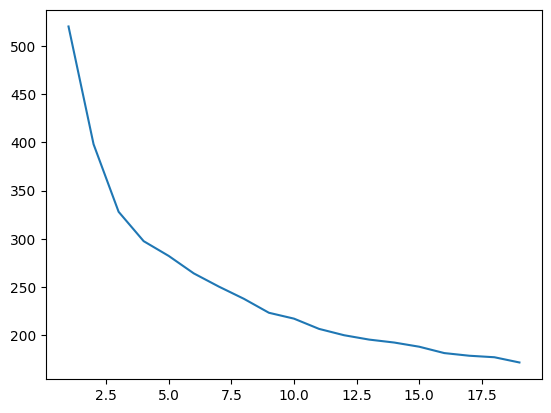

In [ ]:
import matplotlib.pyplot as plt
plt.plot(list(elbow.keys()), list(elbow.values()))
plt.show()

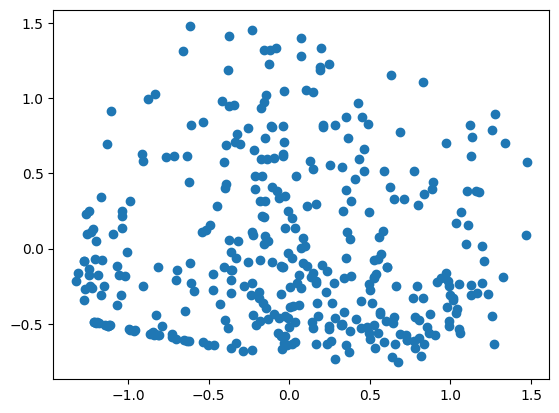

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)
plt.scatter(x=pca_data[:,0], y=pca_data[:,1])
plt.show()

In [ ]:
import seaborn as sns

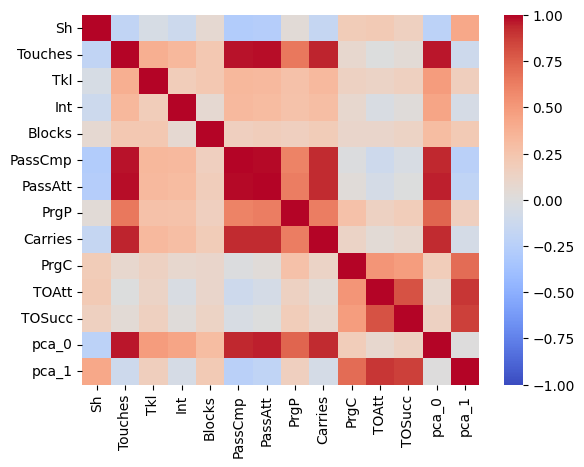

In [ ]:
scaled_df['pca_0'] = pca_data[:,0]
scaled_df['pca_1'] = pca_data[:,1]
sns.heatmap(scaled_df.corr(), cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
k_means = KMeans(n_clusters=4, random_state=93)
k_means.fit(scaled_df.iloc[:, :-2])
scaled_df['cluster'] = k_means.predict(scaled_df.iloc[:, :-2])

In [ ]:
scaled_df[scaled_df['cluster']==0].reset_index().value_counts('player')

player
Rodri              32
Rúben Dias         18
Manuel Akanji      13
Kyle Walker        10
Joško Gvardiol      9
Bernardo Silva      6
Nathan Aké          6
Mateo Kovačić       5
John Stones         2
Phil Foden          2
Kevin De Bruyne     1
Name: count, dtype: int64